# Probability of Depth

In [1]:
from optimized_full_SVMM import SVMM
from pandas import read_csv
from scipy.stats import geom, norm, multinomial, expon, truncnorm
import matplotlib.pyplot as plt 
import numpy as np
from joblib import Parallel, delayed
from sklearn.cluster import KMeans as km
import pandas as pd

In [2]:
file_name = 'cosmic.stix_1kg.depths.txt'
sv = pd.read_csv('../data/'+file_name,sep='\t',header = None)
sv

0          1          2  \
0     1     544809     546083   
1     1    1435191    1437713   
2     1    1866365    1867034   
3     1    1866370    1867052   
4     1    2632451    2689732   
...  ..        ...        ...   
2466  9  140675380  140675924   
2467  9  140772626  140773502   
2468  9  140772659  140773516   
2469  9  140772659  140773516   
2470  9  141019487  141033694   

                                                      3  
0     0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
1     0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
2     0,0,0,2,2,0,3,2,0,1,0,0,1,0,4,1,0,18,0,7,1,3,0...  
3     0,0,0,2,2,0,3,2,0,1,0,0,1,0,4,1,0,18,0,7,1,3,0...  
4     0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,...  
...                                                 ...  
2466  0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,3,0,0,2,...  
2467  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
2468  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
2469  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
2470  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  

[2471 rows x 4 columns]

In [3]:
depths = sv[3].str.split(',', expand=True)
depths = depths.astype('int64')
depths

0     1     2     3     4     5     6     7     8     9     ...  2527  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     2     2     0     3     2     0     1  ...    12   
3        0     0     0     2     2     0     3     2     0     1  ...    12   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2466     0     0     0     0     0     0     0     0     0     0  ...     1   
2467     0     0     0     0     0     0     0     0     0     0  ...     0   
2468     0     0     0     0     0     0     0     0     0     0  ...     0   
2469     0     0     0     0     0     0     0     0     0     0  ...     0   
2470     0     0     0     0     0     0     0     0     0     0  ...     0   

      2528  2529  2530  2531  2532  2533  2534  2535  2536  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        1     8     0    21     2    10     3     3     0  
3        1     8     0    21     2    10     3     3     0  
4        0     0     1     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2466     0     0     0     0     0     0     0     1     0  
2467     0     0     0     0     0     0     0     0     0  
2468     0     0     0     0     0     0     0     0     0  
2469     0     0     0     0     0     0     0     0     0  
2470     0     0     0     0     0     0     0     0     0  

[2471 rows x 2537 columns]

Text(0, 0.5, 'Pr(Column Sum)')

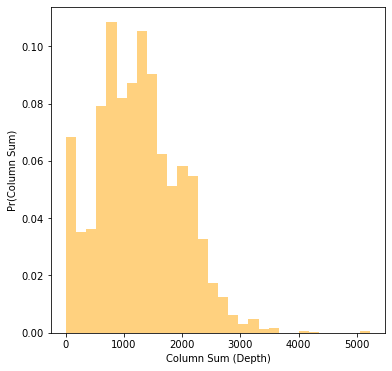

In [4]:
ax = plt.subplots(figsize = (6,6))[1]

depths_sum = depths.sum()
plt.hist(depths_sum, weights = (np.ones_like(depths_sum) / (len(depths_sum))), alpha = .5, bins = 30, color = 'orange', linewidth = 3)
plt.xlabel('Column Sum (Depth)')
plt.ylabel('Pr(Column Sum)')

Text(0, 0.5, 'Pr(Column Mean)')

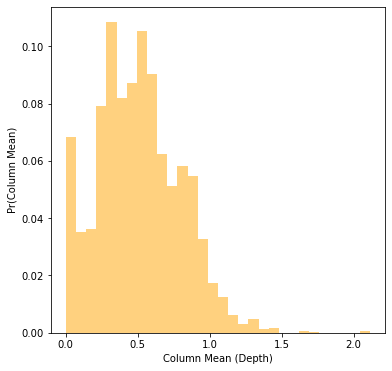

In [5]:
ax = plt.subplots(figsize = (6,6))[1]

depths_mean = depths_sum / len(depths[depths!=0])
plt.hist(depths_mean, weights = (np.ones_like(depths_mean) / len(depths_mean)), alpha = .5, bins = 30, color = 'orange', linewidth = 3)
plt.xlabel('Column Mean (Depth)')
plt.ylabel('Pr(Column Mean)')

In [6]:
depths_nonzero = depths.loc[(depths!=0).any(axis=1)]
depths_nonzero

0     1     2     3     4     5     6     7     8     9     ...  2527  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     2     2     0     3     2     0     1  ...    12   
3        0     0     0     2     2     0     3     2     0     1  ...    12   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2466     0     0     0     0     0     0     0     0     0     0  ...     1   
2467     0     0     0     0     0     0     0     0     0     0  ...     0   
2468     0     0     0     0     0     0     0     0     0     0  ...     0   
2469     0     0     0     0     0     0     0     0     0     0  ...     0   
2470     0     0     0     0     0     0     0     0     0     0  ...     0   

      2528  2529  2530  2531  2532  2533  2534  2535  2536  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        1     8     0    21     2    10     3     3     0  
3        1     8     0    21     2    10     3     3     0  
4        0     0     1     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2466     0     0     0     0     0     0     0     1     0  
2467     0     0     0     0     0     0     0     0     0  
2468     0     0     0     0     0     0     0     0     0  
2469     0     0     0     0     0     0     0     0     0  
2470     0     0     0     0     0     0     0     0     0  

[2471 rows x 2537 columns]

Text(0, 0.5, 'Pr(Column Mean)')

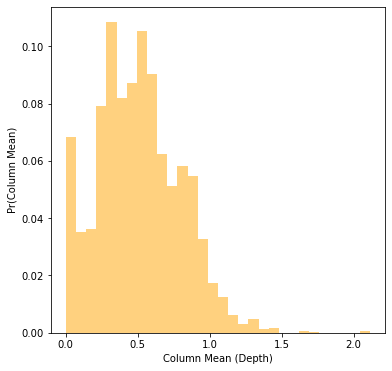

In [7]:
ax = plt.subplots(figsize = (6,6))[1]


depths_mean = depths_sum / len(depths)
plt.hist(depths_mean, weights = (np.ones_like(depths_mean) / len(depths_mean)), alpha = .5, bins = 30, color = 'orange', linewidth = 3)
plt.xlabel('Column Mean (Depth)')
plt.ylabel('Pr(Column Mean)')

In [8]:
depths_sum.loc[lambda x: x > 3]

2         95
3       1239
4        739
5       2812
6       1228
        ... 
2532    2627
2533    2249
2534    2133
2535    2746
2536    2170
Length: 2535, dtype: int64

In [9]:
depths_sample = depths.sample(axis='columns')
depths_sample

68
0      0
1      0
2      2
3      2
4      0
...   ..
2466   0
2467   0
2468   0
2469   0
2470   0

[2471 rows x 1 columns]

In [10]:
depths_samples = []
n_samples = 50
while len(depths_samples) < n_samples:
    depths_sample = depths.sample(axis='columns')
    sample_sum = depths_sample.sum()
    if sum(sample_sum) > 3:
        depths_samples.append(depths_sample)
depths_samples

[      777
 0       0
 1       0
 2      10
 3      10
 4       0
 ...   ...
 2466    0
 2467    0
 2468    0
 2469    0
 2470    0
 
 [2471 rows x 1 columns],
       2337
 0        0
 1        0
 2        0
 3        0
 4        0
 ...    ...
 2466     0
 2467     0
 2468     0
 2469     0
 2470     0
 
 [2471 rows x 1 columns],
       909
 0       0
 1       0
 2      10
 3      10
 4       2
 ...   ...
 2466    0
 2467    0
 2468    0
 2469    0
 2470    0
 
 [2471 rows x 1 columns],
       2121
 0        0
 1        0
 2        1
 3        1
 4        0
 ...    ...
 2466     0
 2467     0
 2468     0
 2469     0
 2470     0
 
 [2471 rows x 1 columns],
       2150
 0        0
 1        0
 2        1
 3        1
 4        0
 ...    ...
 2466     0
 2467     0
 2468     0
 2469     0
 2470     0
 
 [2471 rows x 1 columns],
       1589
 0        0
 1        0
 2        0
 3        0
 4        0
 ...    ...
 2466     0
 2467     0
 2468     0
 2469     0
 2470     0
 
 [2471 rows x 1 co

(0.0, 18.709)

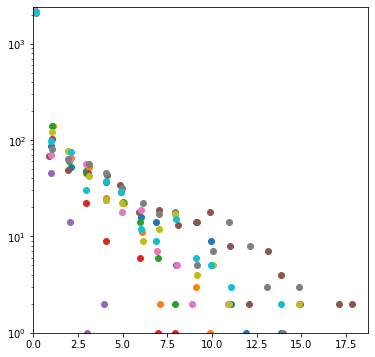

In [11]:
fig, ax = plt.subplots(figsize = (6,6))
for _ in range(10):
    depths_sample = depths.sample(axis='columns')
    hist, bin_edges = np.histogram(depths_sample, bins=50, density=False)
    bin_center = (bin_edges[:-1] + bin_edges[1:])/2
    plt.scatter(bin_center, hist)
ax.set_yscale("log")
ax.set_ylim(bottom=1)
ax.set_xlim(left=0)

(0.0, 32.2235)

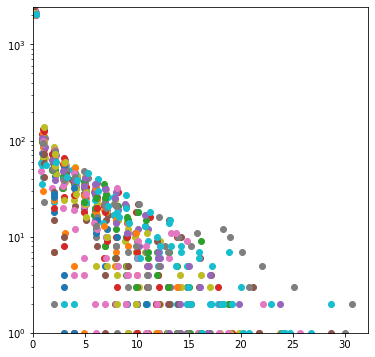

In [12]:
fig, ax = plt.subplots(figsize = (6,6))
for _ in range(50):
    depths_sample = depths.sample(axis='columns')
    hist, bin_edges = np.histogram(depths_sample, bins=50, density=False)
    bin_center = (bin_edges[:-1] + bin_edges[1:])/2
    plt.scatter(bin_center, hist)
ax.set_yscale("log")
ax.set_ylim(bottom=1)
ax.set_xlim(left=0)

In [13]:
depths_sample = depths.sample(axis='columns')
means = []
for df_col in depths:
    mean = depths[df_col].sum() / len(depths[df_col].loc[lambda x: x > 0])
    if mean > 0:
        means.append(mean)

/var/folders/3v/8c4h0_nj36l6vkszy1szz5280000gn/T/ipykernel_81303/3230931204.py:4: RuntimeWarning: invalid value encountered in long_scalars
  mean = depths[df_col].sum() / len(depths[df_col].loc[lambda x: x > 0])
/var/folders/3v/8c4h0_nj36l6vkszy1szz5280000gn/T/ipykernel_81303/3230931204.py:4: RuntimeWarning: invalid value encountered in long_scalars
  mean = depths[df_col].sum() / len(depths[df_col].loc[lambda x: x > 0])


Text(0, 0.5, 'Pr(Column Non-zero Mean)')

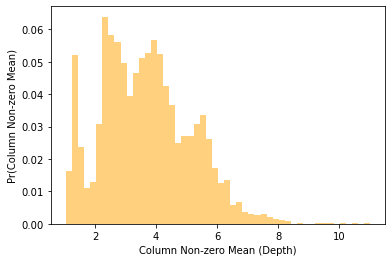

In [14]:
plt.hist(means, weights = (np.ones_like(means) / (len(means))), alpha = .5, bins = 50, color = 'orange', linewidth = 3)
plt.xlabel('Column Non-zero Mean (Depth)')
plt.ylabel('Pr(Column Non-zero Mean)')

In [15]:
depths_nonzero = depths.loc[:, (depths != 0).any(axis=0)]
depths_nonzero.columns = range(depths_nonzero.shape[1])

n = depths_nonzero.shape[0]
b = 1/20
lambdas = [1/p for p in means]
print(means)
pmfs = depths_nonzero.apply(lambda col: geom.pmf(col, lambdas[col.name]))
depths_no_outlier = np.where(pmfs > b/n, np.floor(depths_nonzero.div(means, axis='columns')), depths_nonzero)
depths_no_outlier = depths_no_outlier.astype(int)
depths_no_outlier = pd.DataFrame(depths_no_outlier)

diff_count = np.count_nonzero(depths_nonzero - depths_no_outlier)

[1.3380281690140845, 3.5706051873198845, 2.7169117647058822, 6.319101123595505, 3.7784615384615385, 3.185185185185185, 1.2027027027027026, 3.219219219219219, 3.4423076923076925, 4.076687116564417, 4.157754010695188, 4.637440758293839, 5.362244897959184, 4.529239766081871, 2.7900552486187844, 6.606796116504855, 2.491228070175439, 4.646464646464646, 3.483974358974359, 3.024024024024024, 5.39618138424821, 4.317647058823529, 3.5078864353312302, 4.08816120906801, 3.5147783251231526, 4.642659279778393, 6.085106382978723, 3.328402366863905, 4.002551020408164, 1.5157894736842106, 3.0, 3.0552147239263805, 2.4963503649635035, 4.954285714285715, 4.0307262569832405, 5.883720930232558, 3.483383685800604, 3.5341614906832297, 2.882183908045977, 6.178743961352657, 6.642317380352645, 5.916099773242631, 2.817589576547231, 4.107416879795396, 3.603305785123967, 4.083333333333333, 4.677261613691932, 3.404466501240695, 2.5533333333333332, 2.8959537572254335, 4.744791666666667, 4.210682492581602, 4.127659574

In [16]:
diff_bool = (depths_nonzero != depths_no_outlier)
diff_rows = depths_nonzero[diff_bool.any(axis=1)]
diff_rows
# 294, 435, 566, 770, 2366, 2367

0     1     2     3     4     5     6     7     8     9     ...  2525  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     2     2     0     3     2     0     1     0     0  ...    12   
3        0     2     2     0     3     2     0     1     0     0  ...    12   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2466     0     0     0     0     0     0     0     0     0     0  ...     1   
2467     0     0     0     0     0     0     0     0     0     0  ...     0   
2468     0     0     0     0     0     0     0     0     0     0  ...     0   
2469     0     0     0     0     0     0     0     0     0     0  ...     0   
2470     0     0     0     0     0     0     0     0     0     0  ...     0   

      2526  2527  2528  2529  2530  2531  2532  2533  2534  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        1     8     0    21     2    10     3     3     0  
3        1     8     0    21     2    10     3     3     0  
4        0     0     1     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2466     0     0     0     0     0     0     0     1     0  
2467     0     0     0     0     0     0     0     0     0  
2468     0     0     0     0     0     0     0     0     0  
2469     0     0     0     0     0     0     0     0     0  
2470     0     0     0     0     0     0     0     0     0  

[2471 rows x 2535 columns]

unchanged


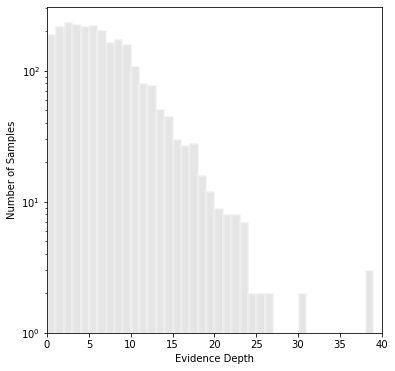

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]

scaled down


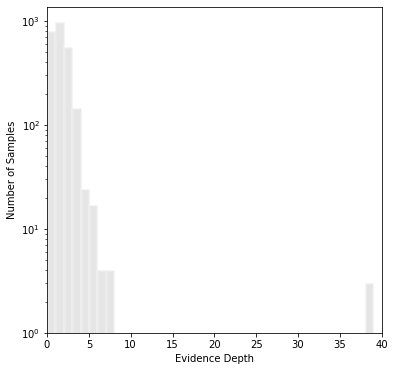

42      39
47      39
124     39
1107    20
Name: 294, dtype: int64
pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]


In [17]:
print('unchanged')
sample_nonzero = depths_nonzero.iloc[294]
pi, alpha, lambda_, mu, sigma = SVMM(sample_nonzero, True, False)
print('pi:', pi)
print('alpha:', alpha)
print('lambda:', lambda_)
print('mu:', mu)
print('sigma:', sigma)

print('')
print('scaled down')
sample_no_outlier = depths_no_outlier.iloc[294]
pi, alpha, lambda_, mu, sigma = SVMM(sample_no_outlier, True, False)
print(sample_no_outlier[sample_no_outlier > 10])
print('pi:', pi)
print('alpha:', alpha)
print('lambda:', lambda_)
print('mu:', mu)
print('sigma:', sigma)

unchanged


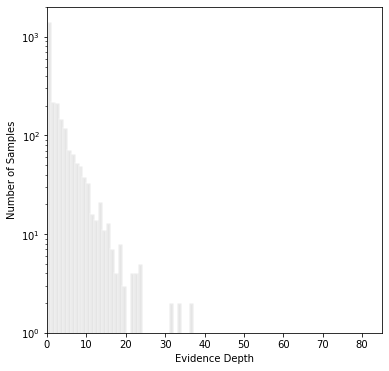

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]

scaled down


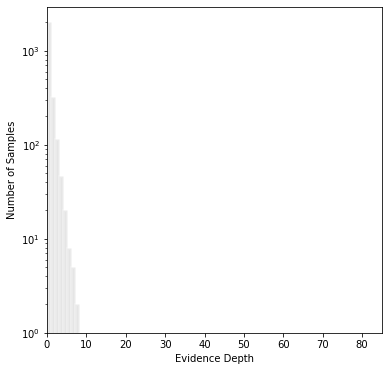

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]


In [18]:
print('unchanged')
sample_nonzero = depths_nonzero.iloc[435]
pi, alpha, lambda_, mu, sigma = SVMM(sample_nonzero, True, False)
print('pi:', pi)
print('alpha:', alpha)
print('lambda:', lambda_)
print('mu:', mu)
print('sigma:', sigma)

print('')
print('scaled down')
sample_no_outlier = depths_no_outlier.iloc[435]
pi, alpha, lambda_, mu, sigma = SVMM(sample_no_outlier, True, False)
print('pi:', pi)
print('alpha:', alpha)
print('lambda:', lambda_)
print('mu:', mu)
print('sigma:', sigma)

unchanged


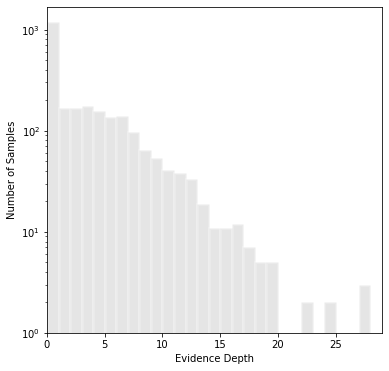

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]

scaled down


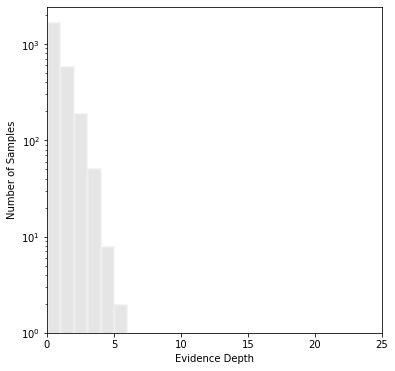

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]


In [19]:
print('unchanged')
sample_nonzero = depths_nonzero.iloc[566]
pi, alpha, lambda_, mu, sigma = SVMM(sample_nonzero, True, False)
print('pi:', pi)
print('alpha:', alpha)
print('lambda:', lambda_)
print('mu:', mu)
print('sigma:', sigma)

print('')
print('scaled down')
sample_no_outlier = depths_no_outlier.iloc[566]
pi, alpha, lambda_, mu, sigma = SVMM(sample_no_outlier, True, False)
print('pi:', pi)
print('alpha:', alpha)
print('lambda:', lambda_)
print('mu:', mu)
print('sigma:', sigma)

unchanged


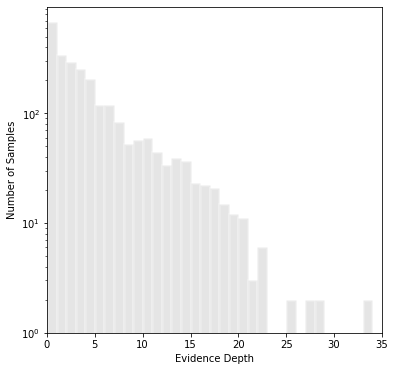

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]

scaled down


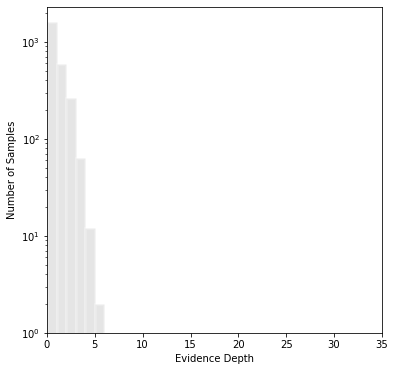

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]


In [20]:
print('unchanged')
sample_nonzero = depths_nonzero.iloc[770]
pi, alpha, lambda_, mu, sigma = SVMM(sample_nonzero, True, False)
print('pi:', pi)
print('alpha:', alpha)
print('lambda:', lambda_)
print('mu:', mu)
print('sigma:', sigma)

print('')
print('scaled down')
sample_no_outlier = depths_no_outlier.iloc[770]
pi, alpha, lambda_, mu, sigma = SVMM(sample_no_outlier, True, False)
print('pi:', pi)
print('alpha:', alpha)
print('lambda:', lambda_)
print('mu:', mu)
print('sigma:', sigma)

index 0


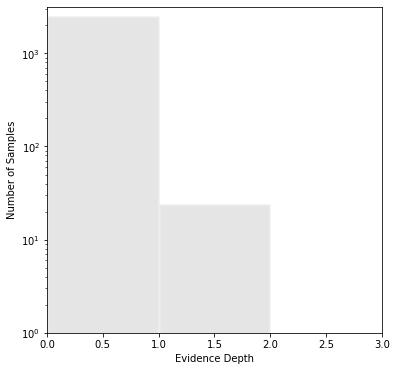

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 1


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


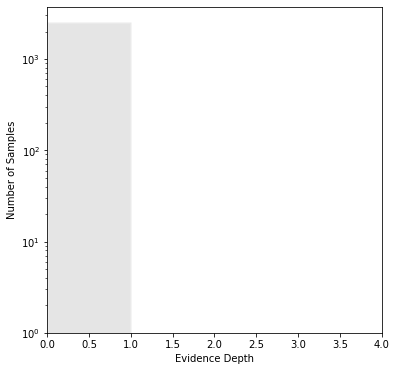

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 2


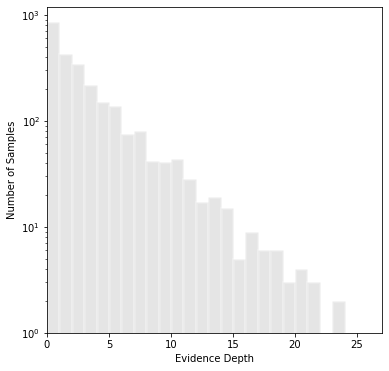

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 3


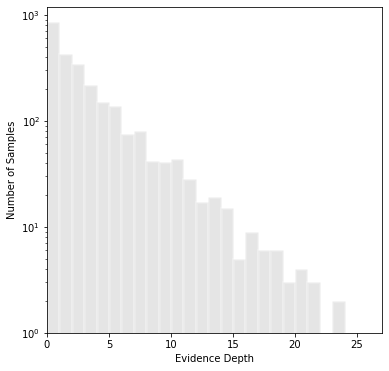

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 4


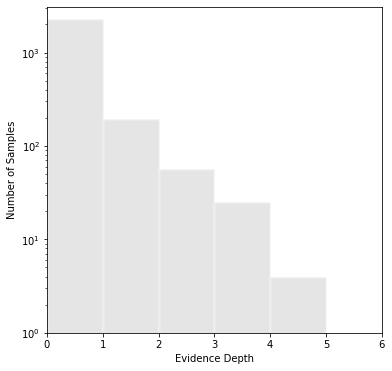

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 5


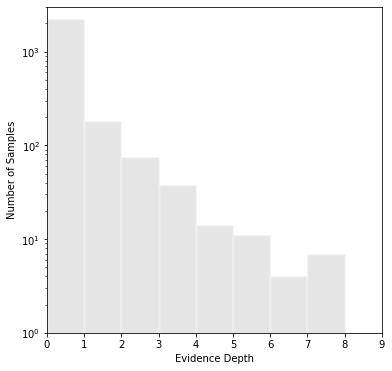

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 6


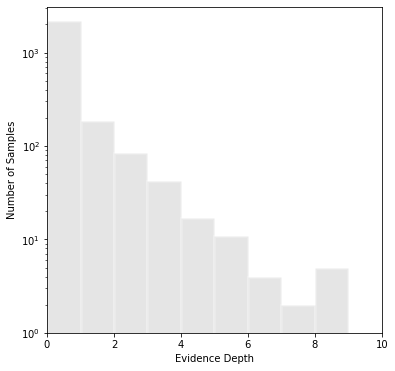

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 7


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


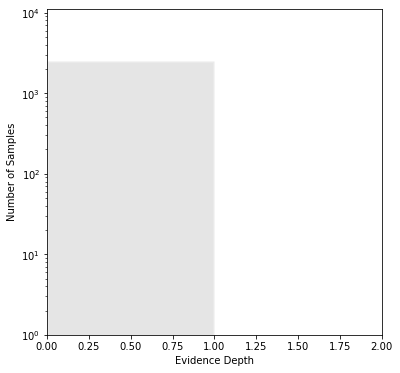

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 8


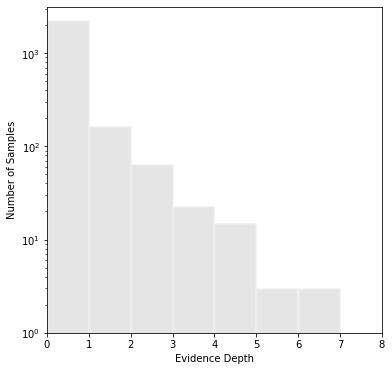

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 9


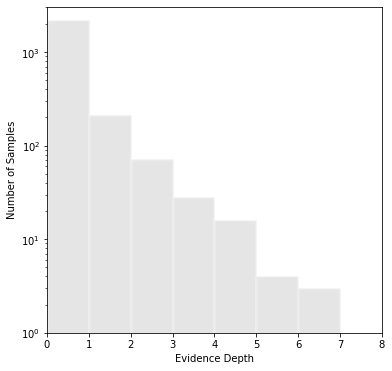

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 10


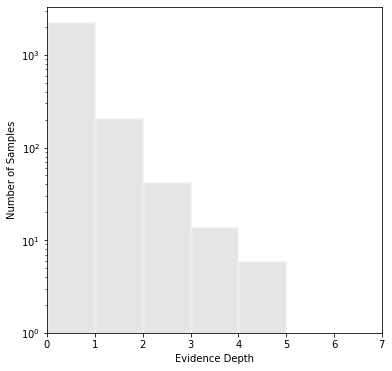

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 11


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


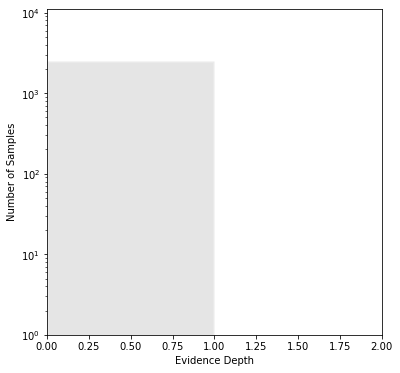

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 12


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


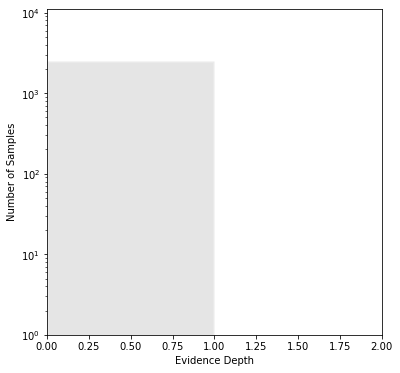

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 13


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


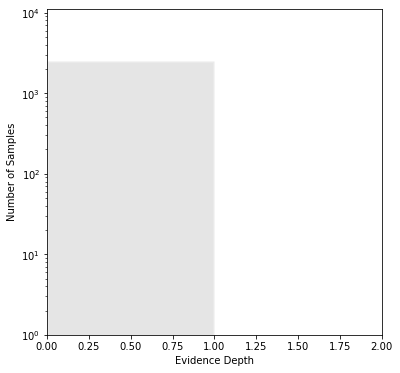

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 14


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


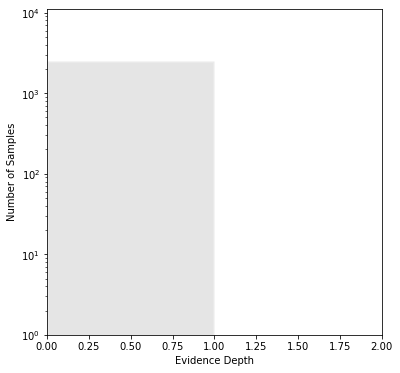

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 15


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


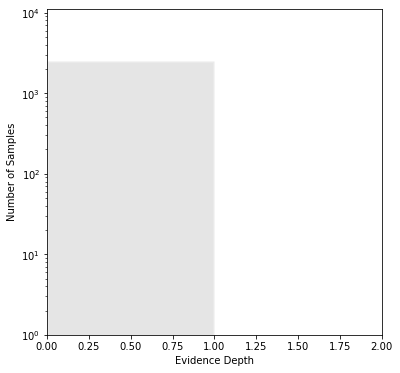

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 16


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


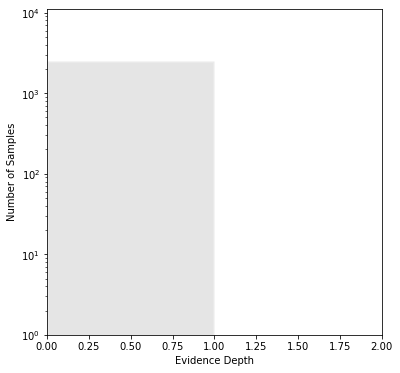

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 17


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


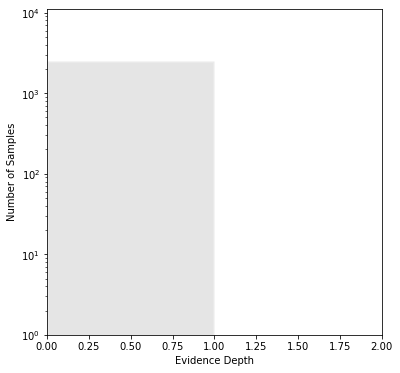

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 18


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


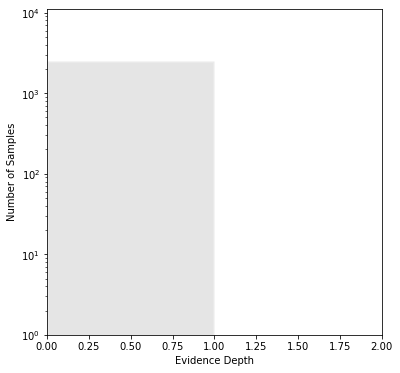

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 19


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


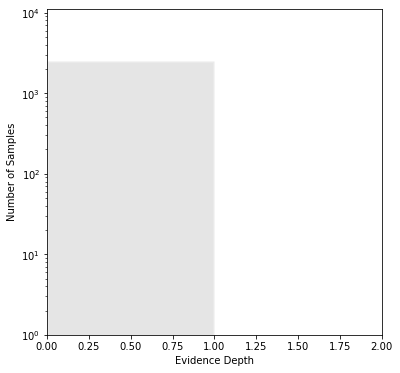

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 20


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


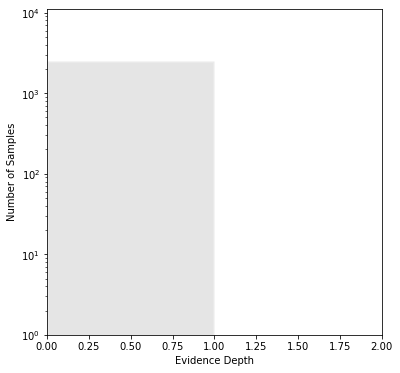

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 21


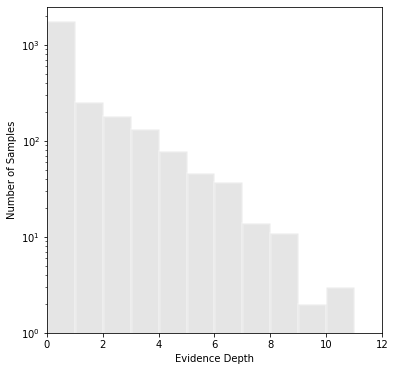

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 22


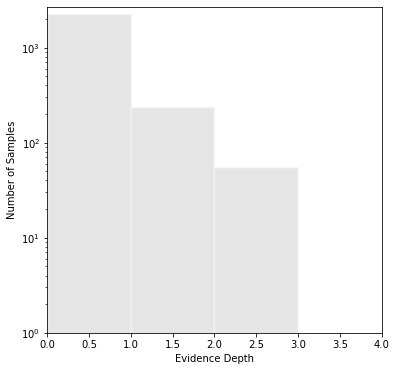

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 23


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


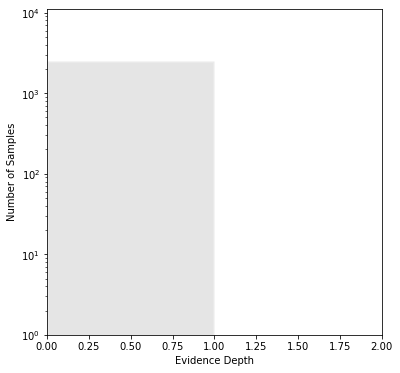

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 24


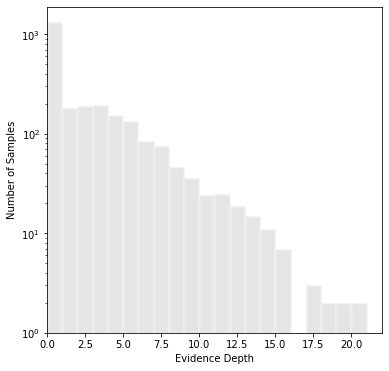

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 25


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


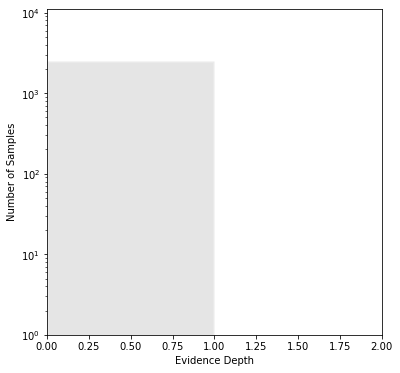

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 26


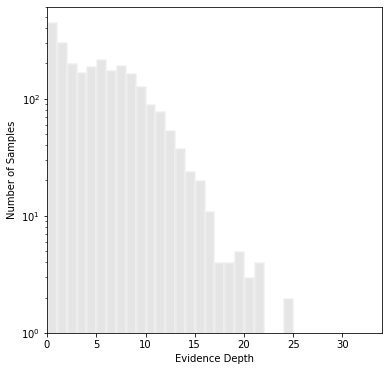

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 27


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


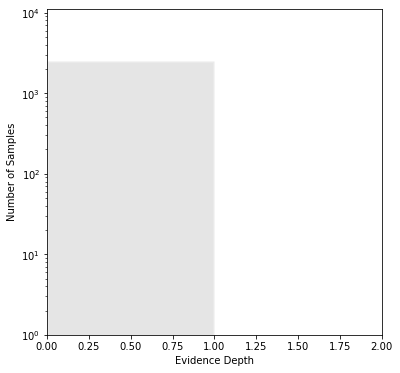

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 28


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


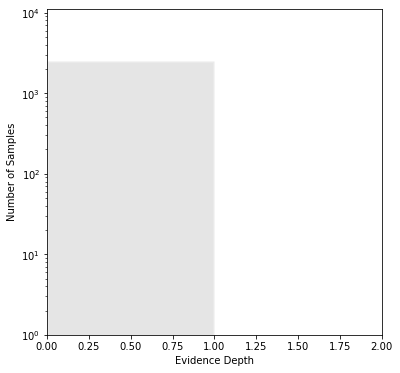

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 29


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


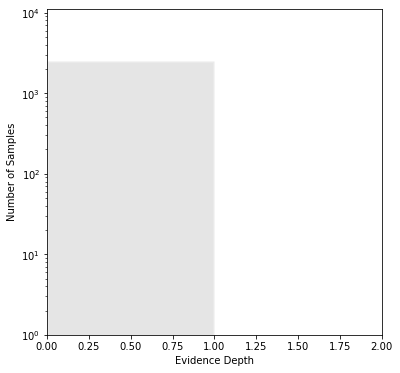

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 30


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


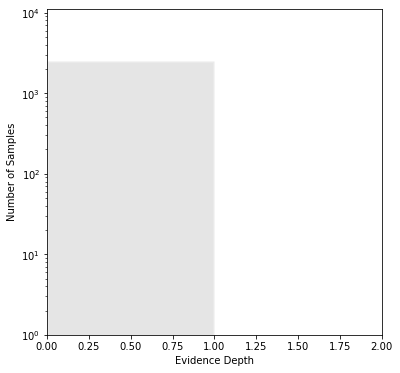

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 31


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


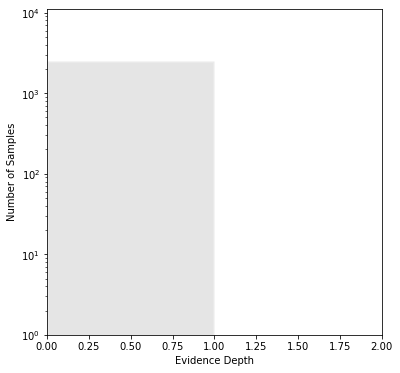

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 32


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


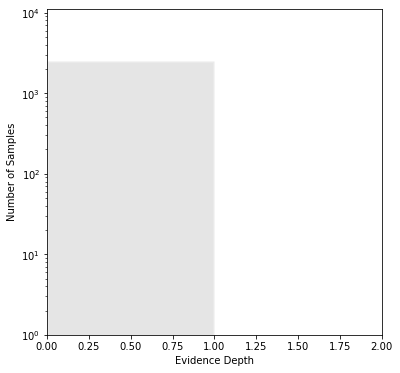

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 33


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


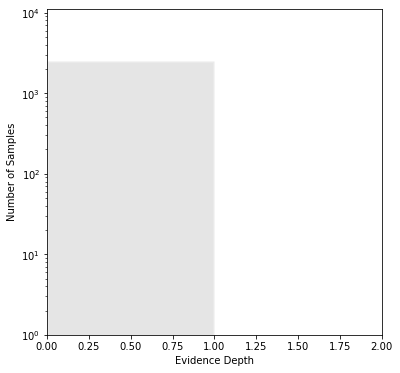

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 34


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


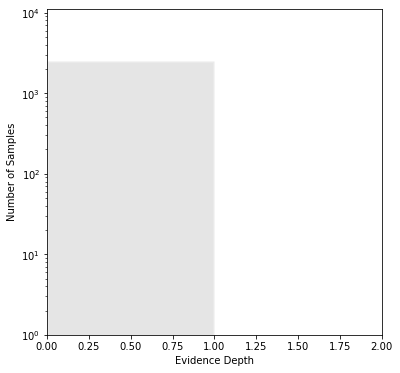

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 35


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


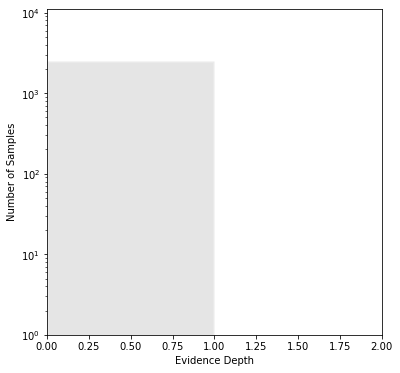

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 36


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


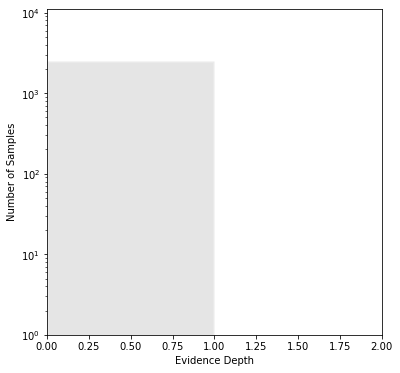

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 37


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


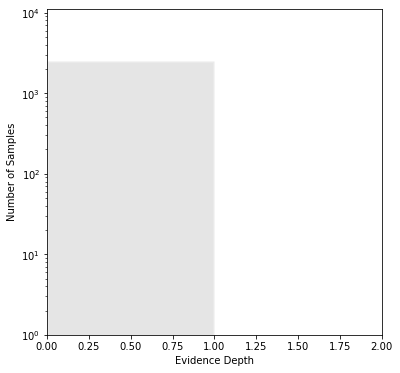

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 38


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


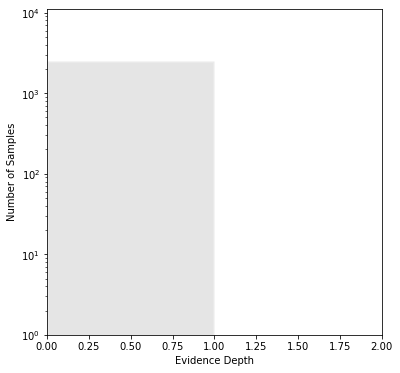

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 39


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


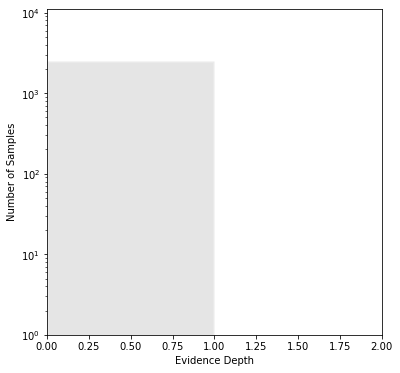

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 40


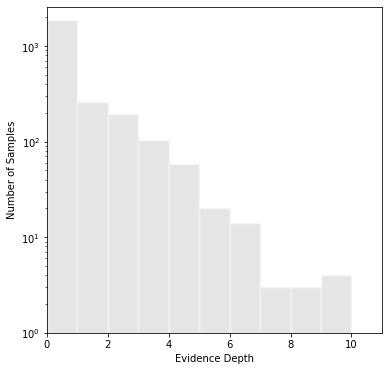

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 41


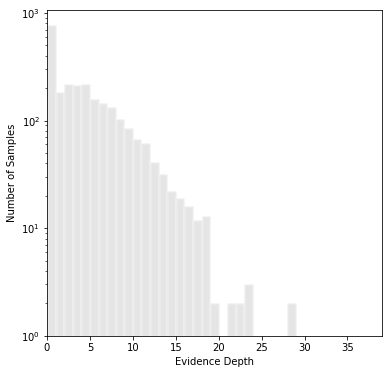

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 42


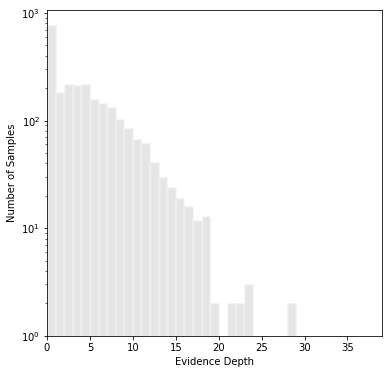

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 43


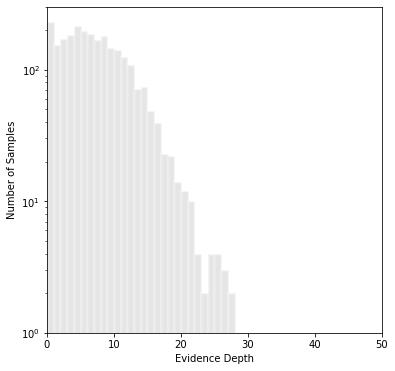

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 44


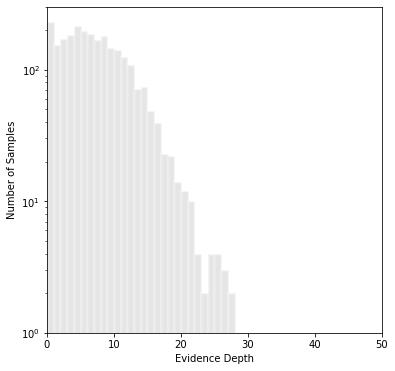

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 45


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


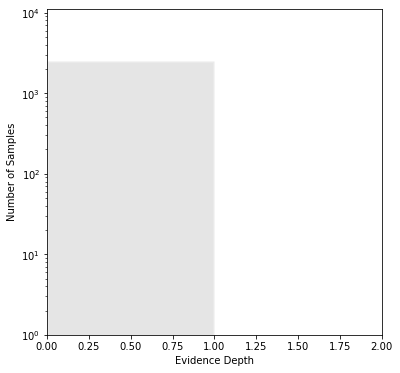

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 46


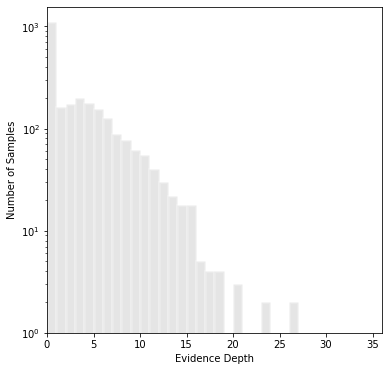

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 47


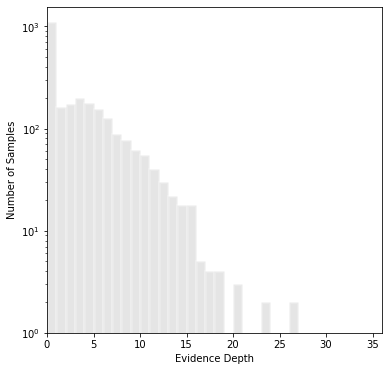

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 48


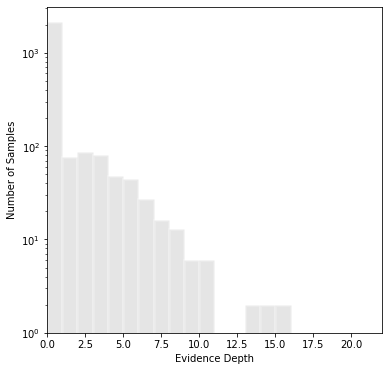

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 49


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


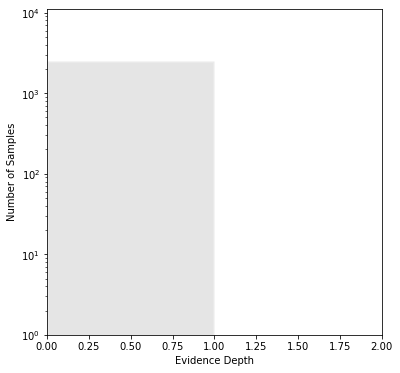

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 50


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


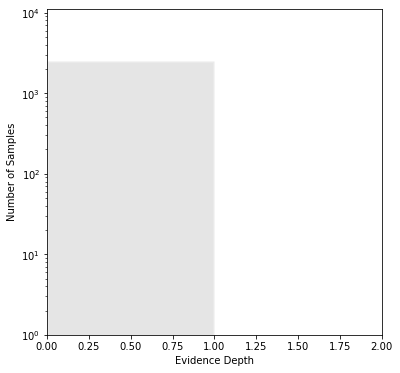

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 51


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


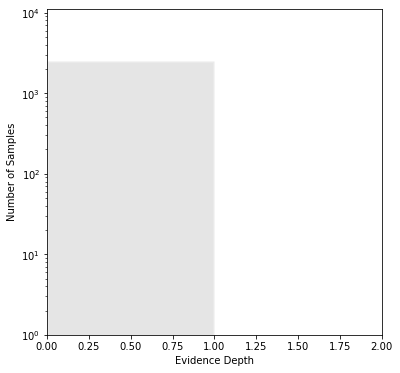

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 52


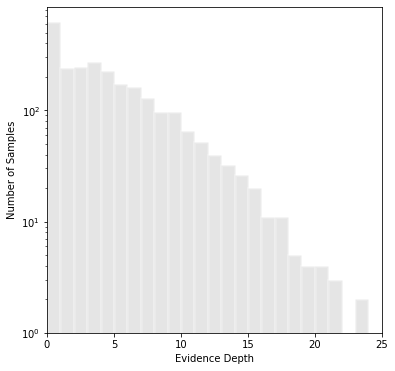

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 53


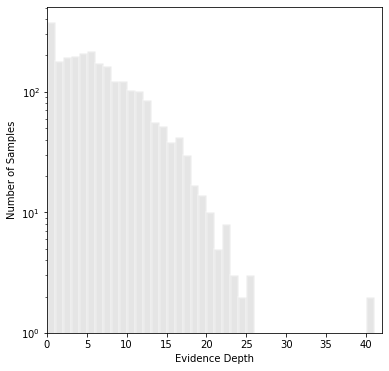

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 54


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


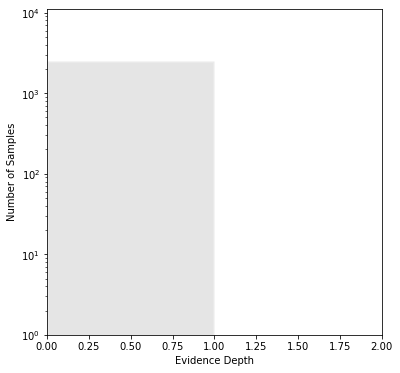

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 55


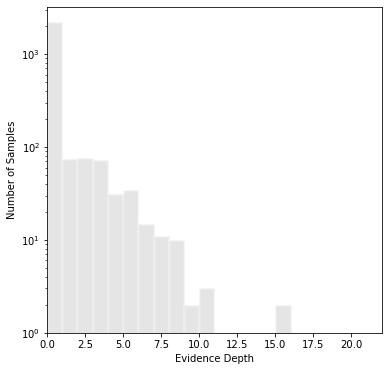

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 56


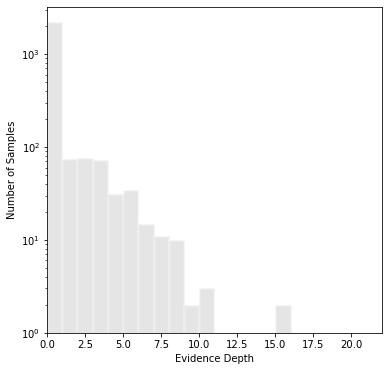

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 57


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


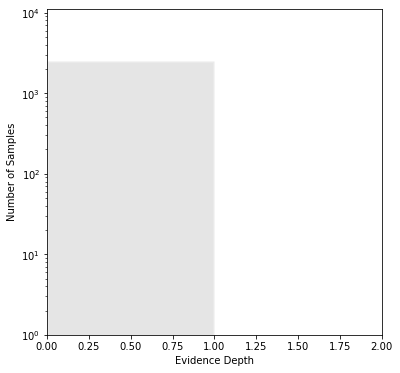

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 58


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


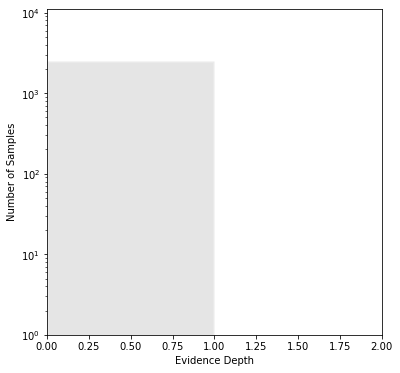

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 59


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


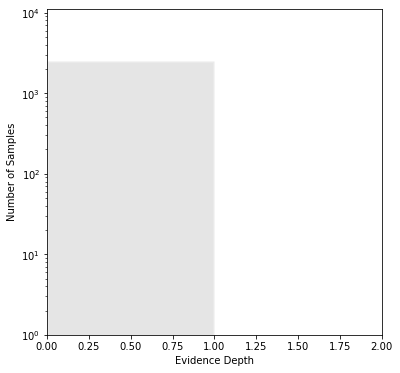

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 60


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


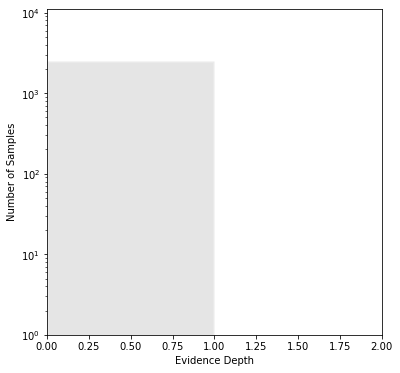

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 61


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


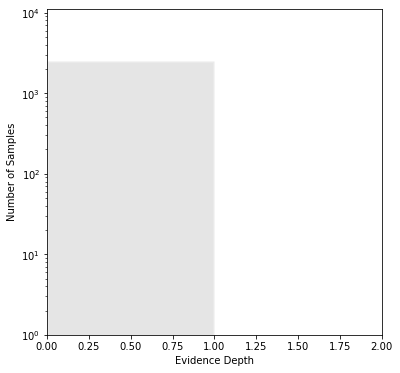

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 62


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


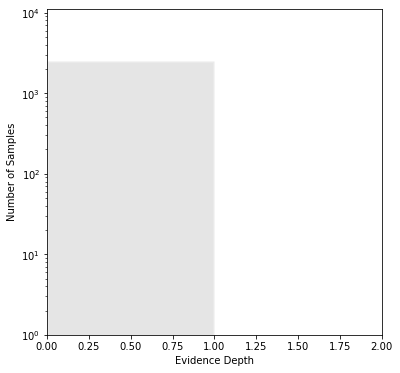

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 63


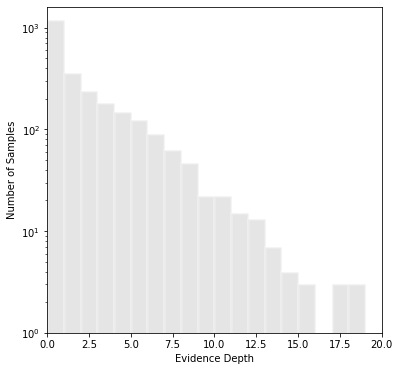

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 64


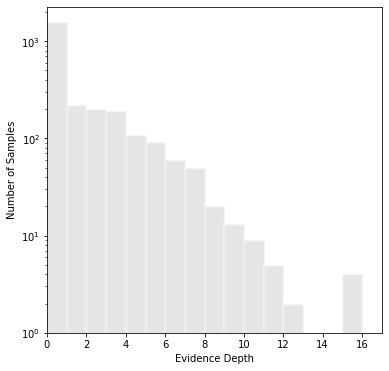

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 65


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


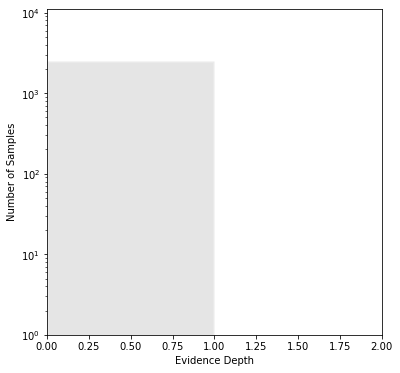

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 66


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


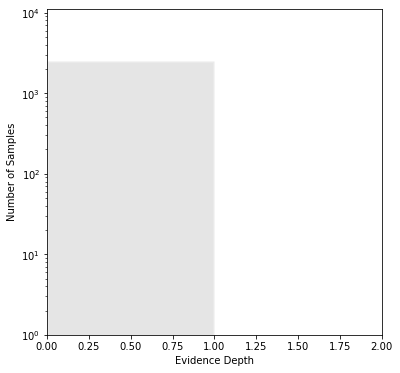

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 67


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


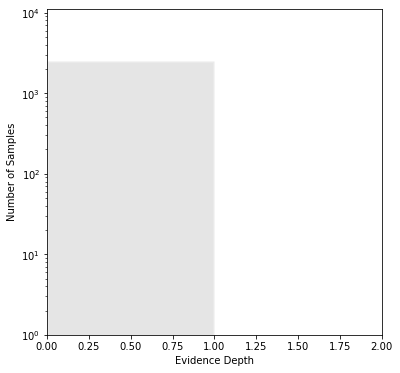

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 68


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


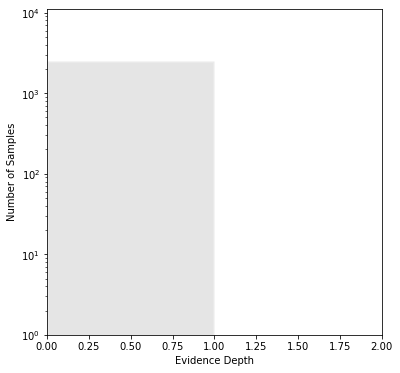

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 69


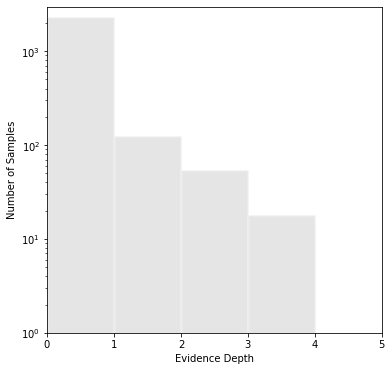

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 70


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


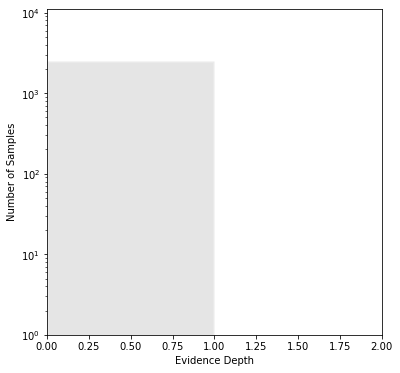

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 71


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


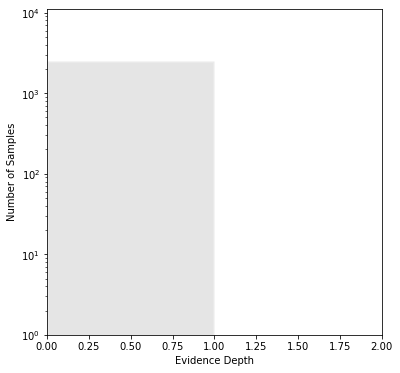

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 72


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


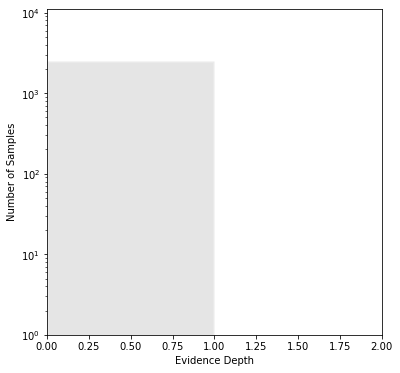

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 73


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


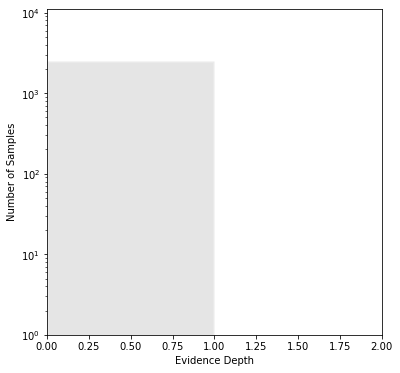

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 74


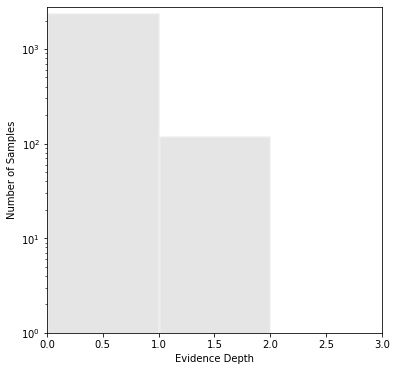

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 75


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


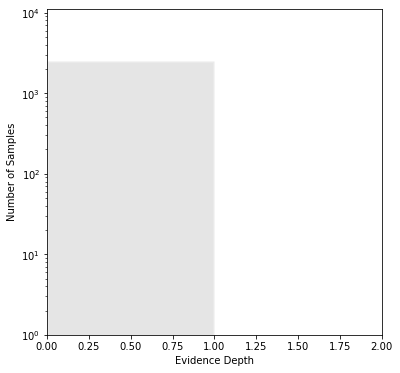

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 76


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


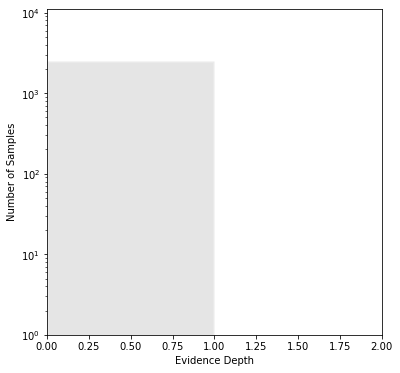

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 77


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


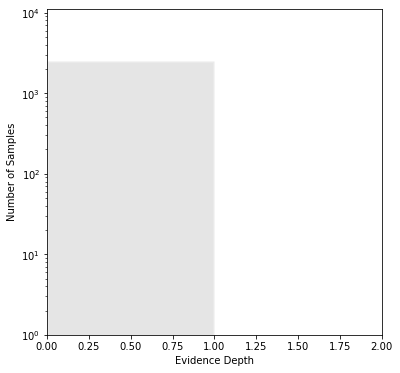

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 78


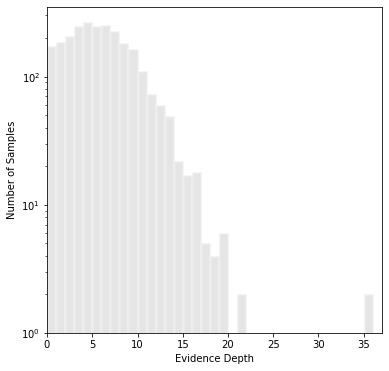

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 79


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


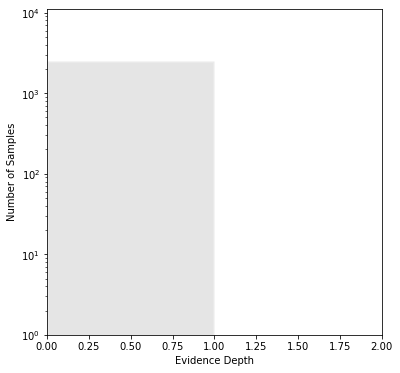

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 80


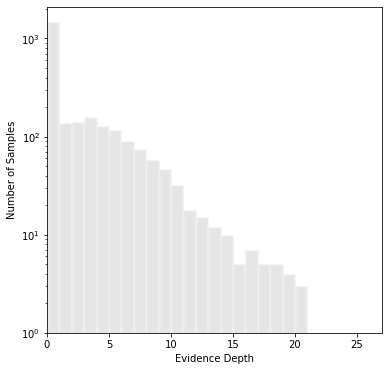

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 81


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


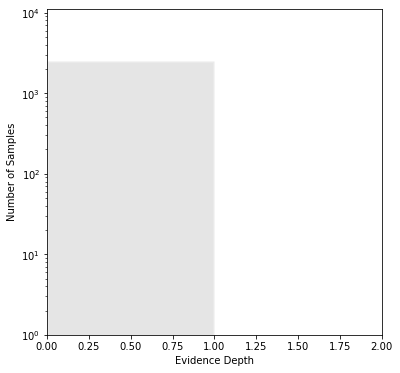

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 82


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


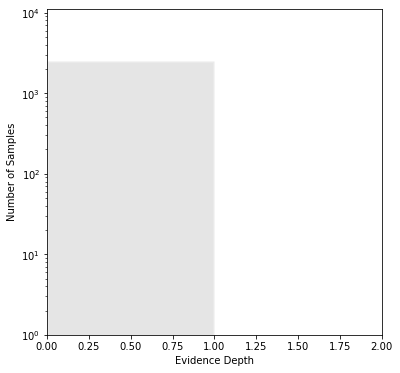

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 83


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


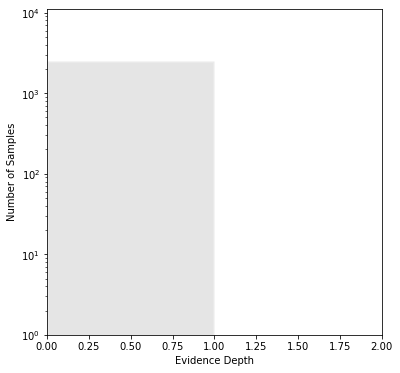

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 84


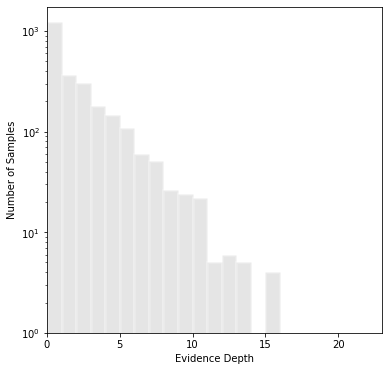

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 85


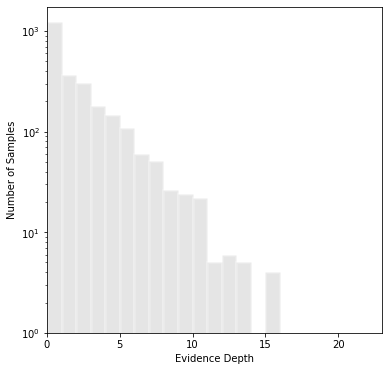

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 86


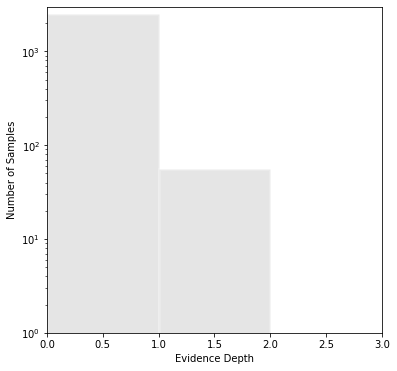

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 87


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


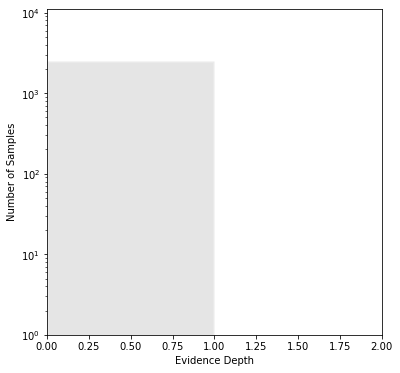

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 88


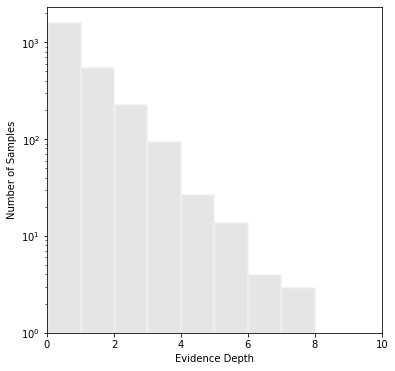

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 89


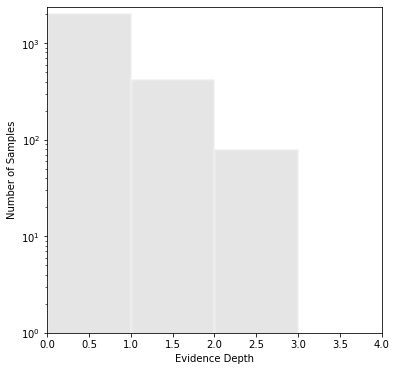

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 90


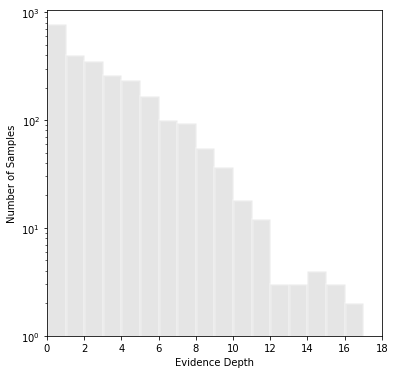

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 91


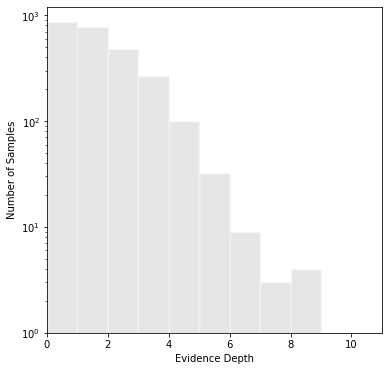

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 92


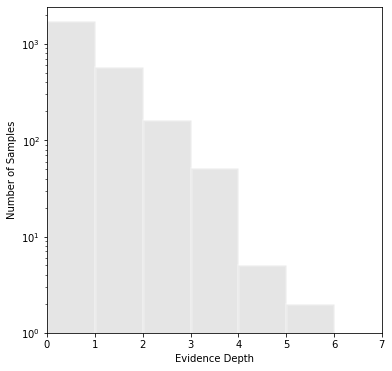

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 93


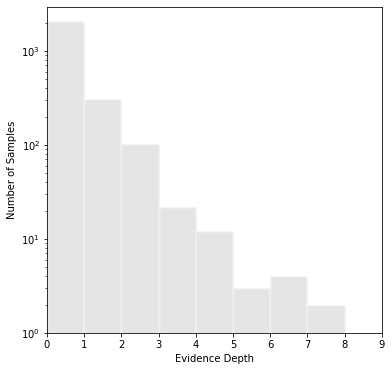

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 94


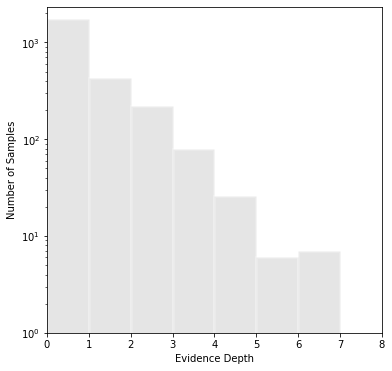

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 95


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


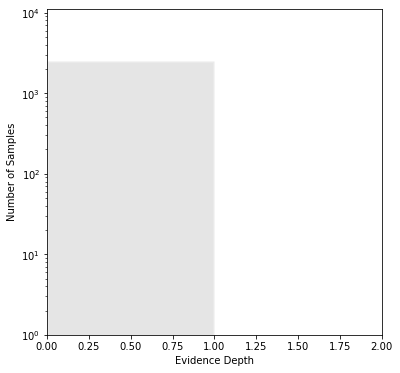

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 96


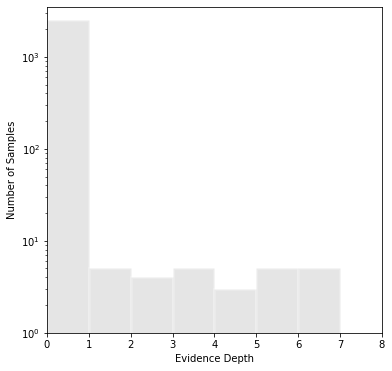

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 97


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


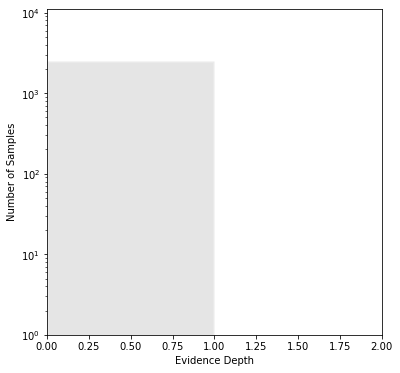

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 98


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


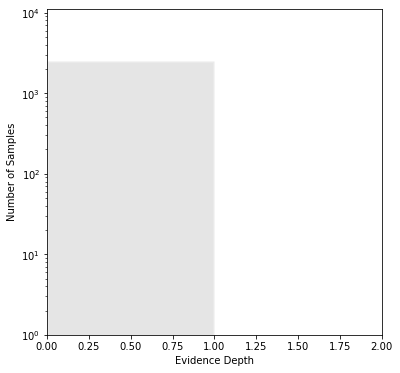

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 99


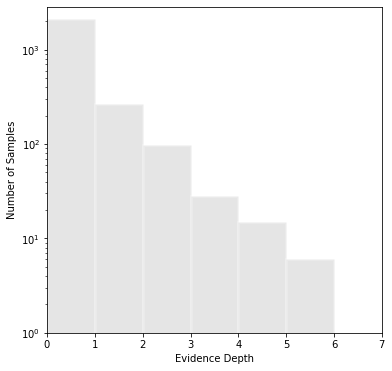

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 100


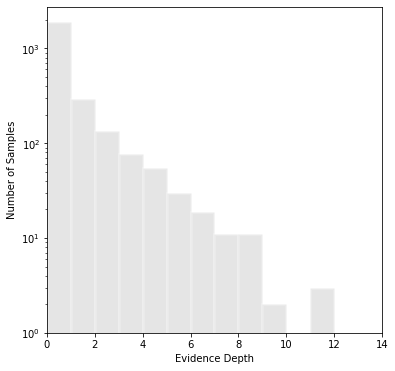

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 101


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


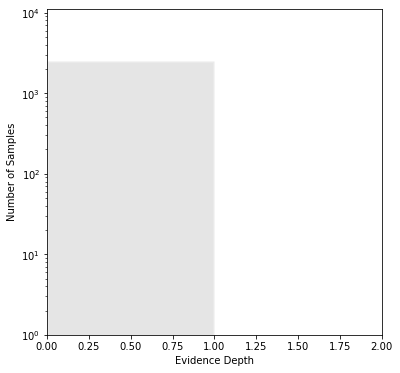

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 102


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


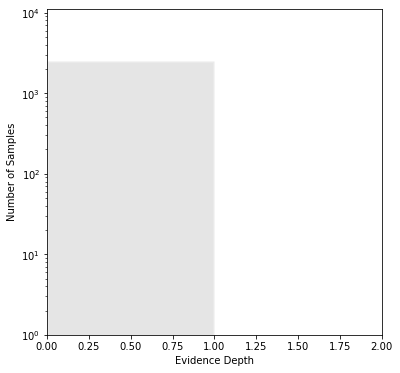

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 103


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


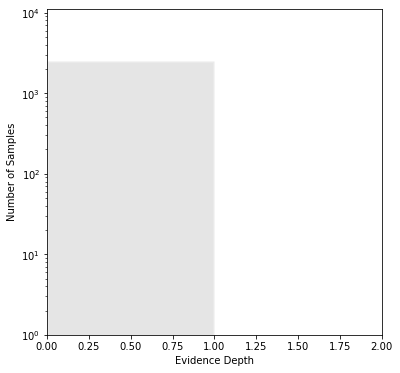

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 104


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


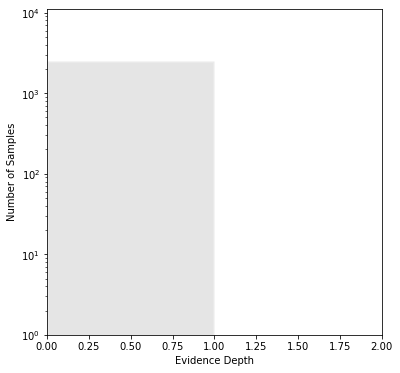

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 105


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


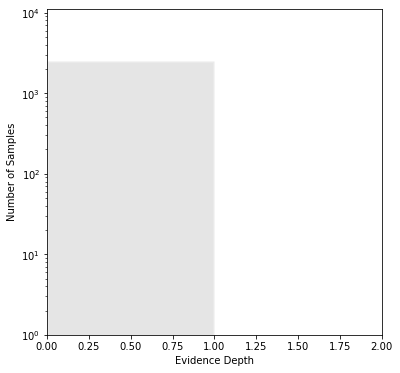

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 106


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


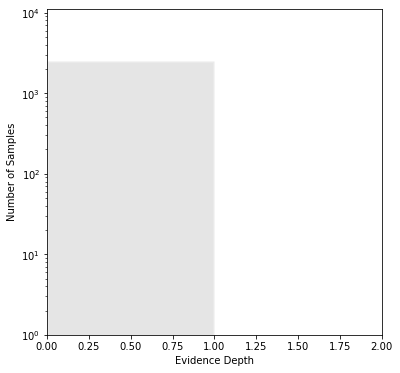

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 107


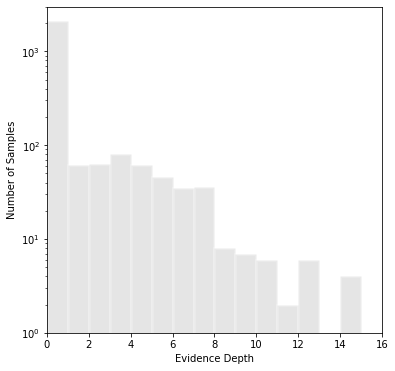

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 108


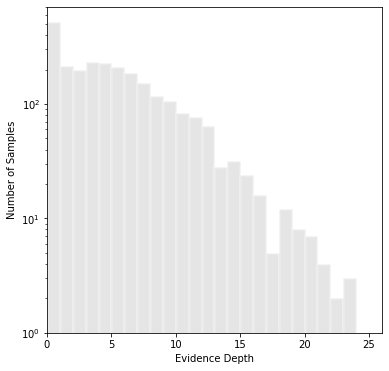

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 109


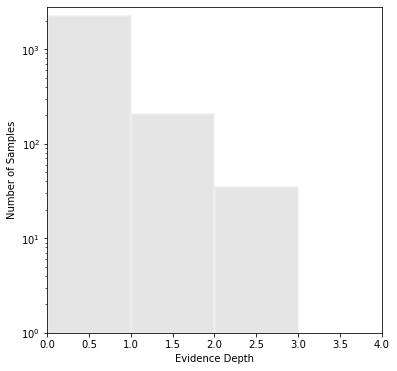

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 110


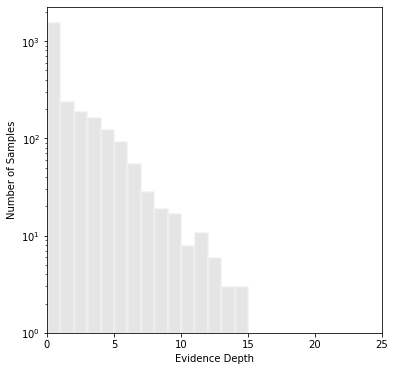

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 111


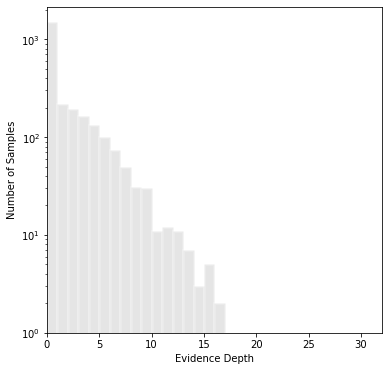

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 112


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


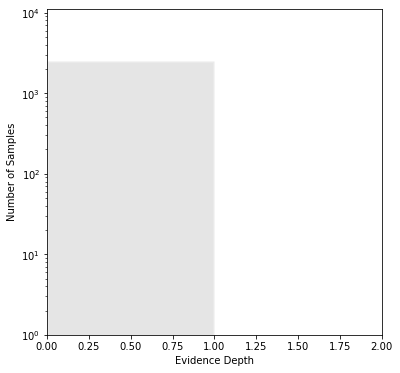

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 113


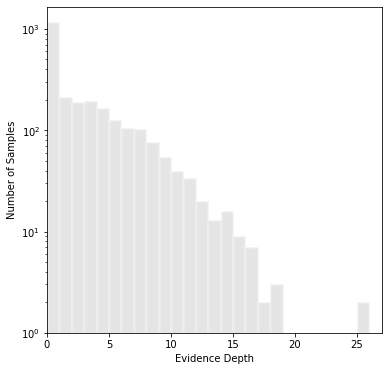

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 114


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


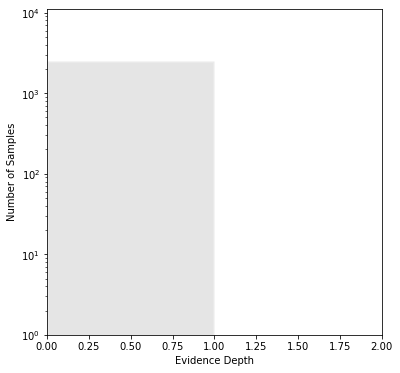

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 115


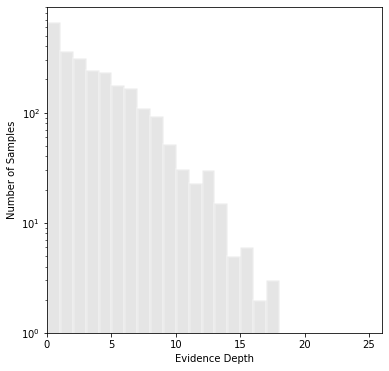

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 116


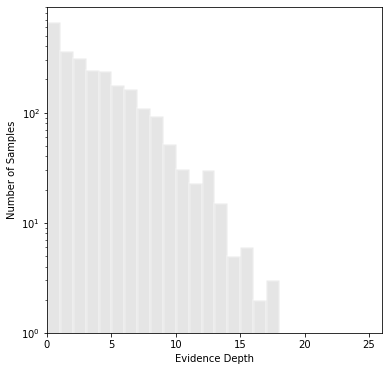

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 117


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


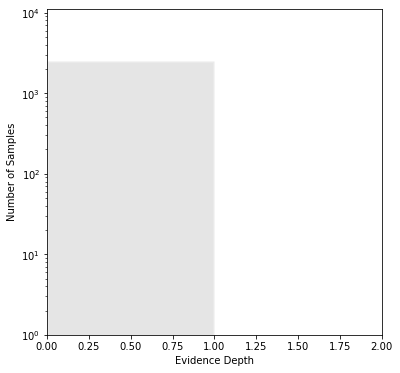

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 118


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


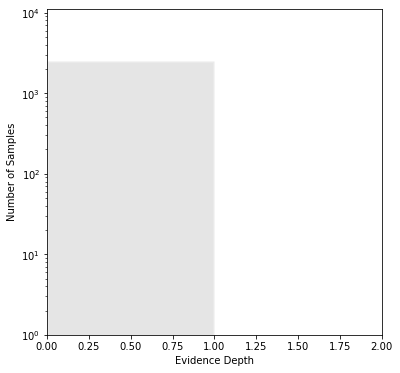

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 119


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


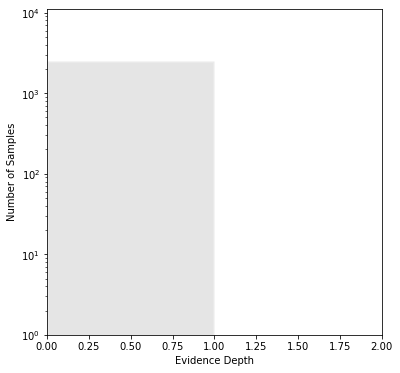

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 120


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


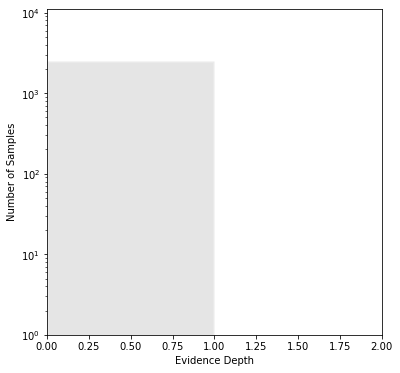

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 121


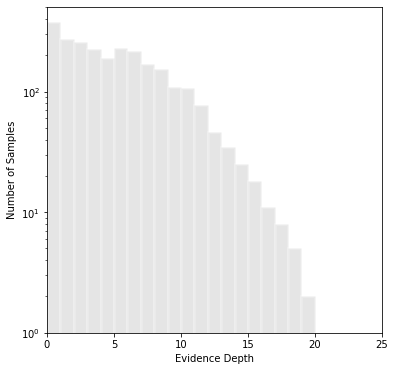

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 122


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


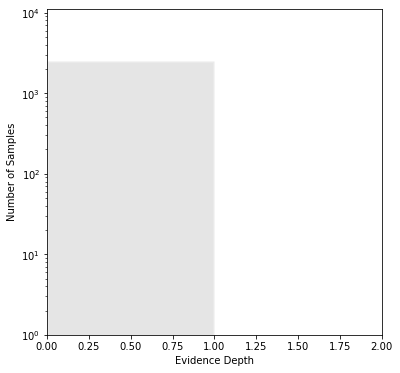

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 123


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


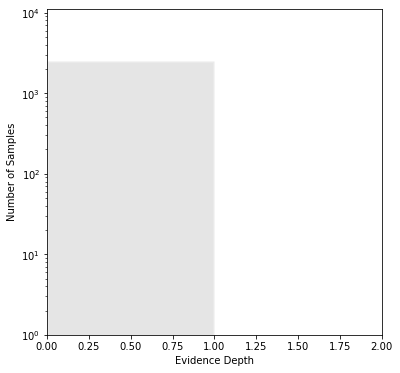

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 124


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


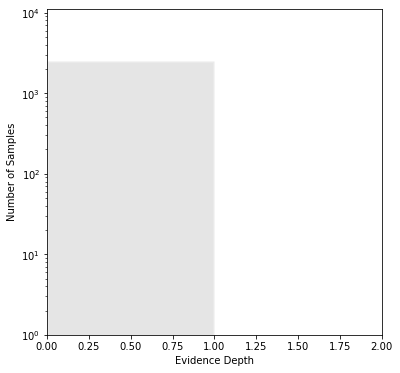

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 125


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


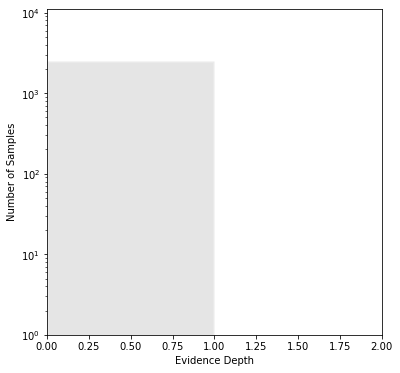

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 126


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


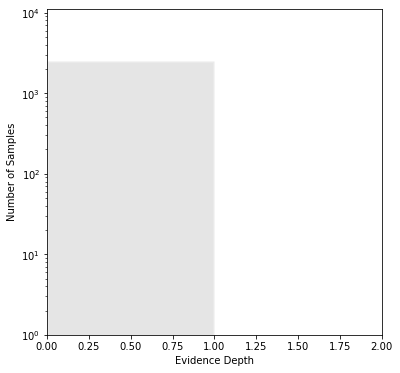

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 127


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


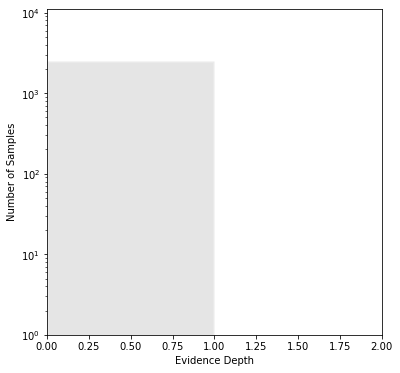

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 128


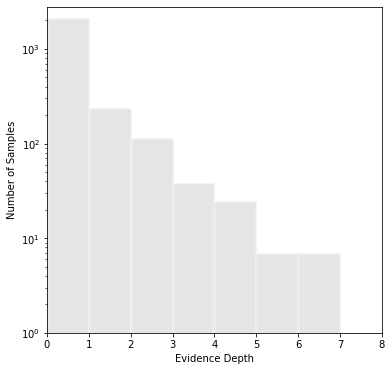

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 129


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


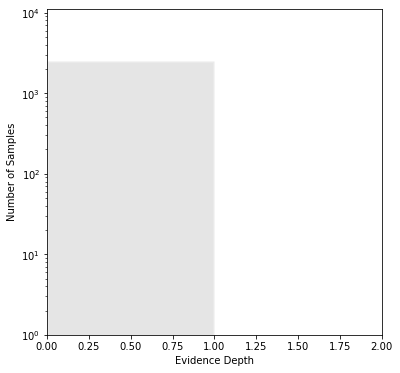

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 130


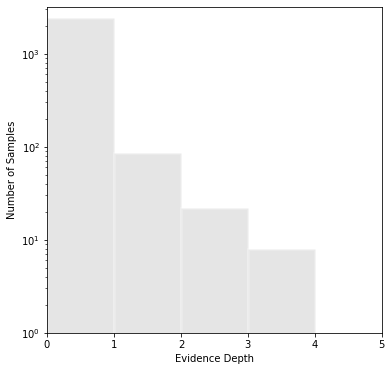

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 131


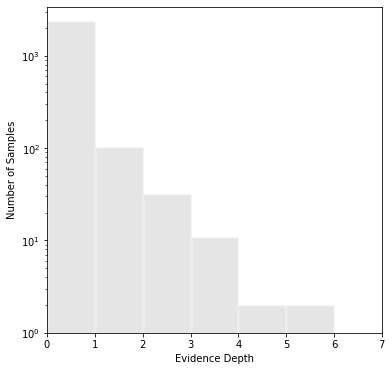

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 132


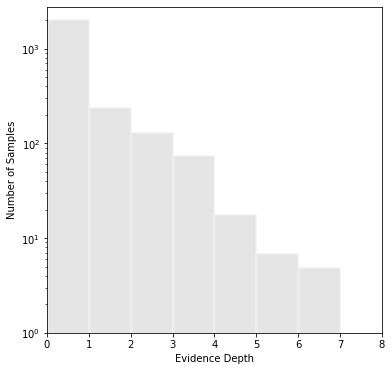

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 133


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


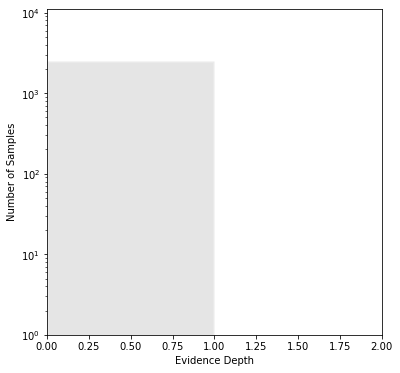

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 134


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


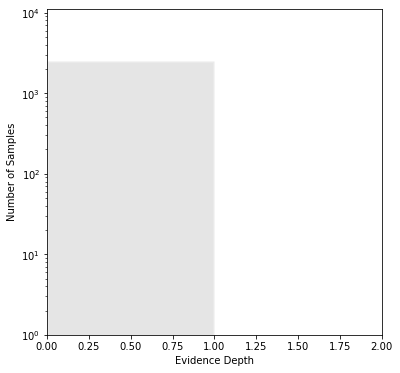

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 135


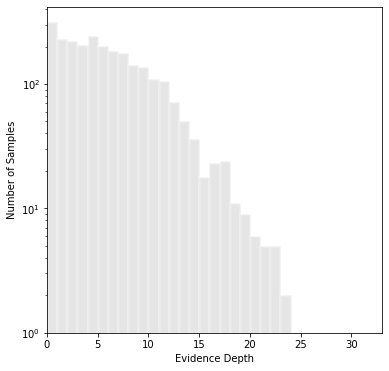

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 136


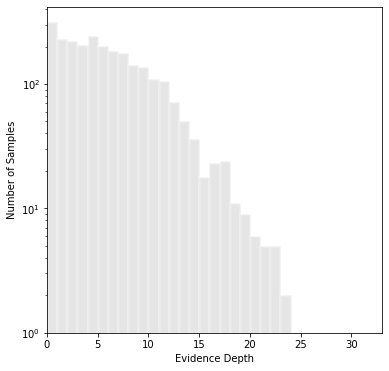

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 137


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


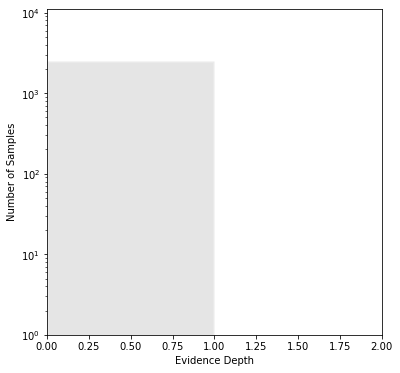

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 138


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


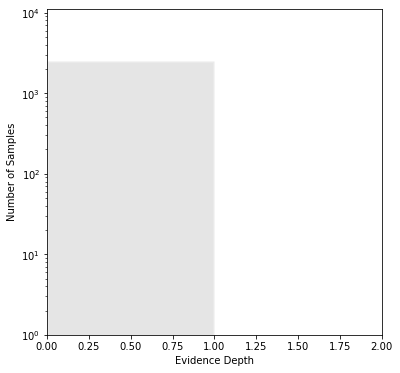

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 139


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


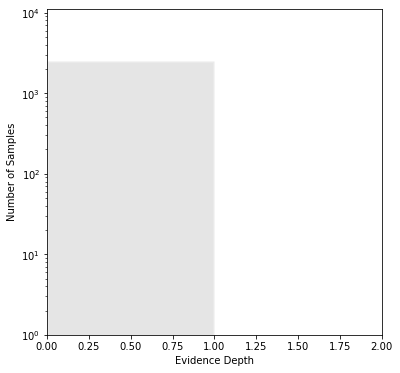

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 140


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


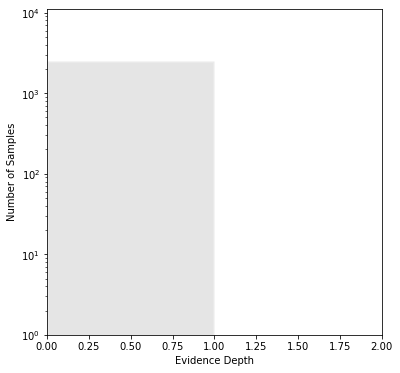

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 141


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


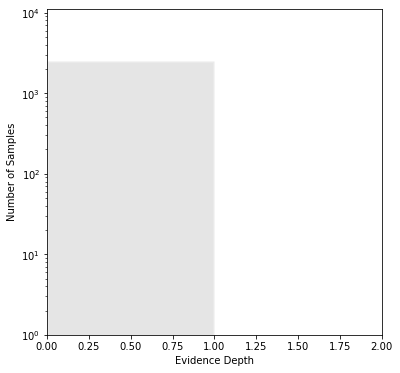

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 142


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


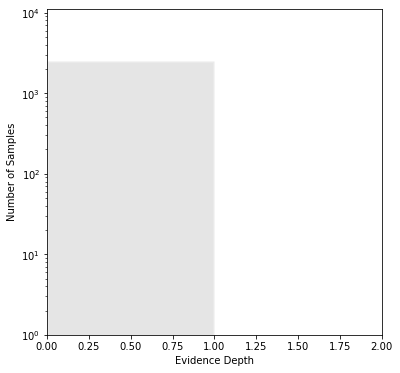

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 143


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


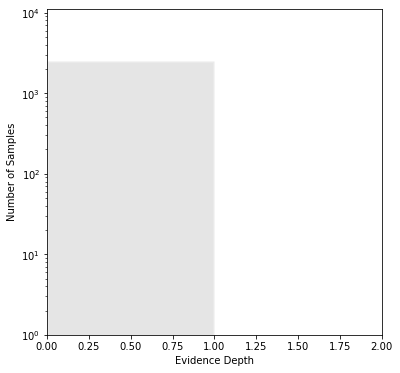

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 144


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


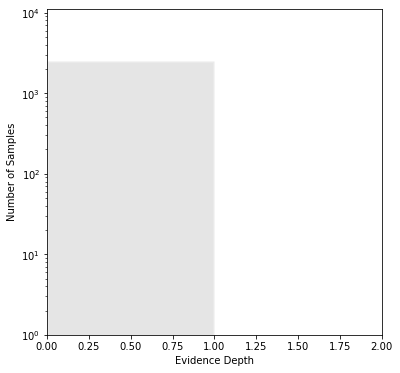

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 145


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


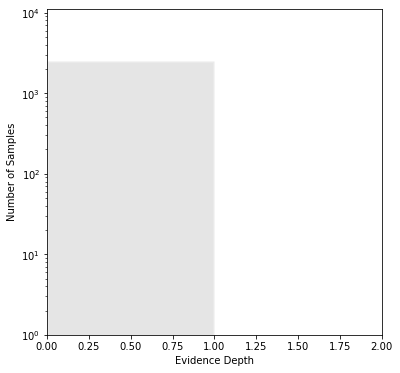

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 146


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


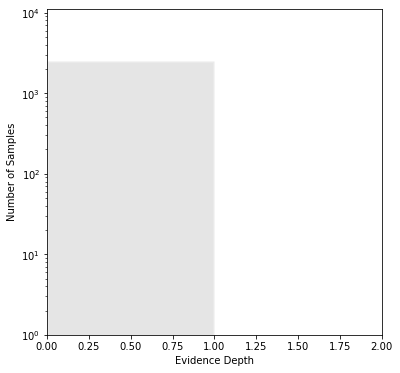

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 147


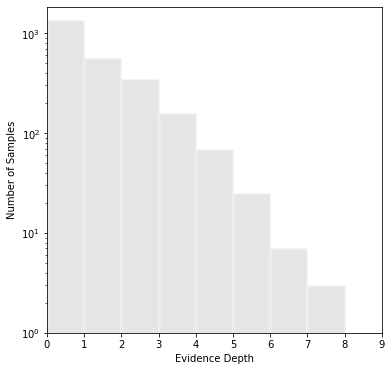

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 148


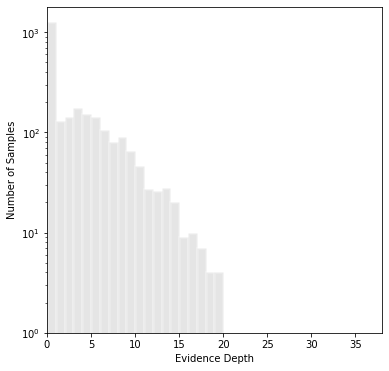

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 149


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


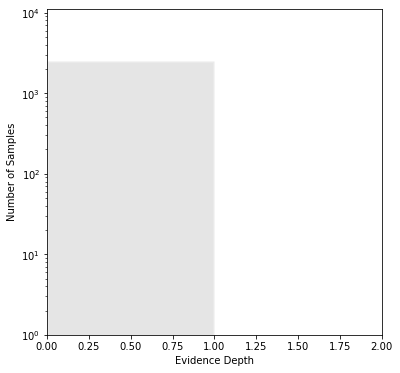

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 150


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


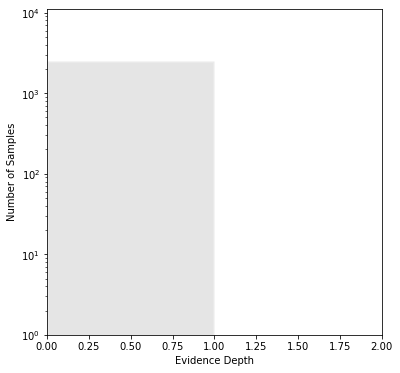

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 151


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


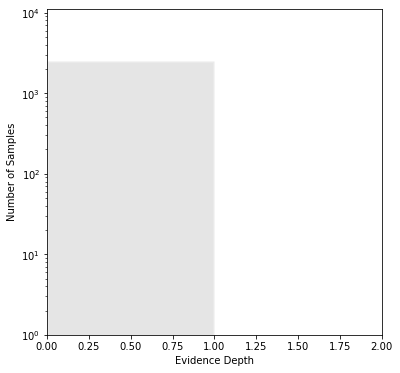

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 152


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


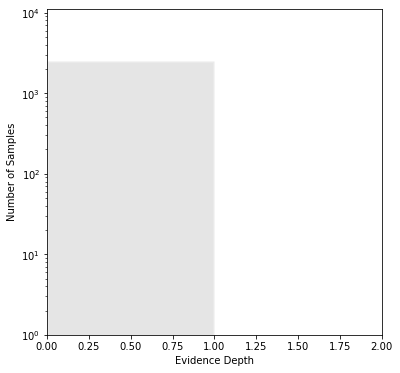

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 153


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


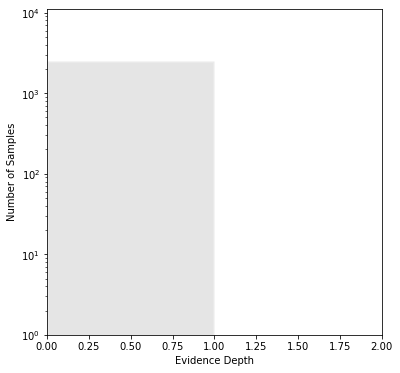

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 154


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


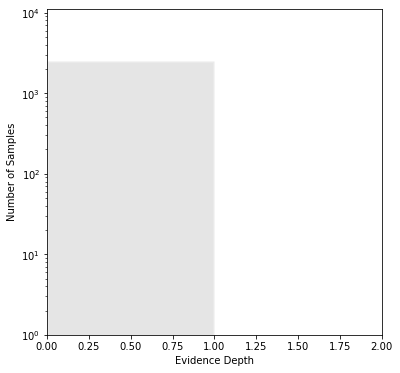

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 155


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


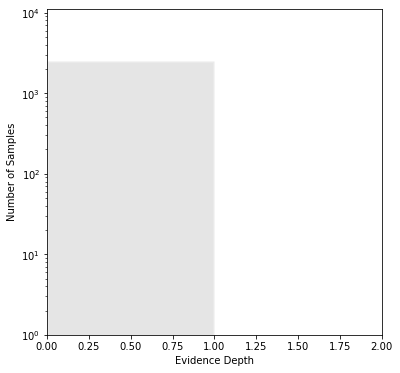

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 156


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


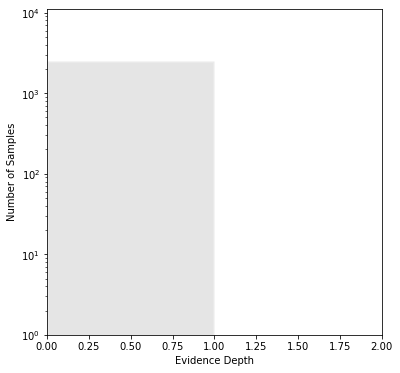

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 157


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


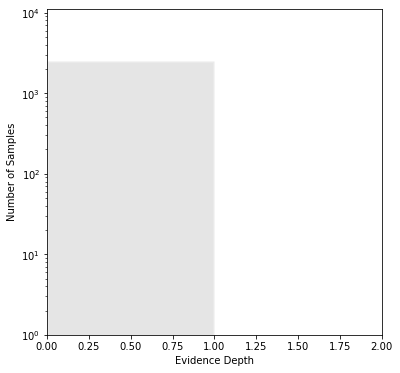

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 158


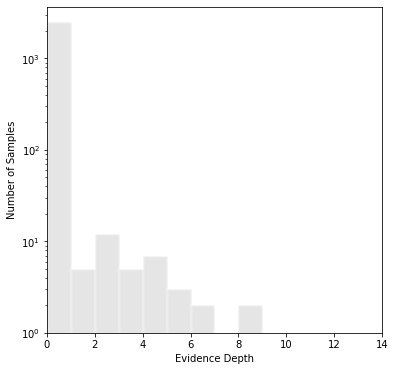

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 159


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


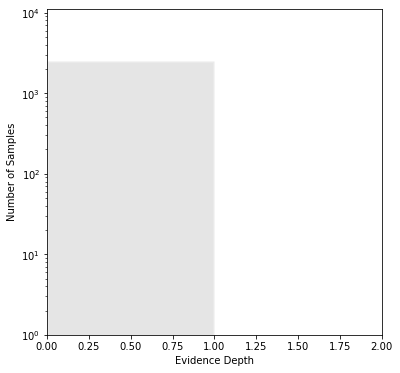

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 160


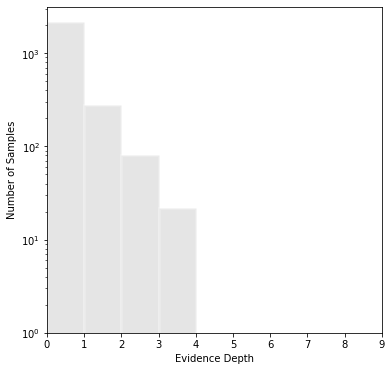

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 161


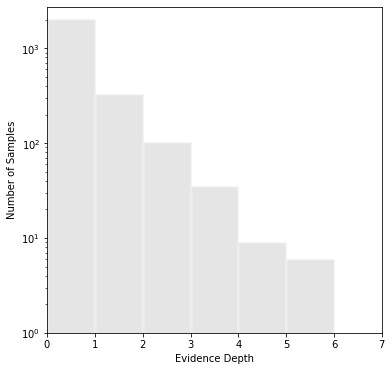

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 162


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


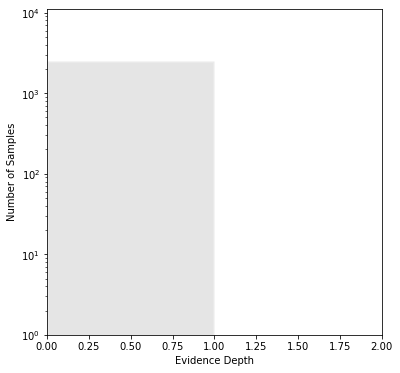

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 163


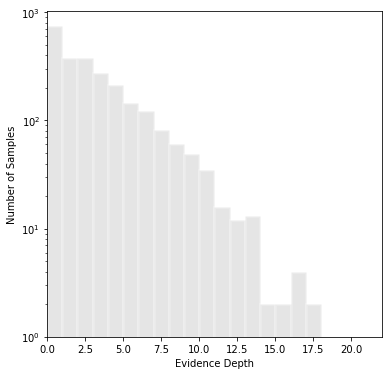

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 164


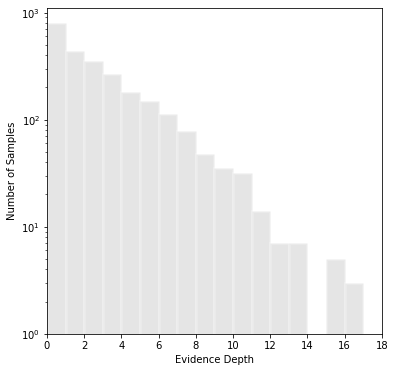

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 165


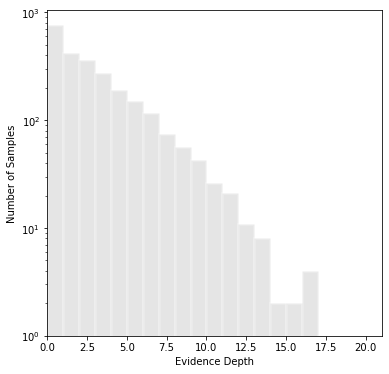

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 166


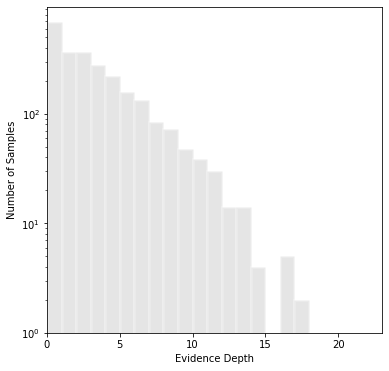

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 167


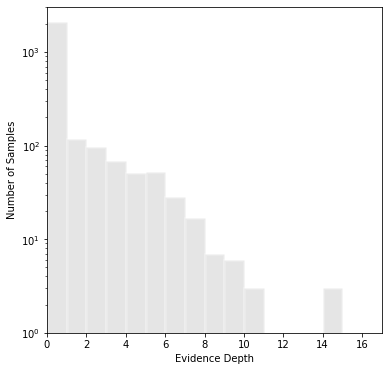

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 168


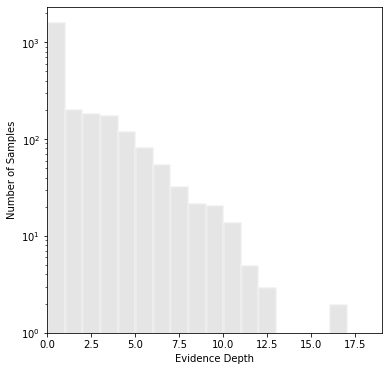

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 169


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


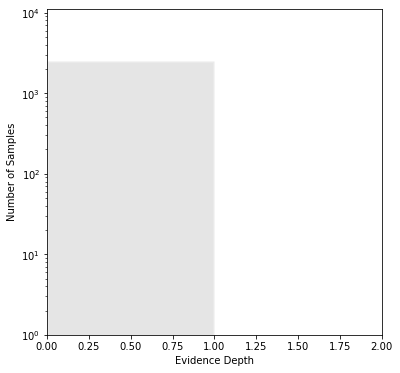

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 170


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


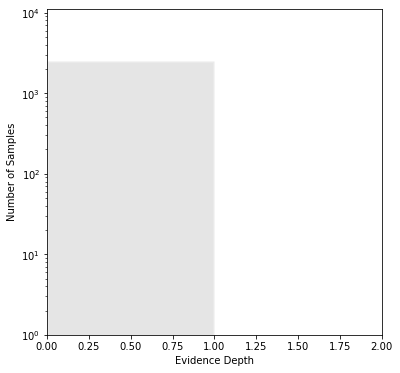

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 171


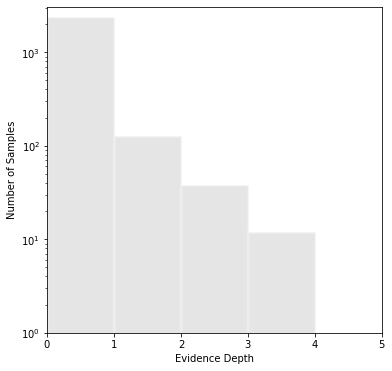

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 172


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


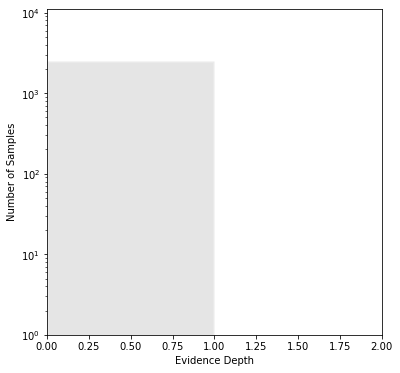

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 173


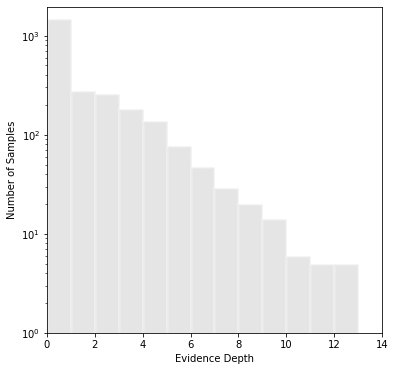

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 174


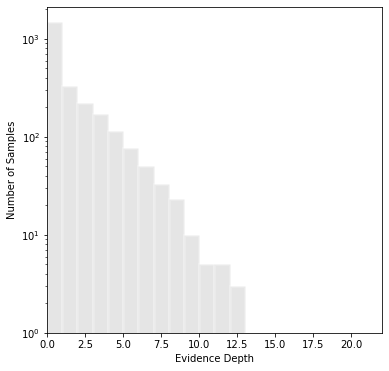

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 175


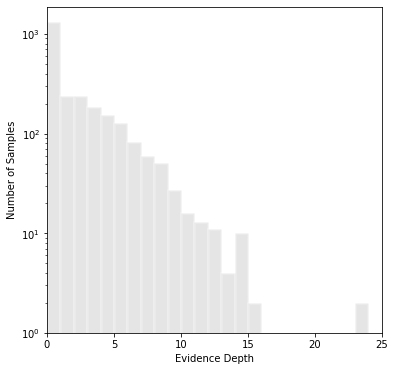

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 176


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


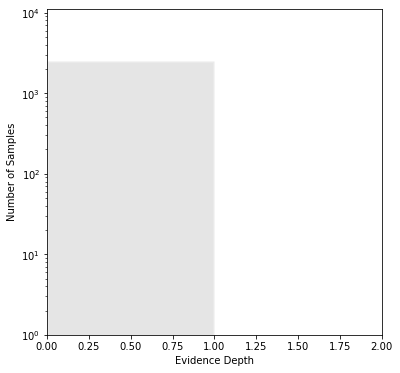

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 177


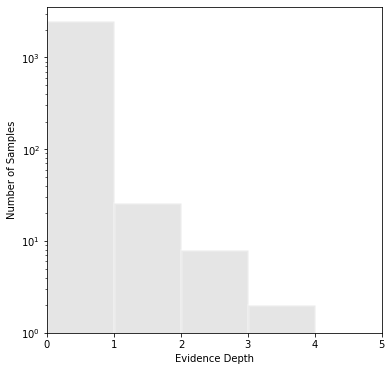

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 178


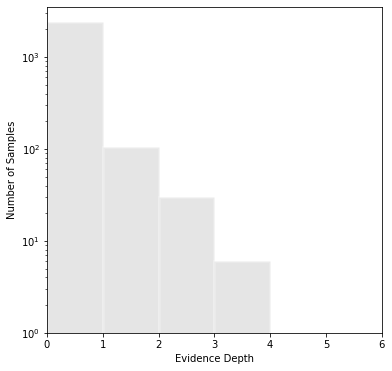

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 179


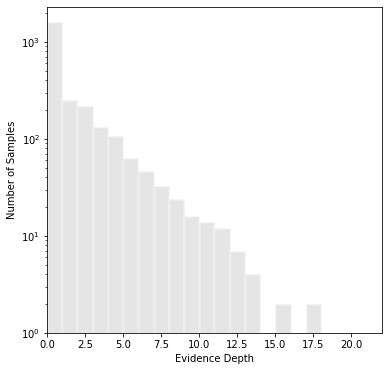

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 180


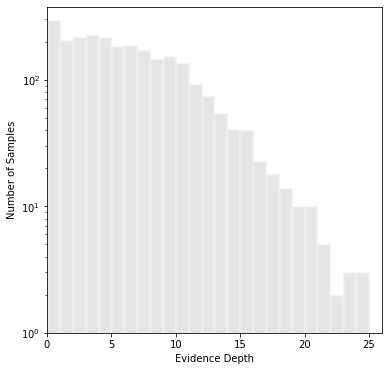

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 181


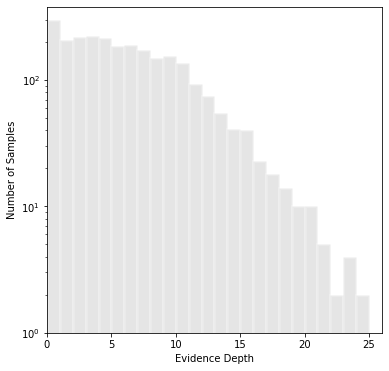

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 182


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


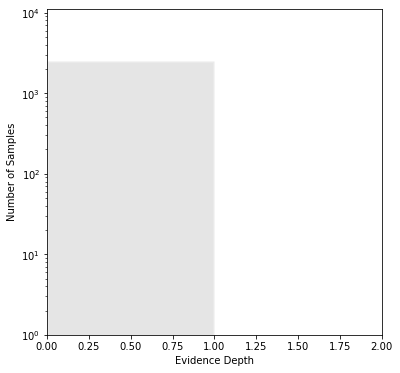

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 183


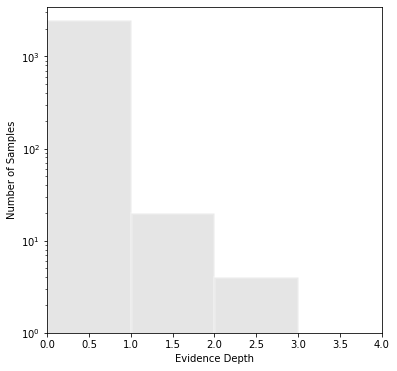

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 184


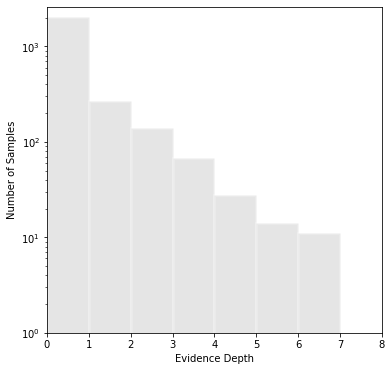

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 185


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


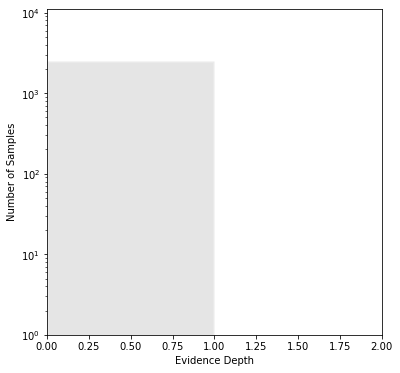

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 186


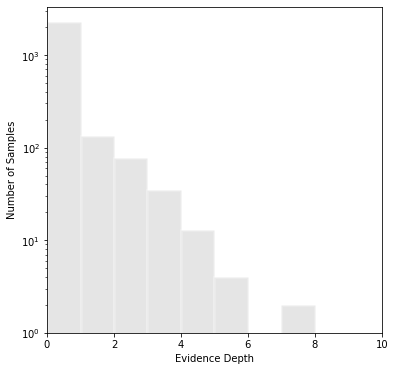

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 187


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


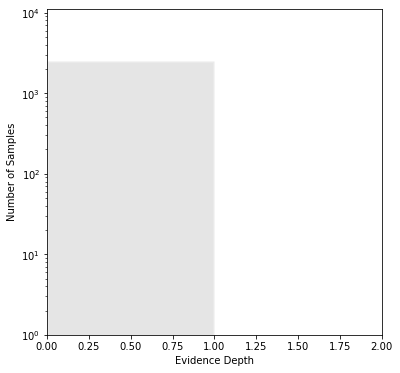

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 188


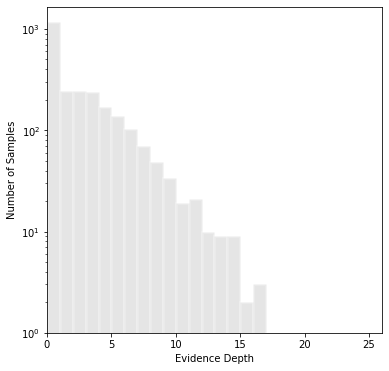

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 189


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


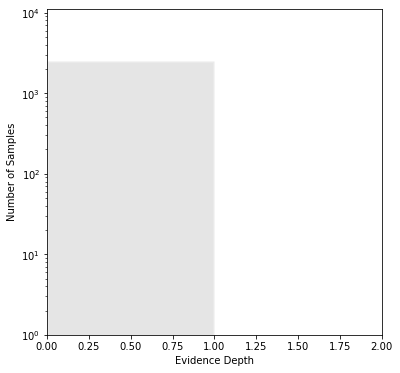

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 190


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


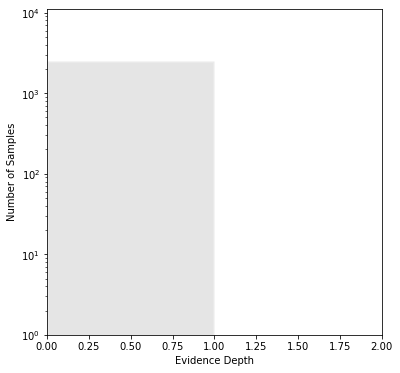

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 191


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


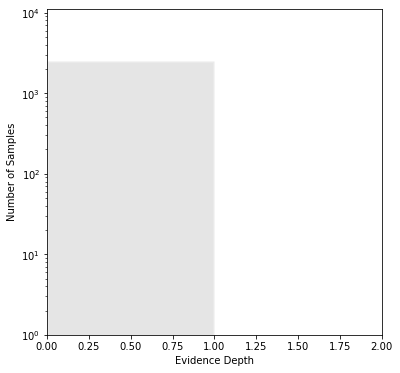

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 192


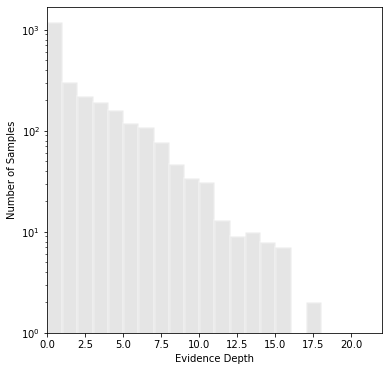

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 193


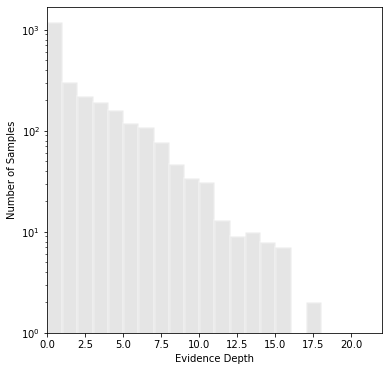

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 194


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


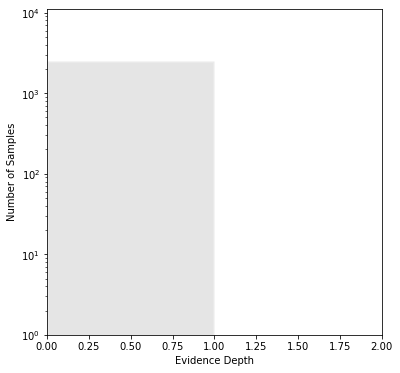

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 195


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


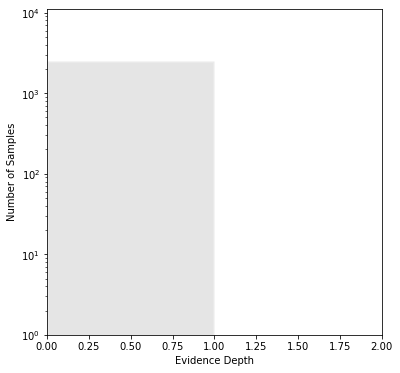

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 196


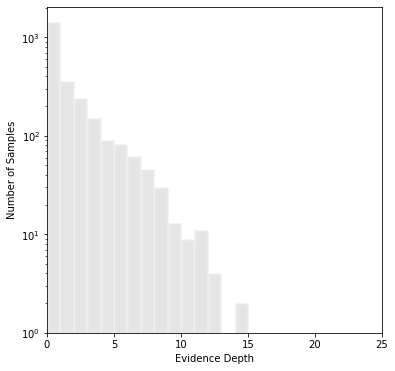

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 197


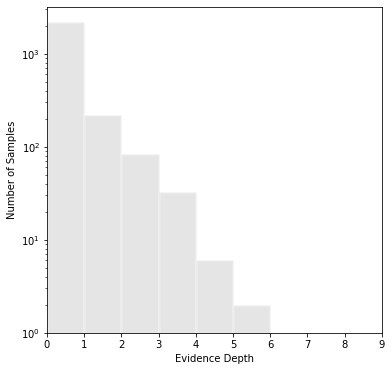

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 198


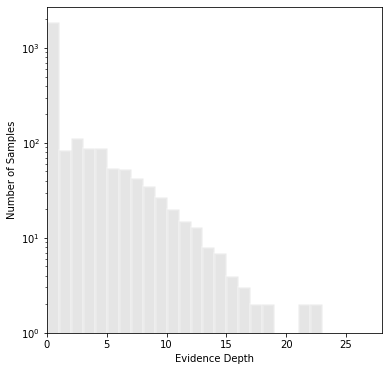

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 199


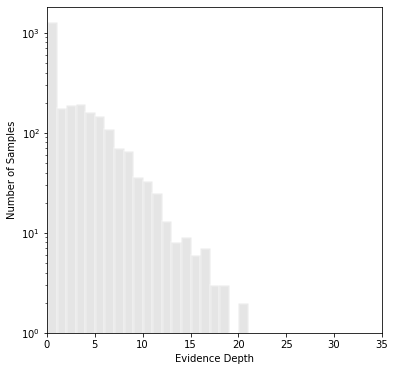

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 200


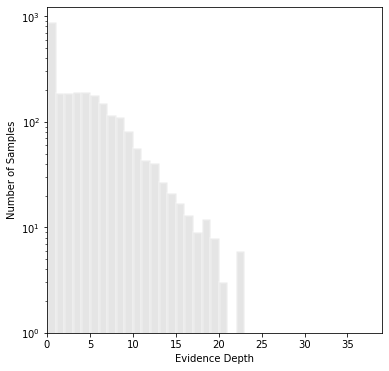

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 201


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


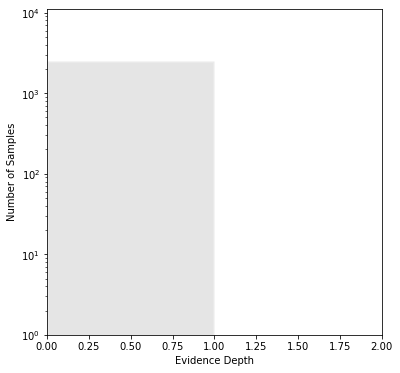

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 202


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


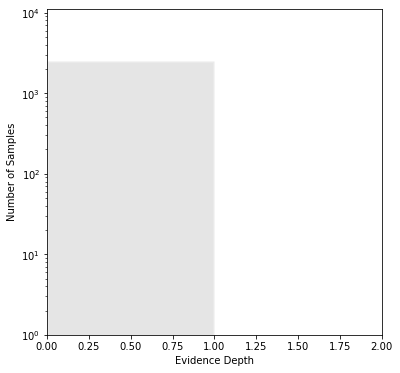

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 203


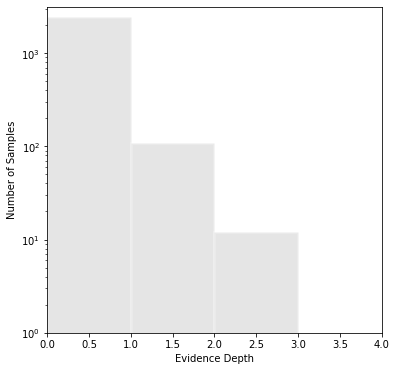

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 204


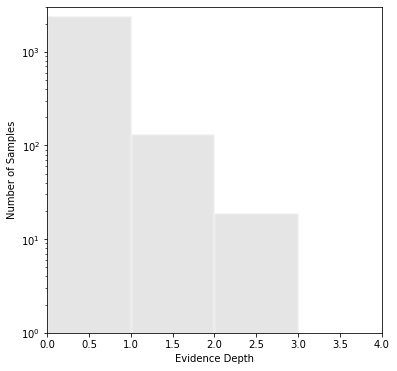

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 205


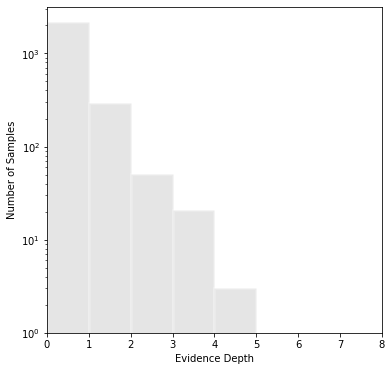

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 206


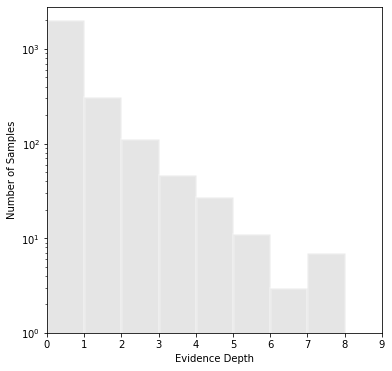

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 207


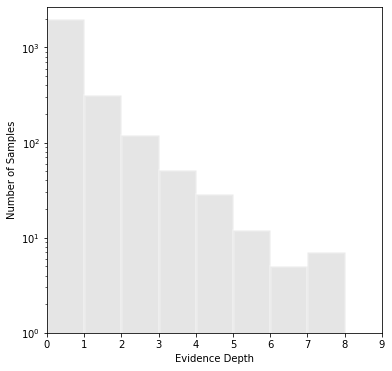

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 208


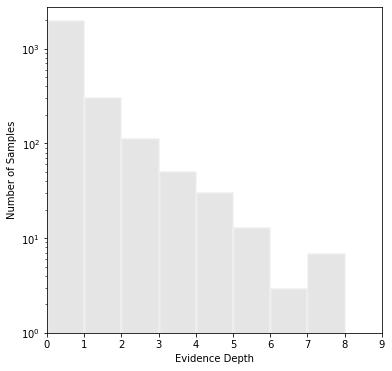

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 209


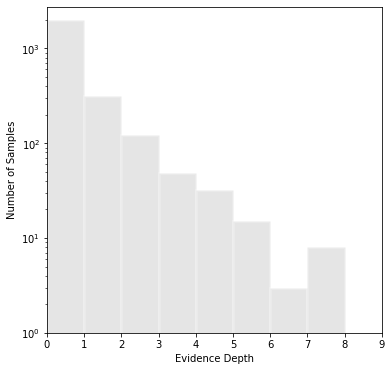

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 210


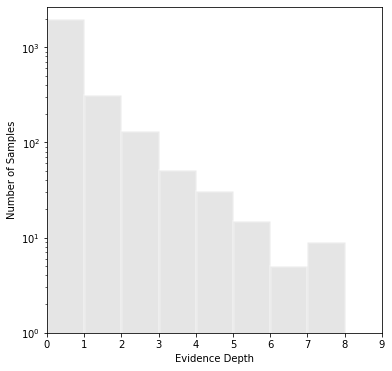

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 211


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


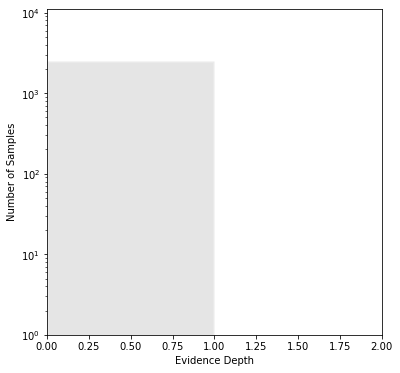

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 212


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


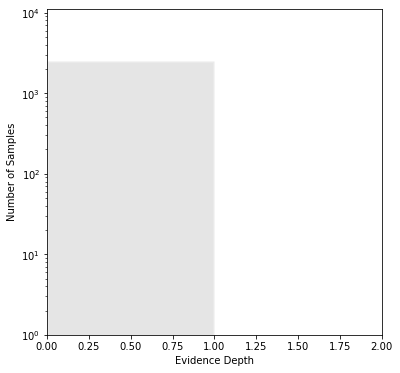

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 213


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


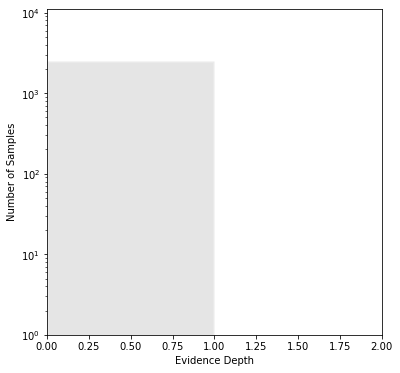

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 214


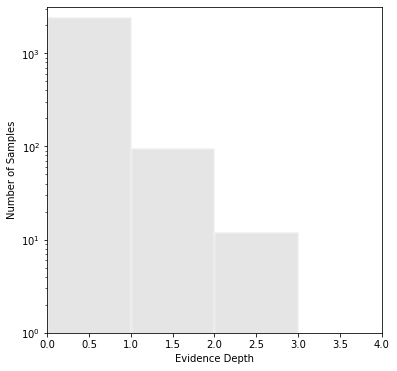

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 215


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


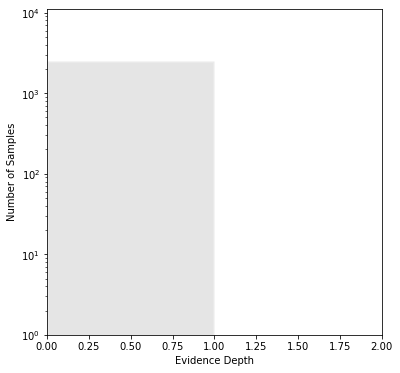

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 216


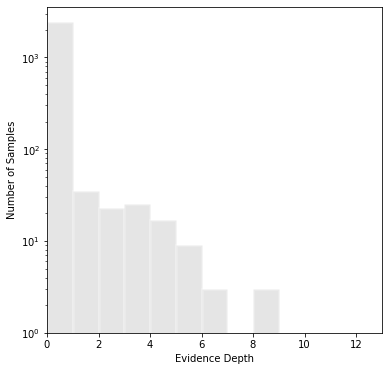

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 217


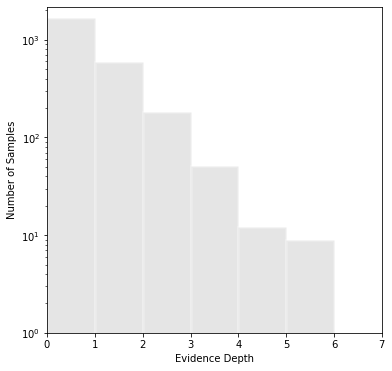

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 218


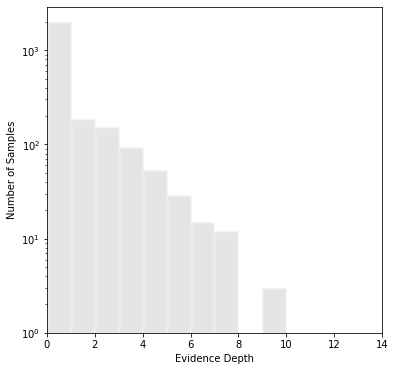

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 219


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


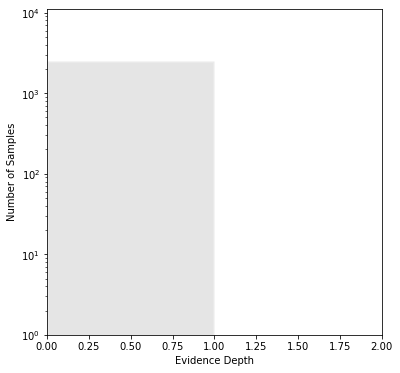

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 220


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


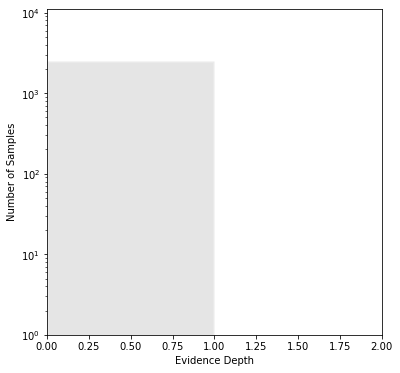

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 221


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


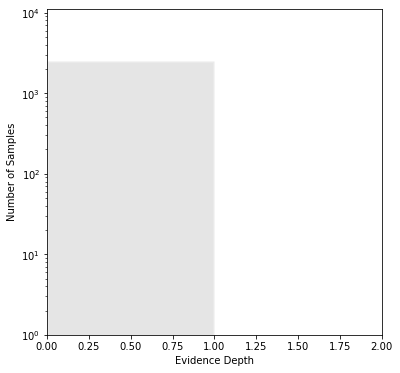

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 222


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


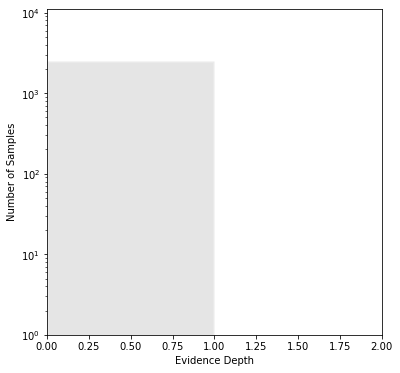

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 223


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


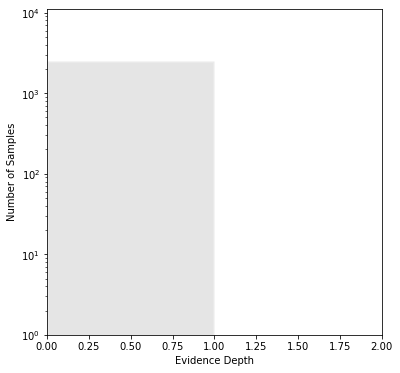

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 224


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


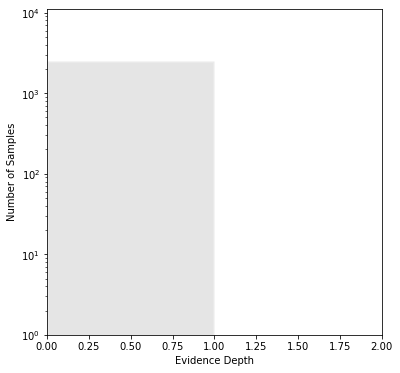

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 225


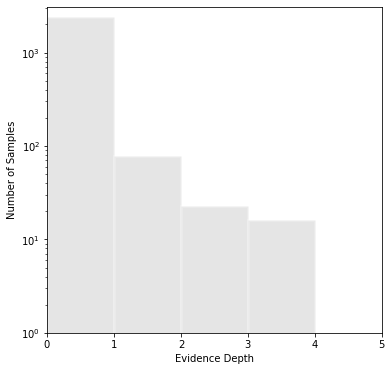

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 226


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


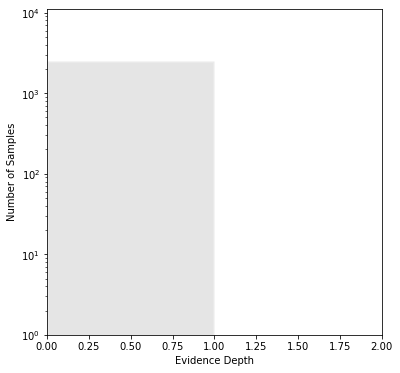

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 227


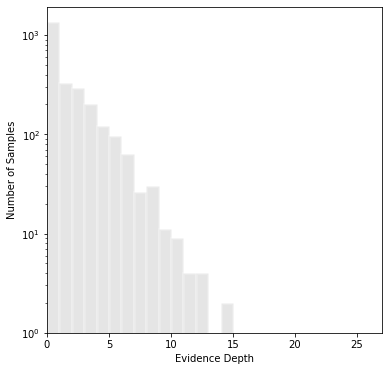

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 228


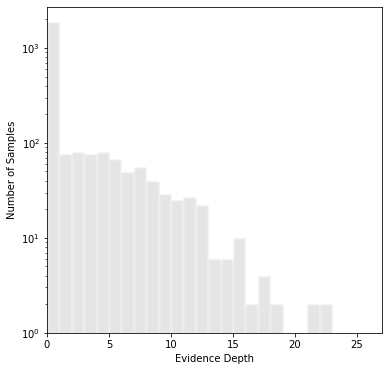

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 229


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


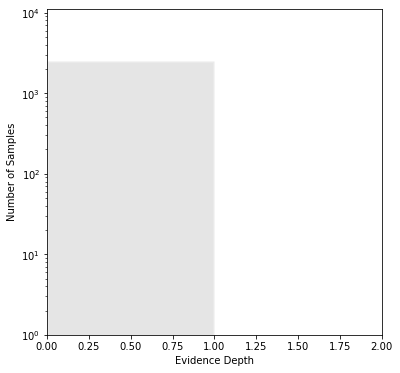

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 230


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


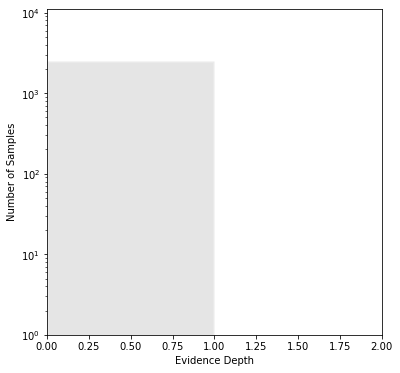

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 231


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


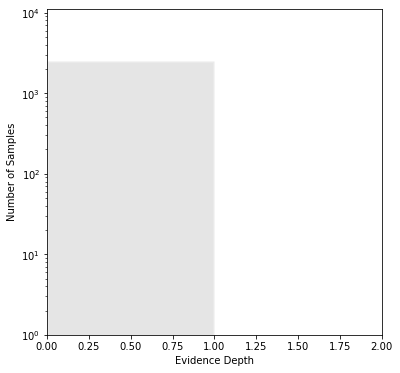

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 232


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


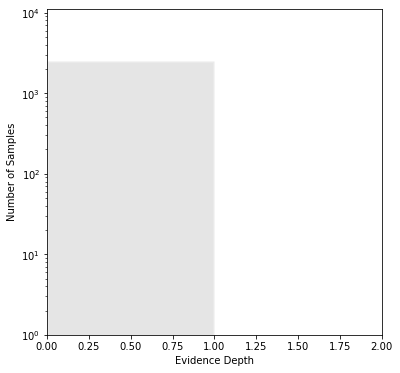

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 233


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


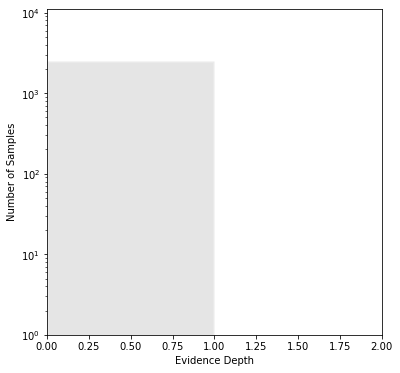

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 234


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


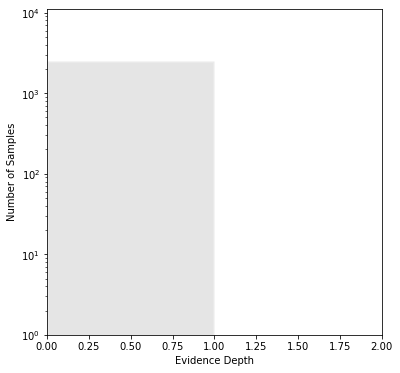

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 235


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


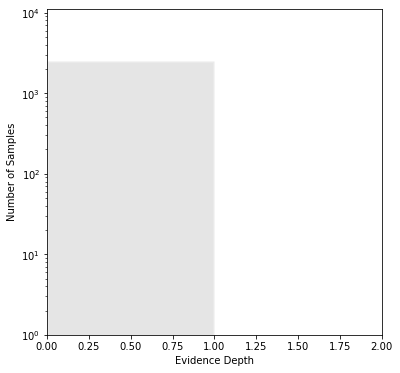

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 236


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


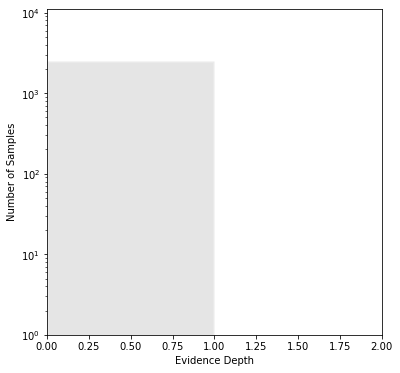

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 237


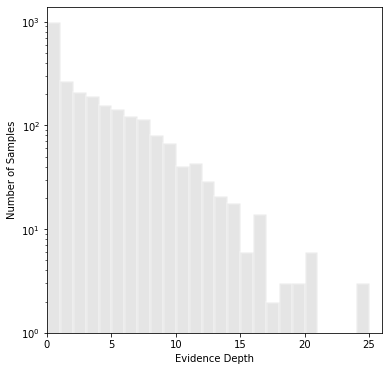

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 238


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


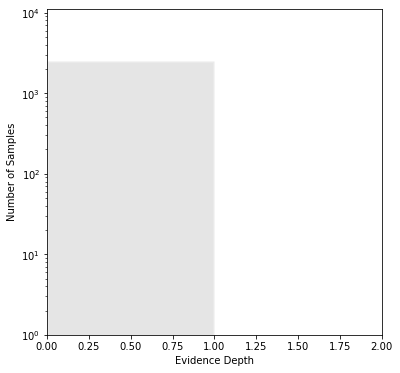

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 239


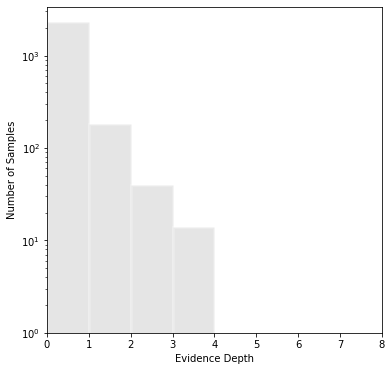

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 240


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


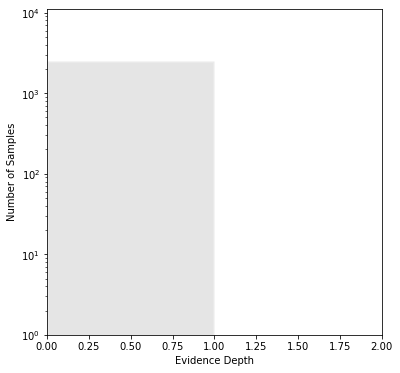

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 241


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


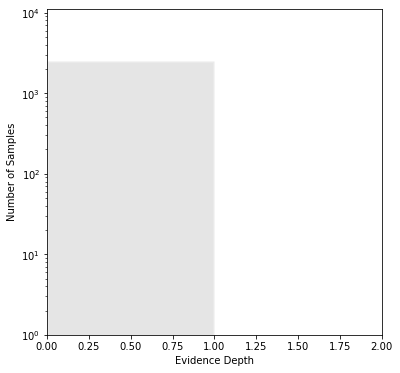

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 242


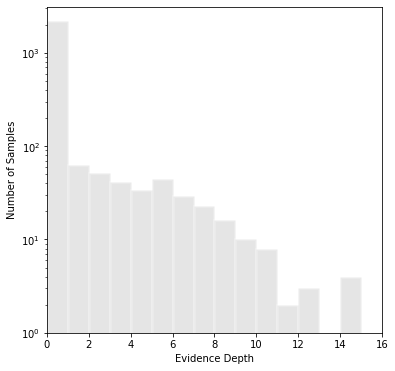

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 243


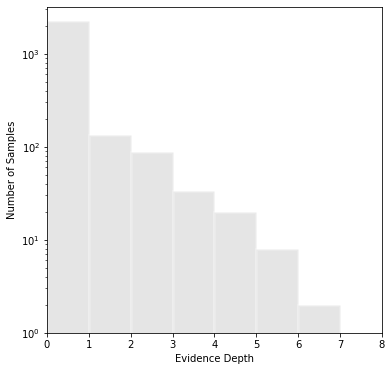

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 244


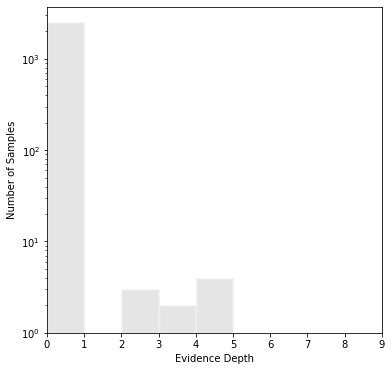

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 245


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


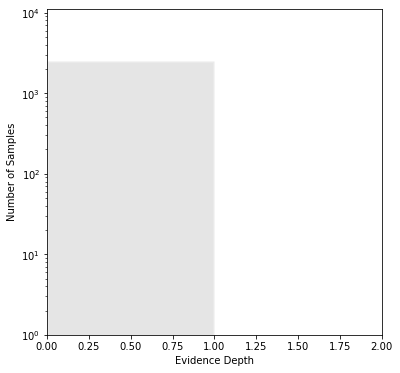

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 246


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


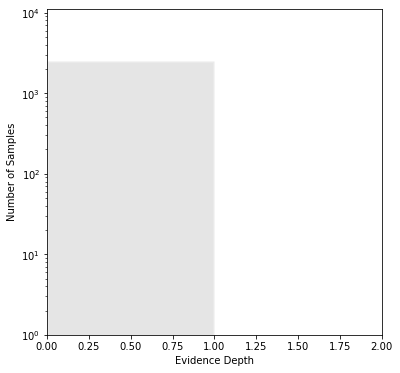

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 247


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


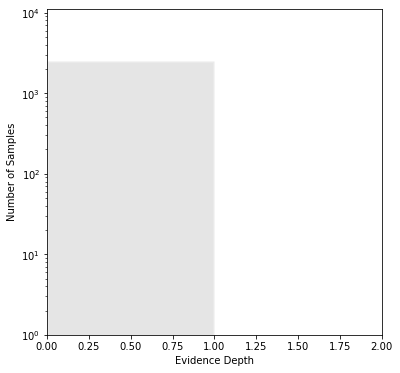

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 248


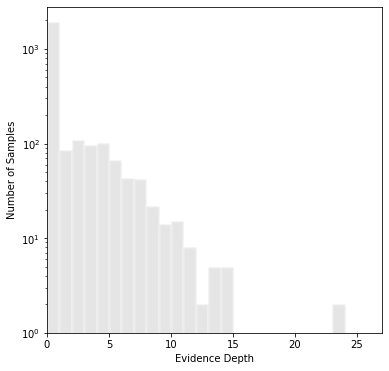

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 249


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


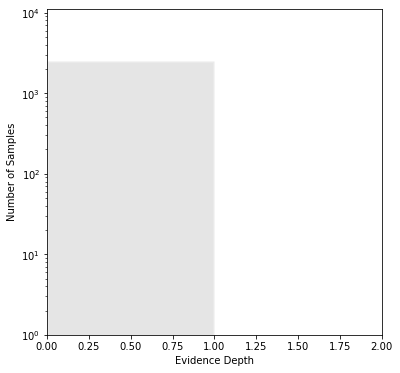

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 250


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


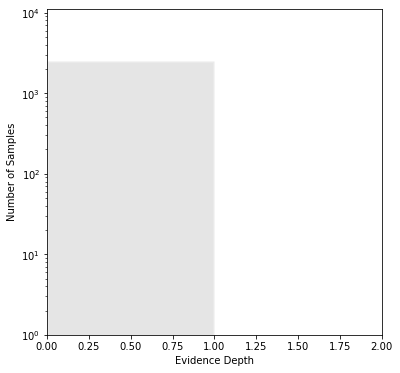

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 251


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


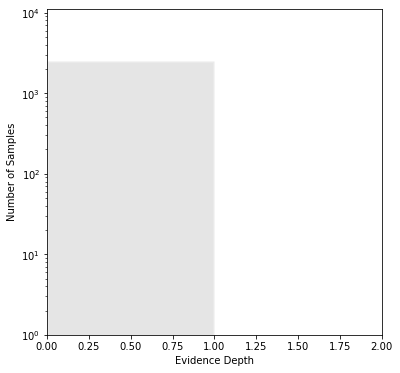

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 252


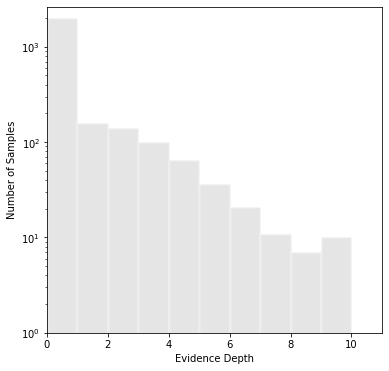

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 253


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


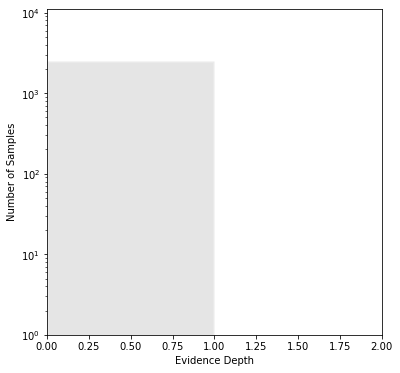

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 254


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


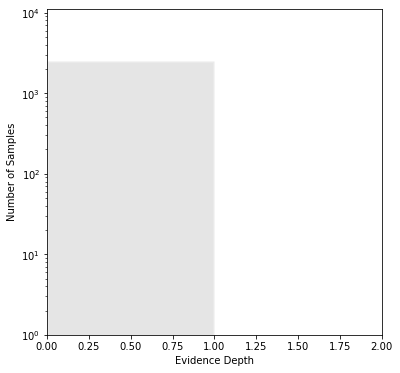

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 255


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


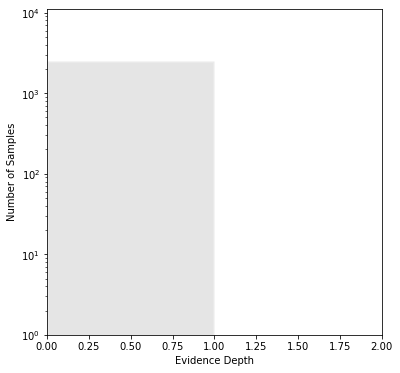

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 256


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


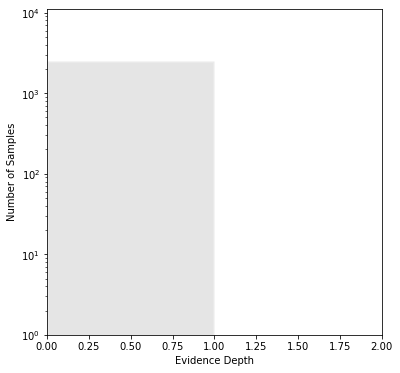

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 257


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


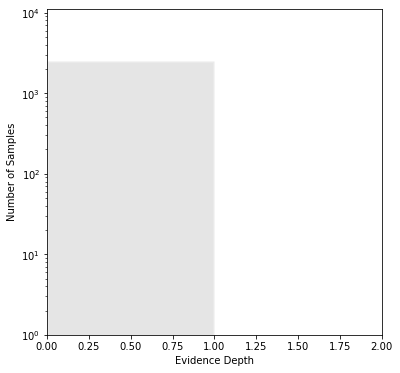

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 258


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


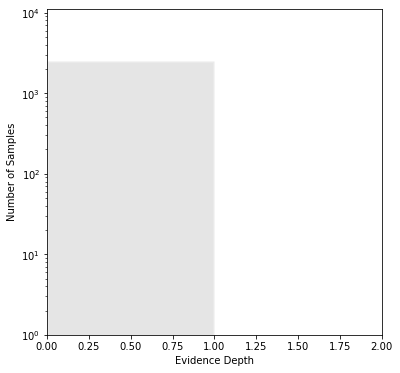

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 259


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


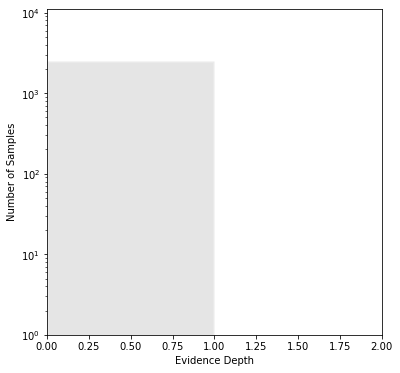

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 260


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


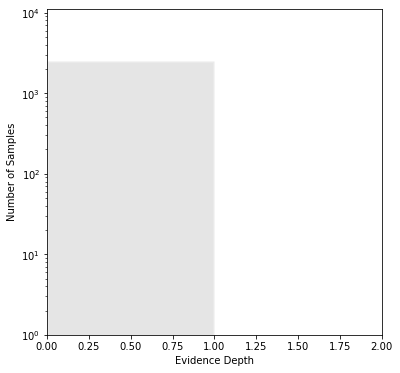

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 261


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


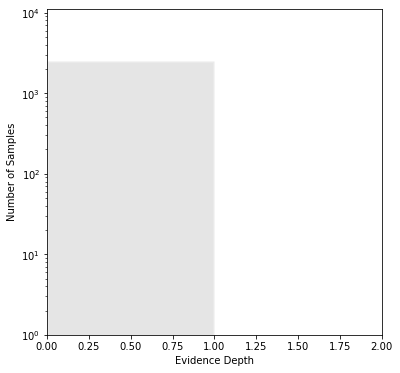

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 262


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


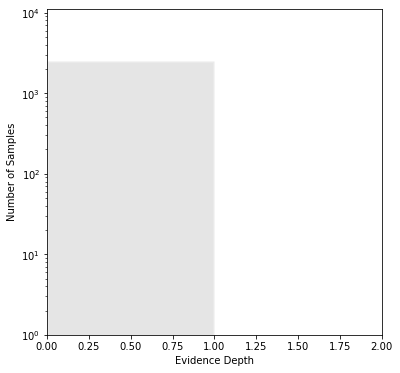

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 263


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


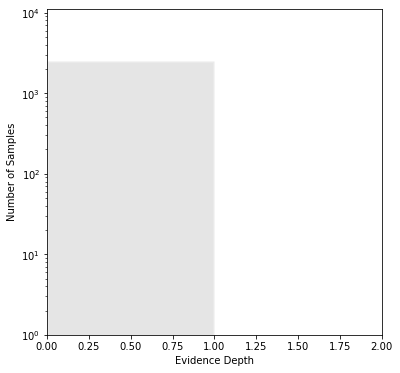

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 264


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


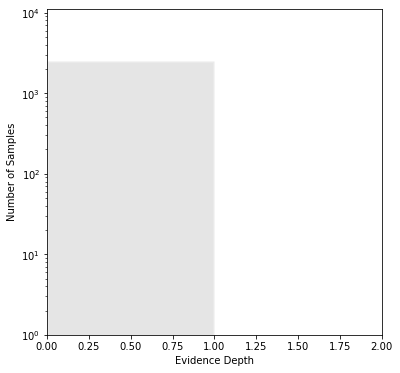

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 265


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


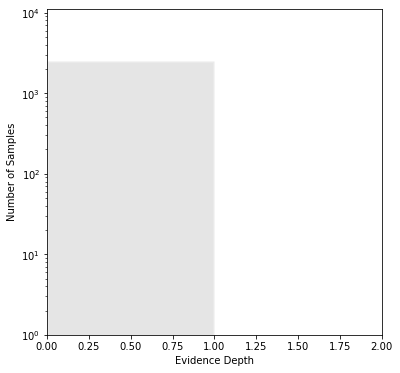

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 266


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


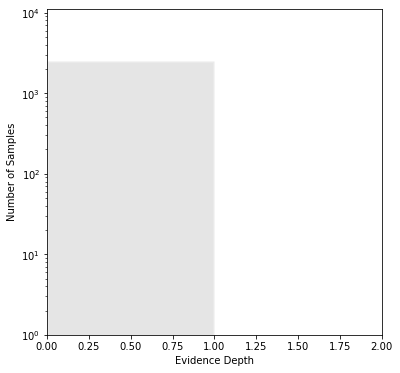

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 267


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


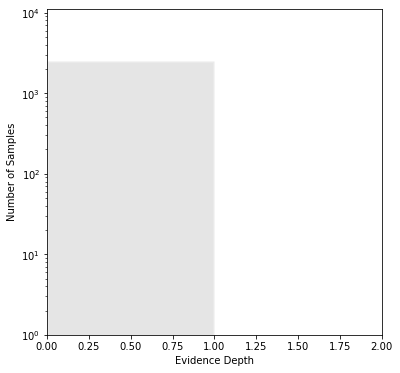

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 268


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


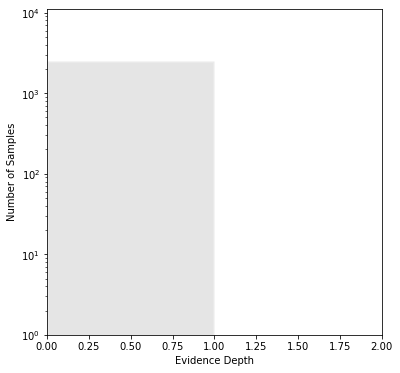

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 269


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


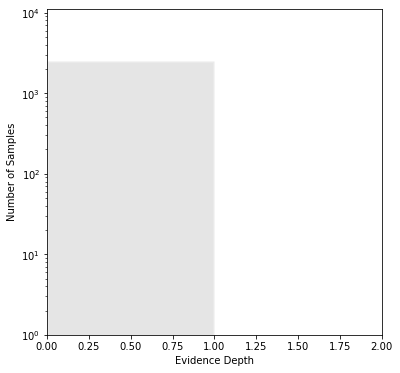

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 270


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


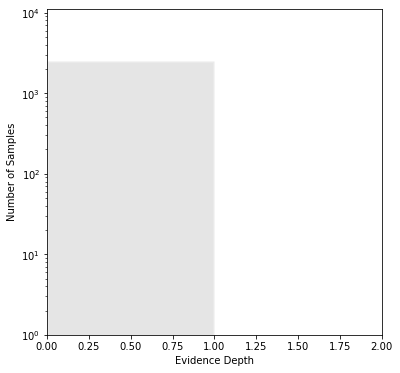

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 271


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


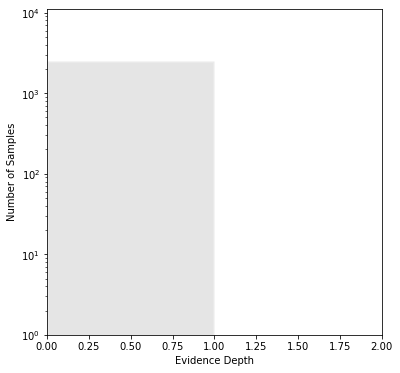

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 272


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


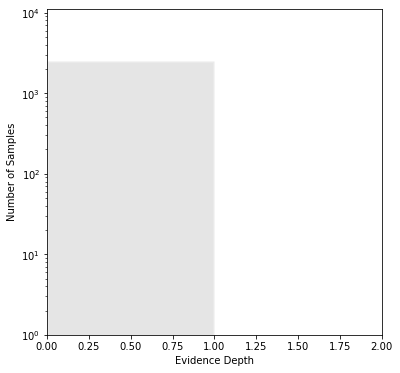

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 273


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


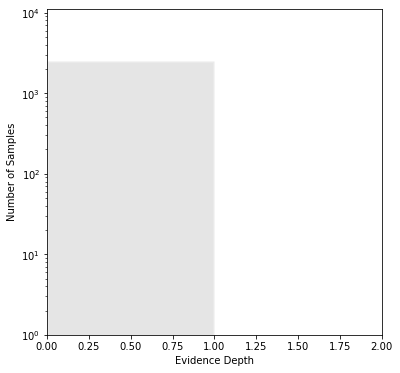

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 274


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


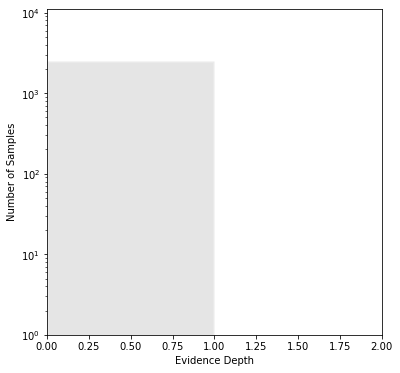

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 275


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


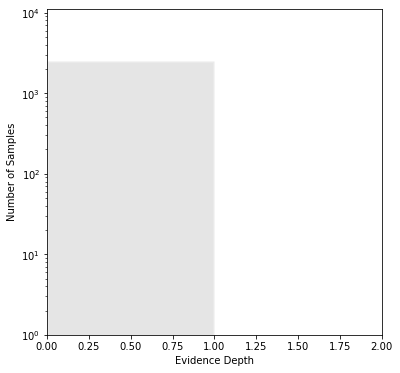

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 276


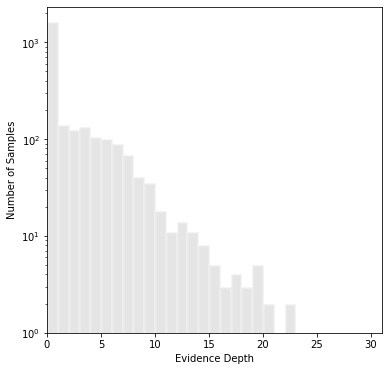

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 277


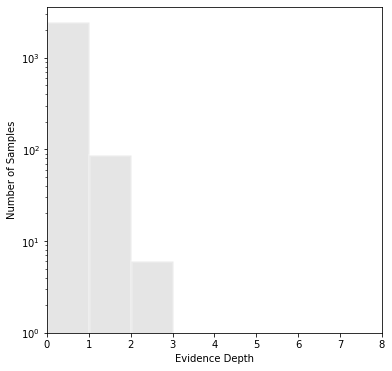

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 278


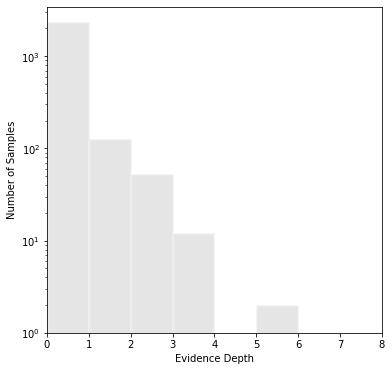

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 279


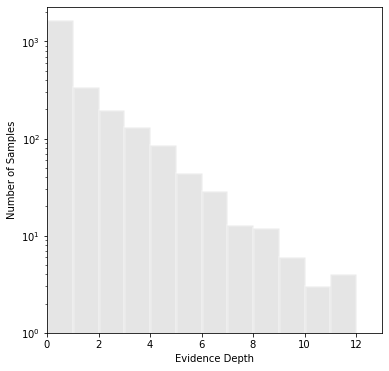

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 280


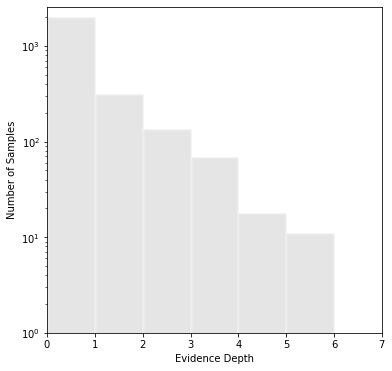

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 281


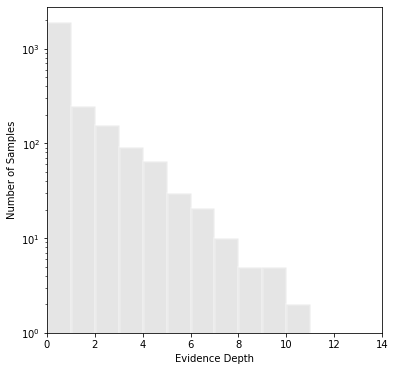

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 282


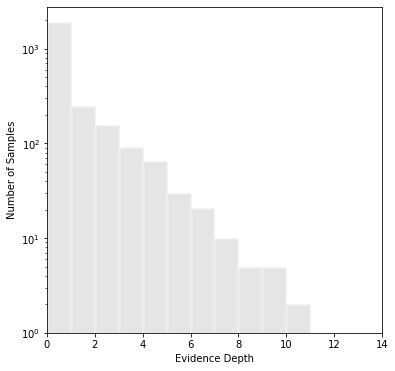

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 283


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


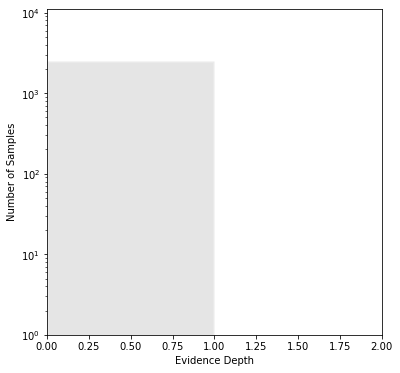

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 284


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


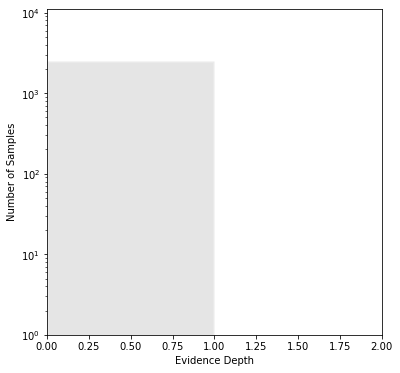

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 285


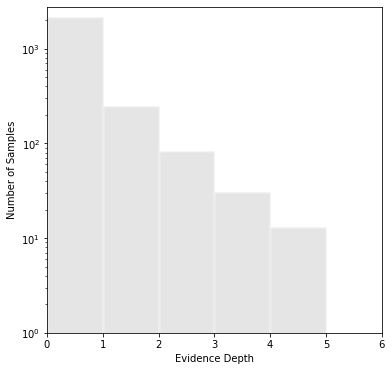

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 286


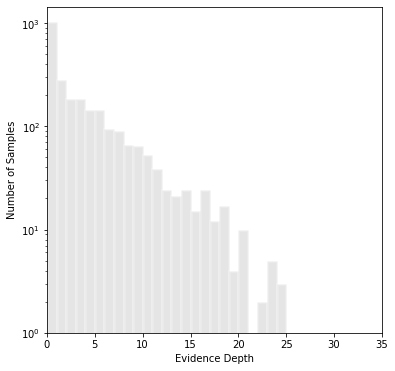

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 287


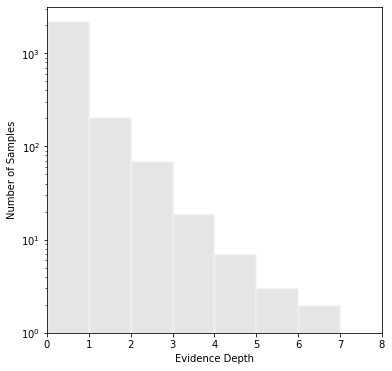

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 288


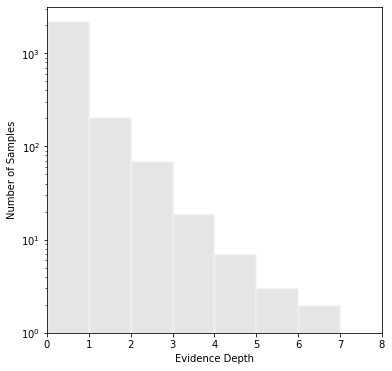

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 289


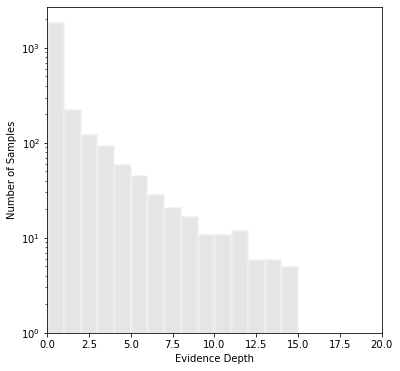

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 290


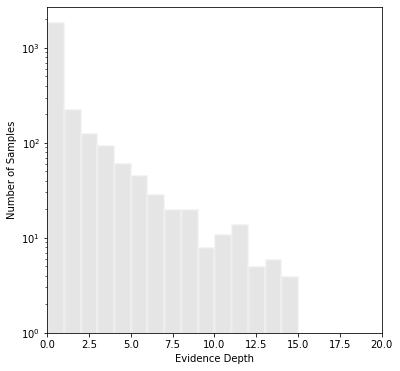

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 291


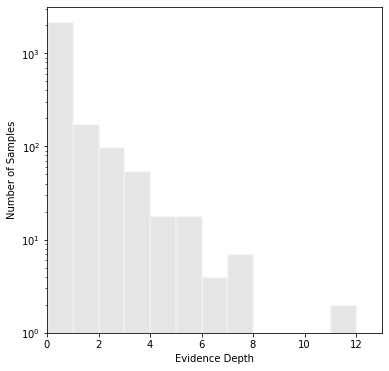

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 292


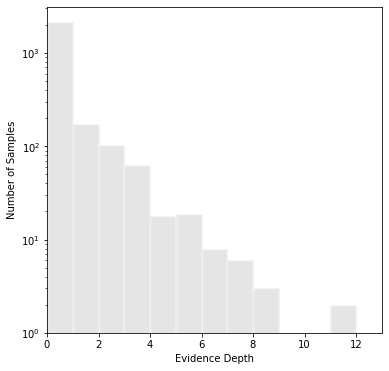

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 293


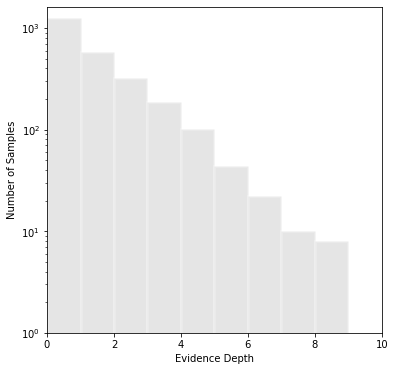

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 294


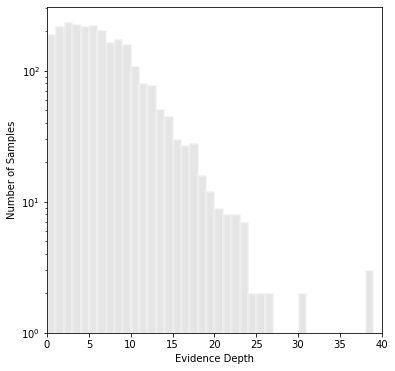

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 295


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


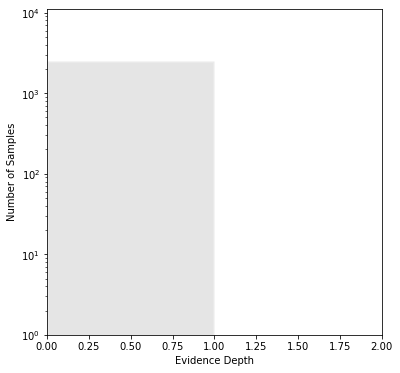

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 296


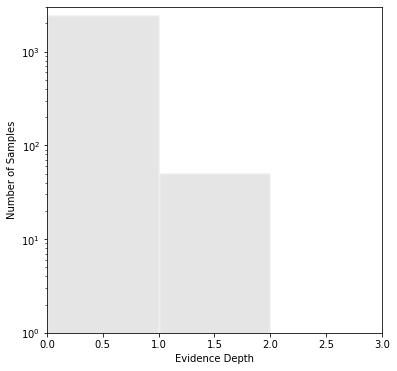

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 297


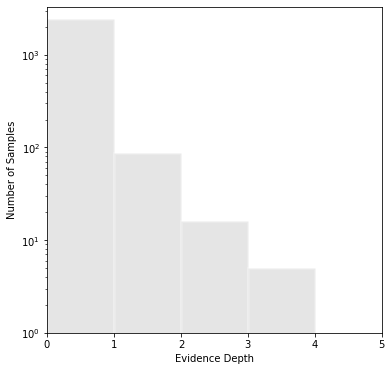

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 298


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


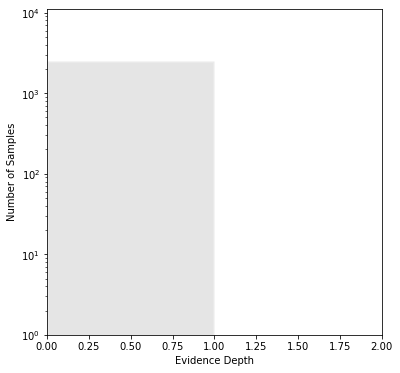

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 299


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


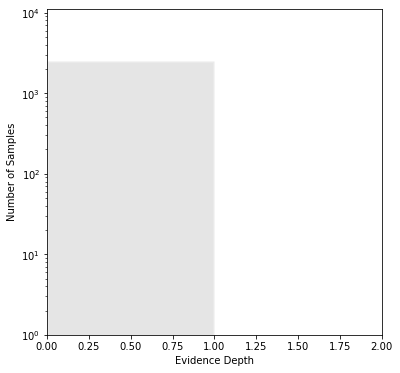

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 300


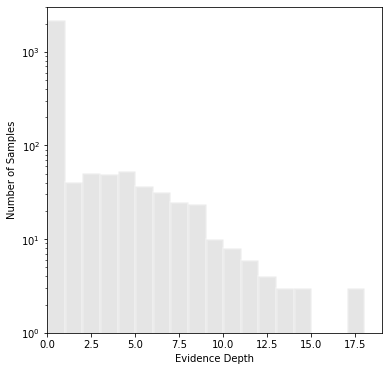

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 301


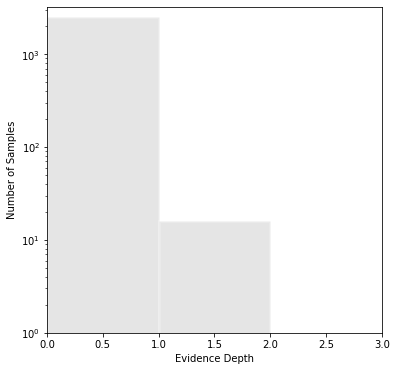

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 302


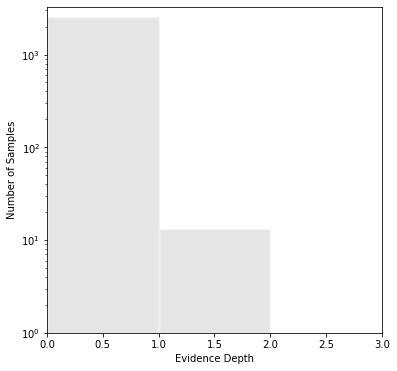

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 303


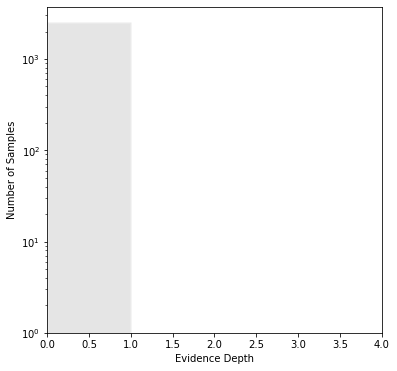

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 304


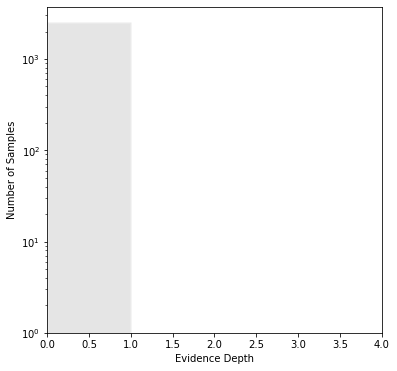

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 305


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


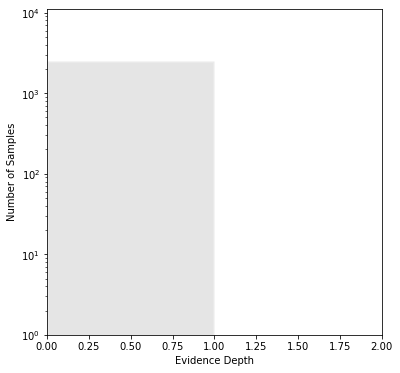

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 306


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


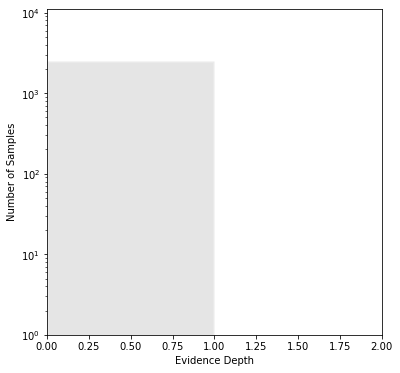

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 307


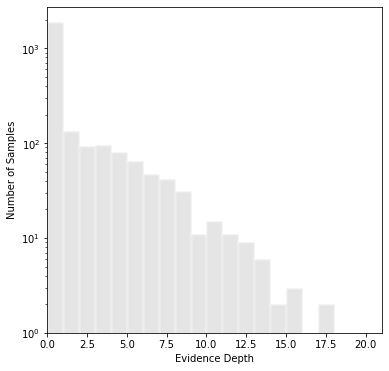

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 308


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


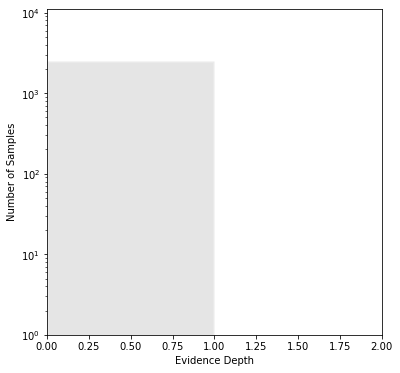

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 309


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


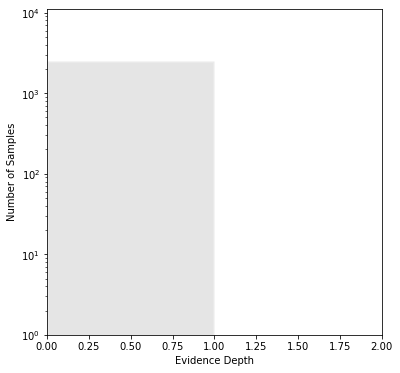

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 310


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


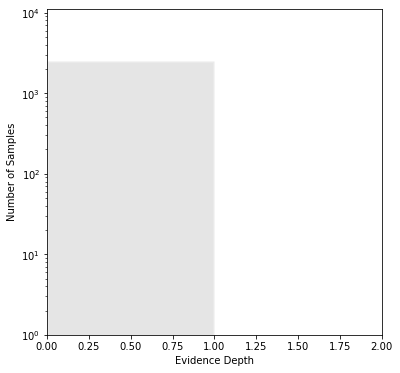

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 311


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


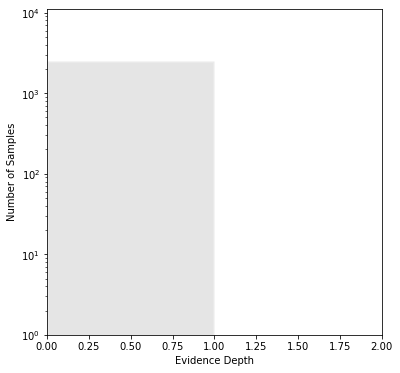

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 312


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


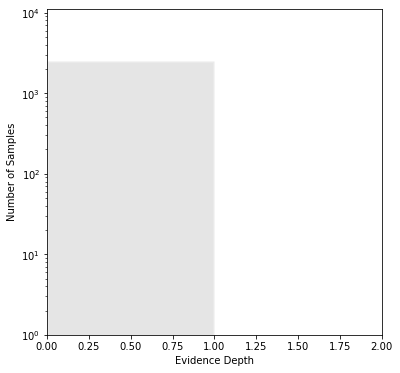

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 313


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


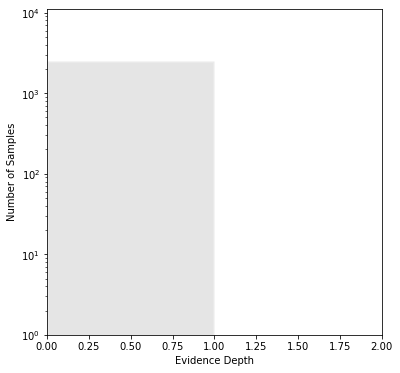

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 314


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


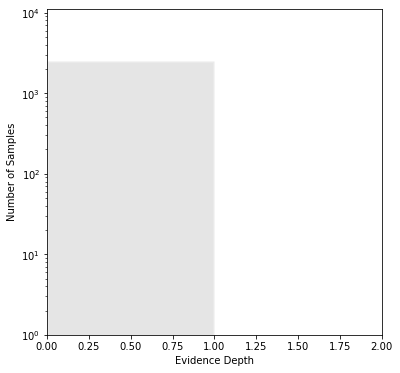

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 315


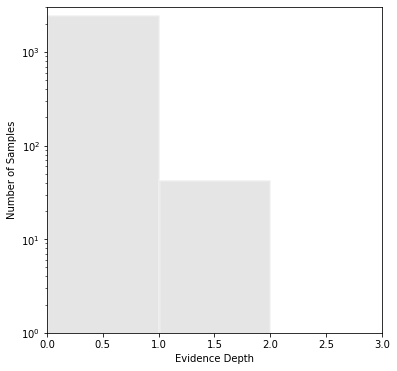

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 316


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


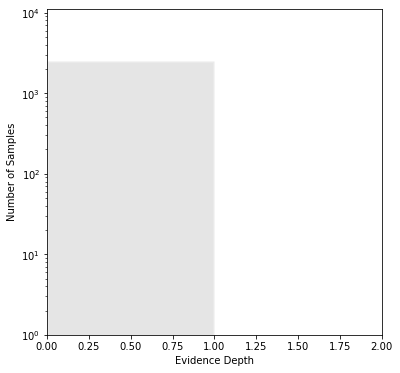

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 317


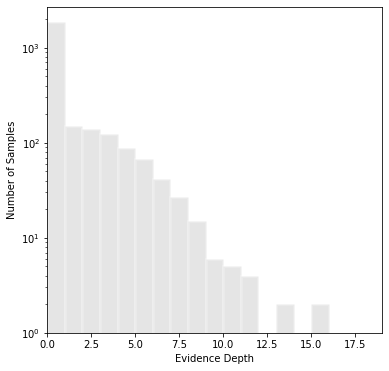

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 318


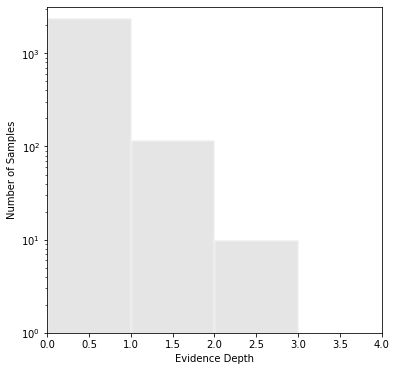

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 319


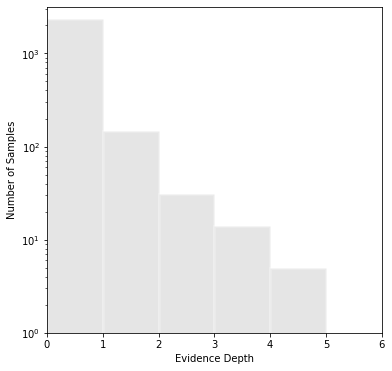

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 320


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


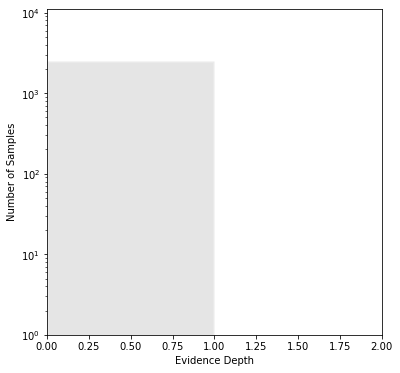

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 321


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


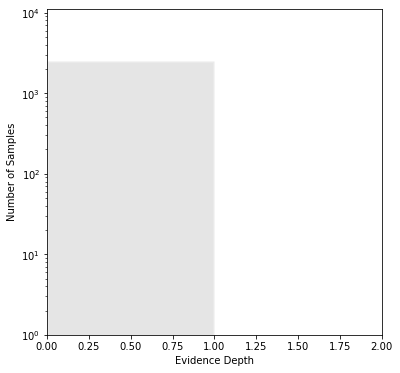

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 322


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


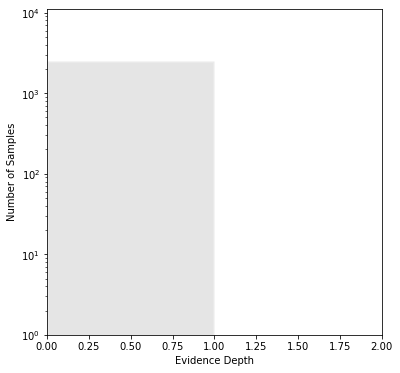

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 323


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


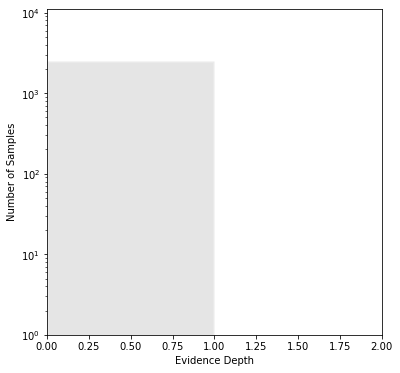

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 324


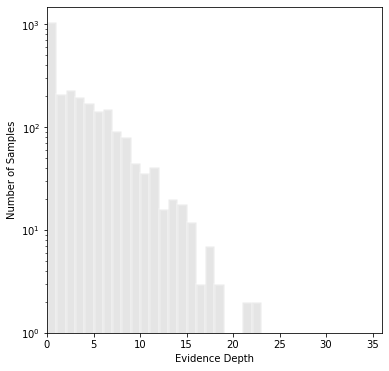

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 325


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


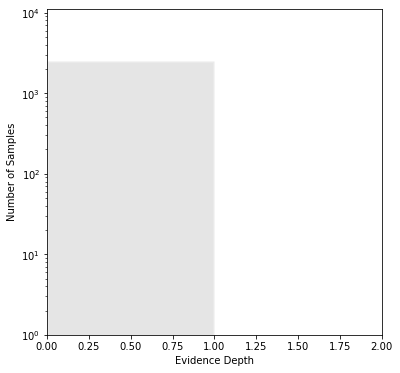

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 326


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


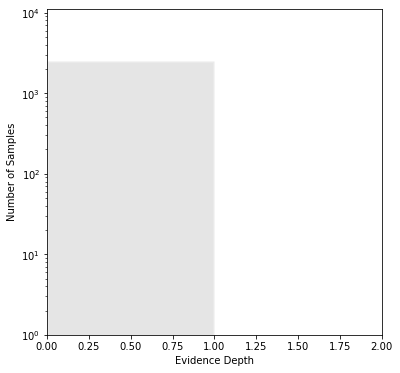

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 327


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


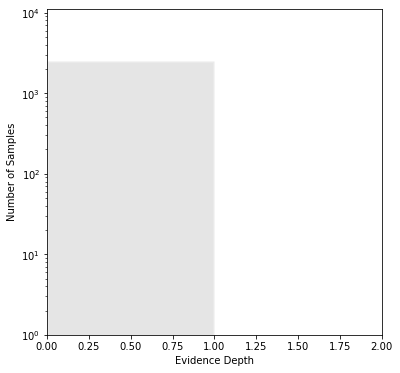

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 328


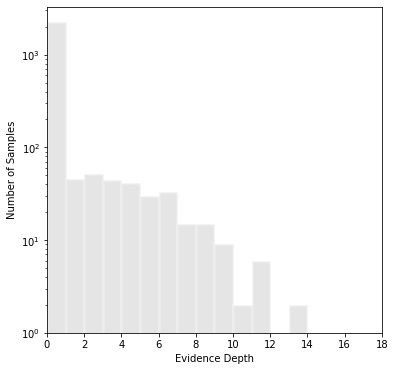

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 329


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


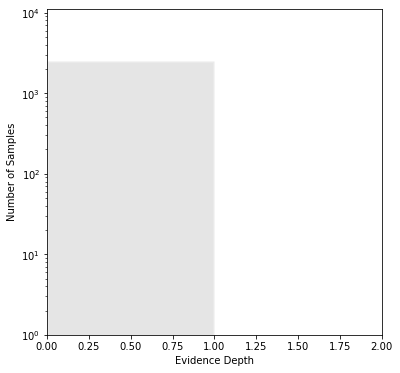

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 330


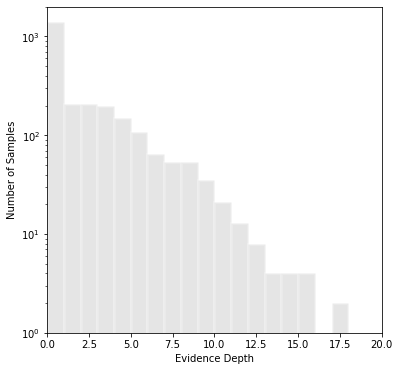

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 331


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


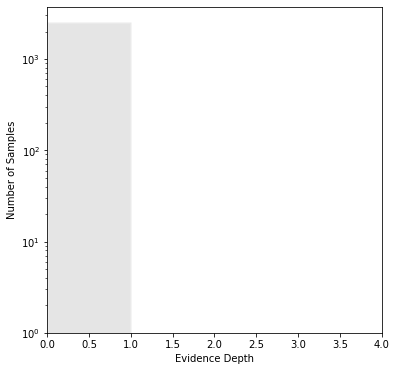

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 332


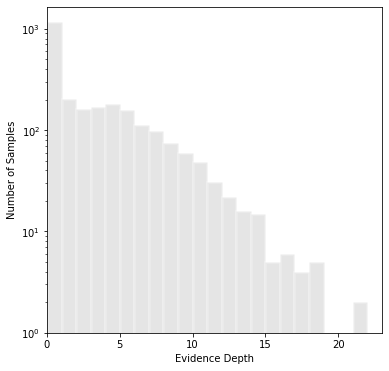

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 333


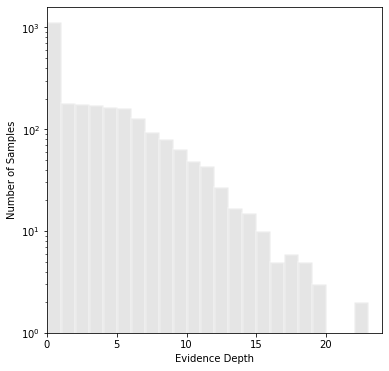

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 334


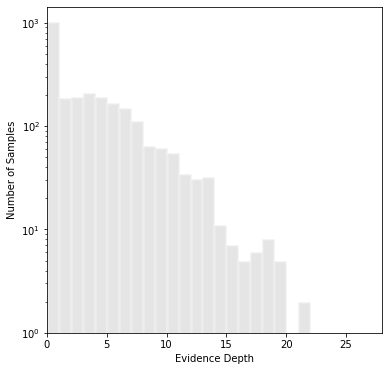

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 335


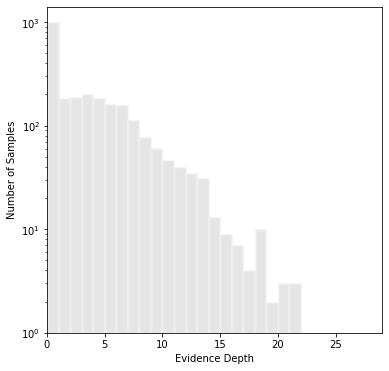

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 336


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


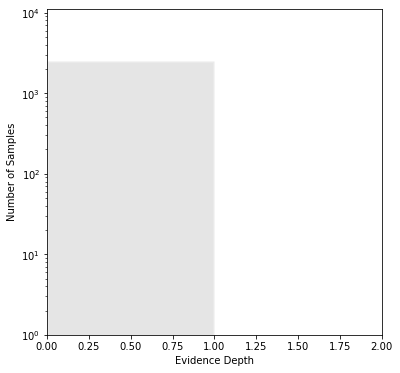

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 337


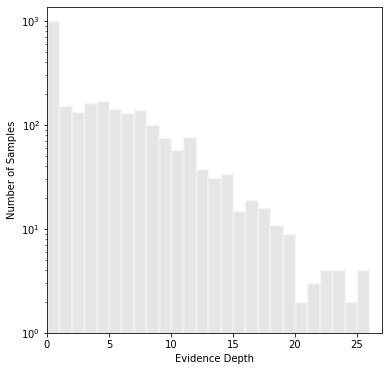

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 338


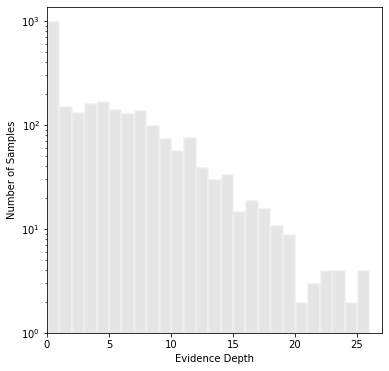

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 339


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


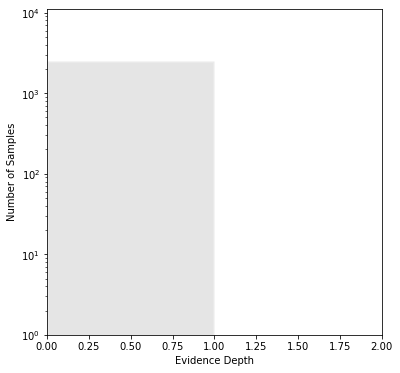

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 340


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


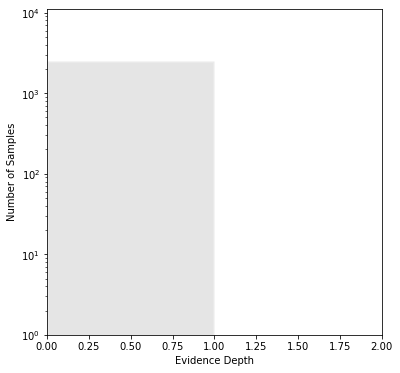

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 341


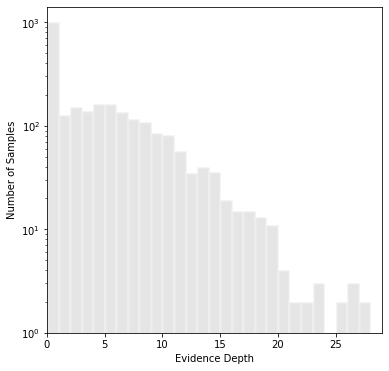

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 342


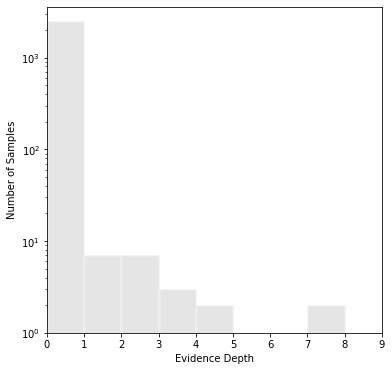

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 343


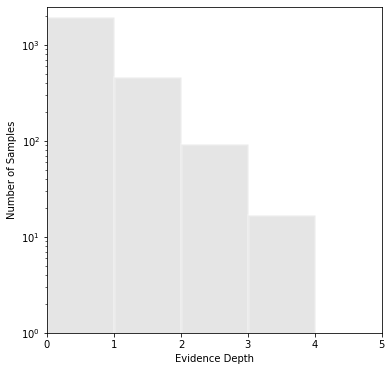

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 344


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


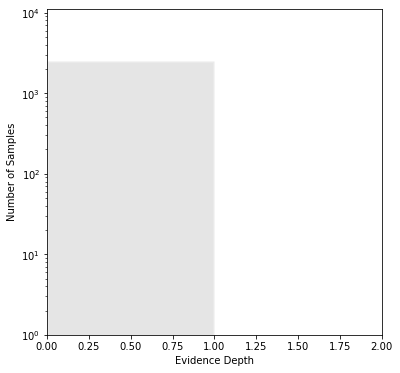

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 345


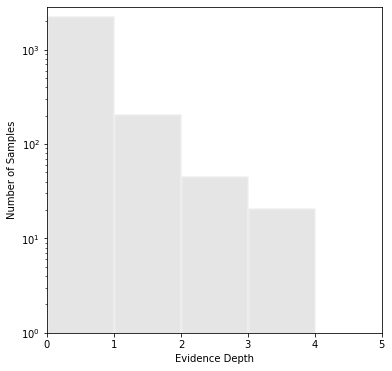

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 346


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


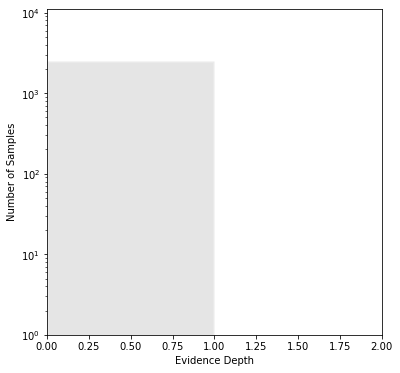

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 347


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


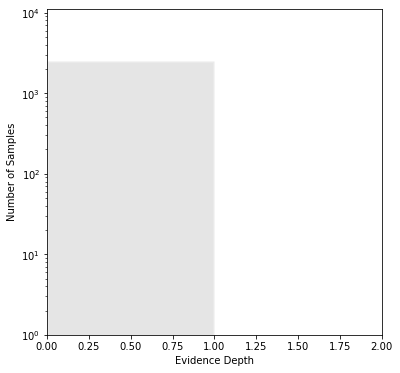

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 348


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


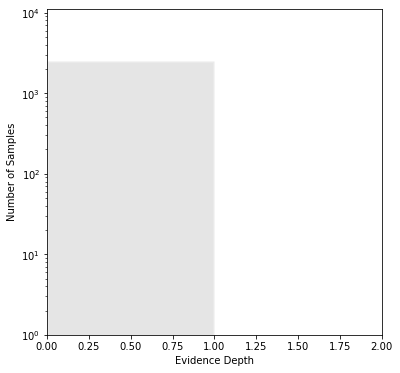

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 349


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


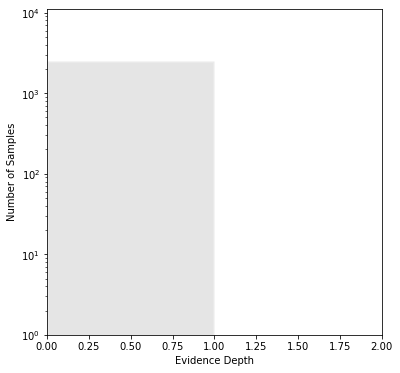

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 350


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


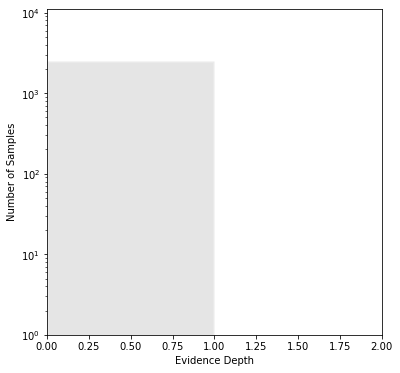

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 351


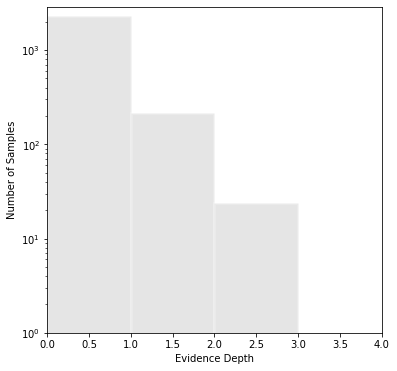

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 352


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


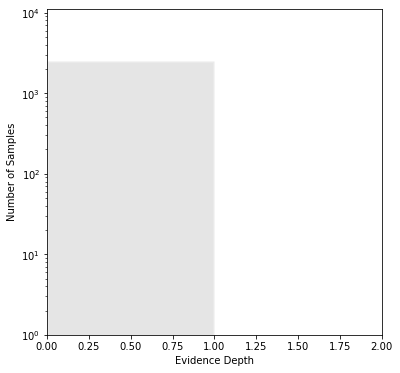

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 353


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


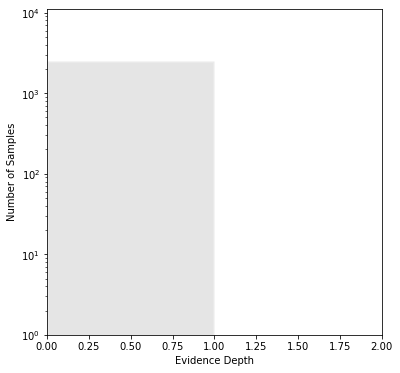

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 354


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


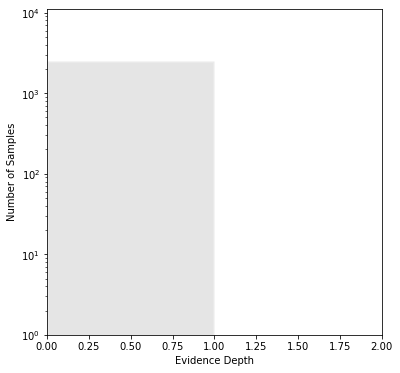

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 355


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


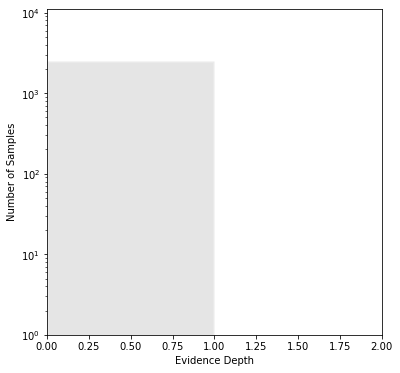

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 356


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


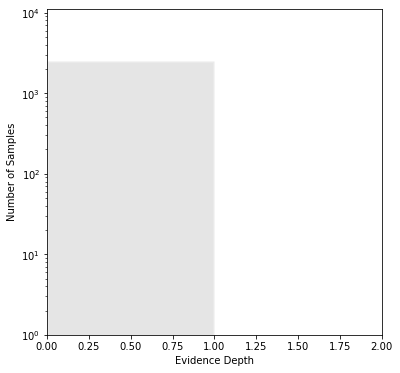

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 357


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


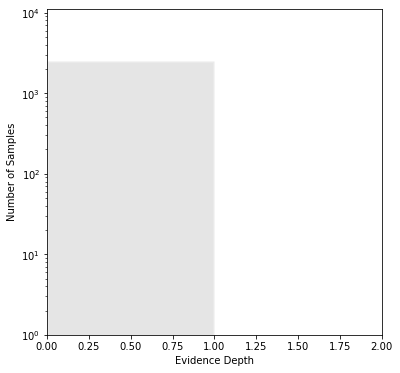

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 358


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


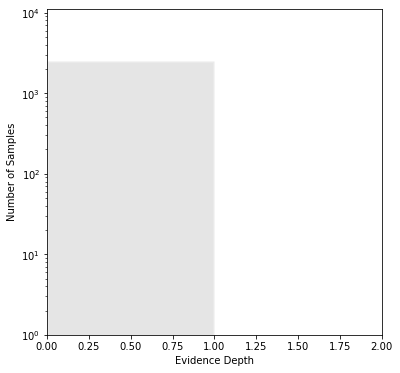

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 359


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


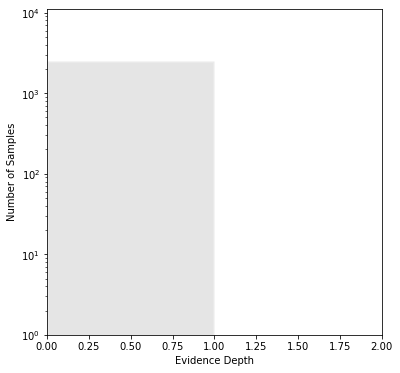

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 360


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


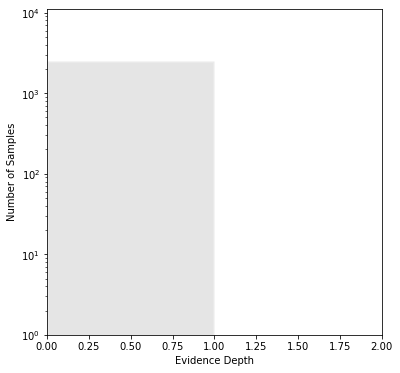

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 361


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


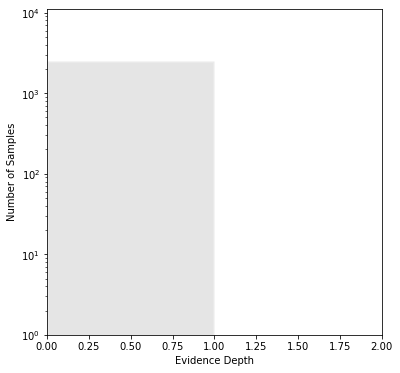

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 362


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


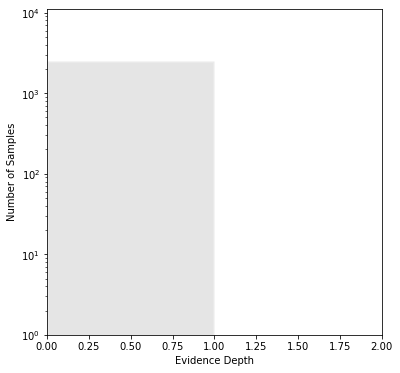

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 363


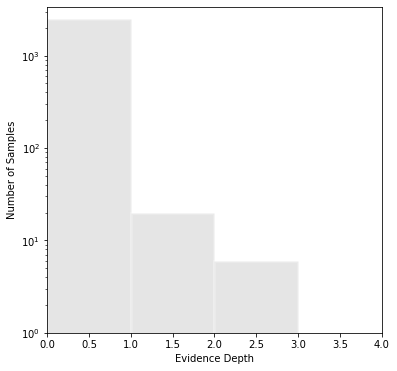

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 364


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


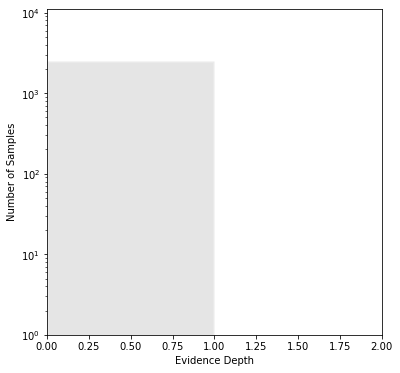

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 365


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


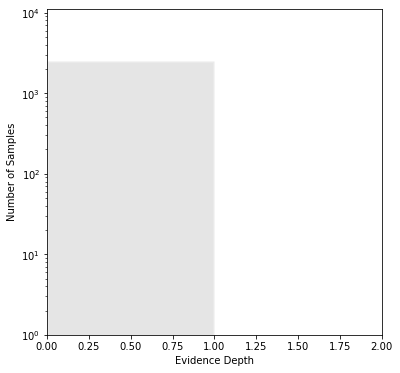

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 366


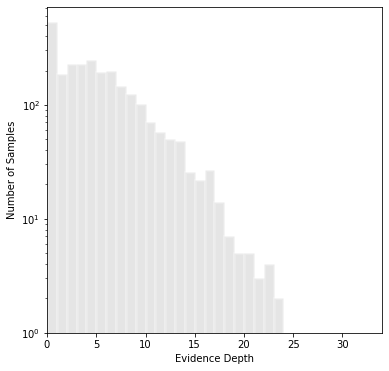

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 367


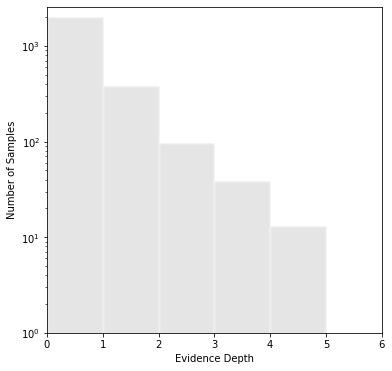

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 368


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


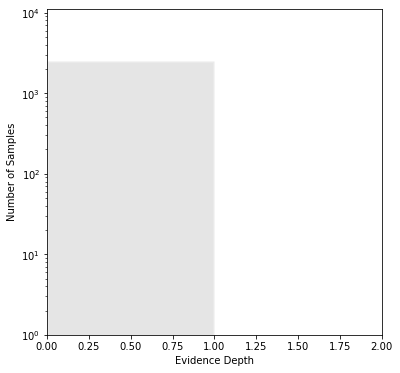

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 369


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


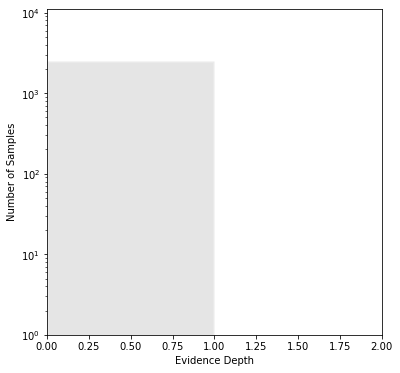

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 370


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


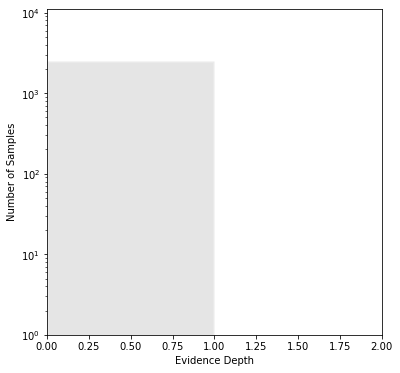

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 371


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


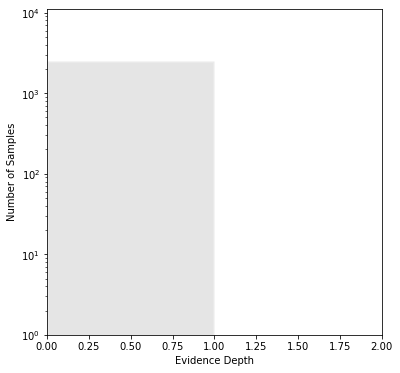

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 372


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


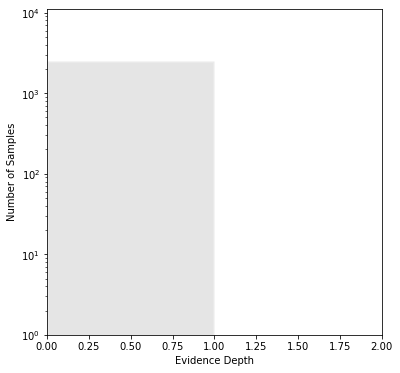

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 373


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


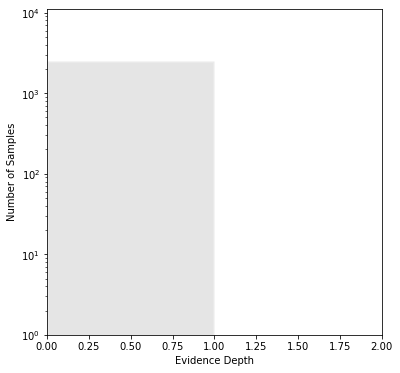

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 374


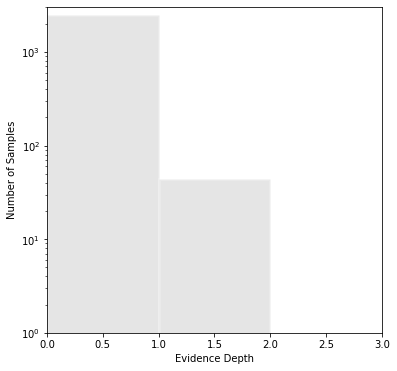

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 375


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


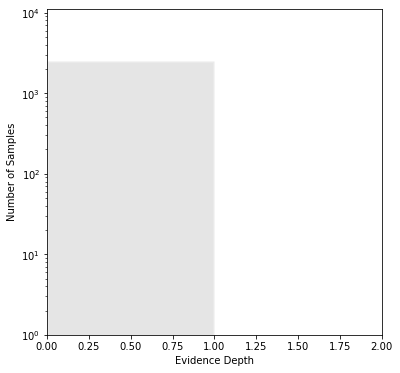

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 376


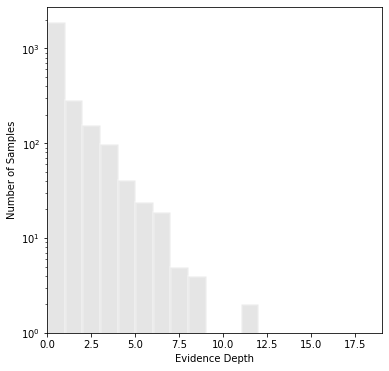

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 377


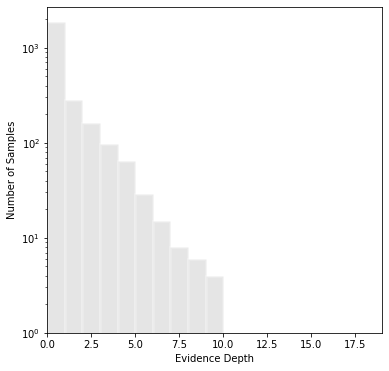

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 378


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


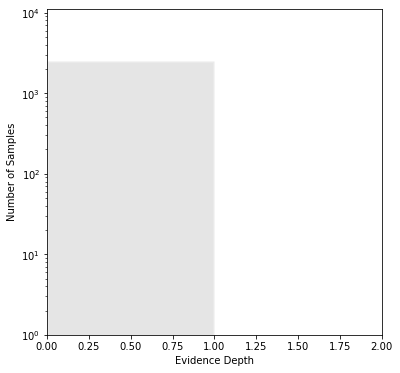

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 379


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


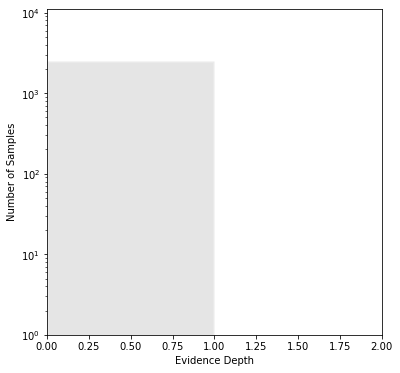

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 380


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


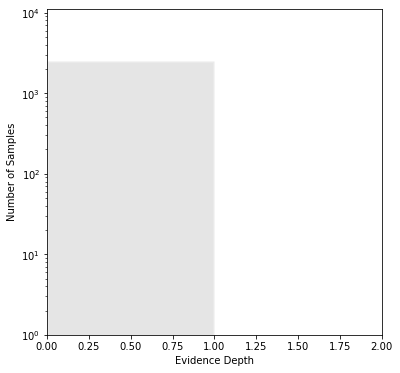

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 381


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


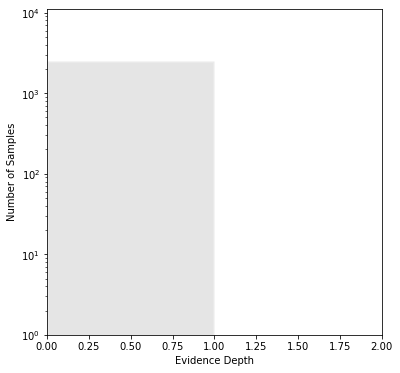

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 382


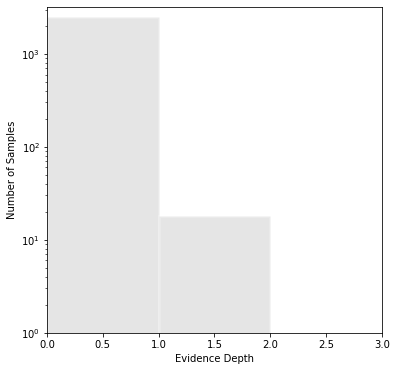

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 383


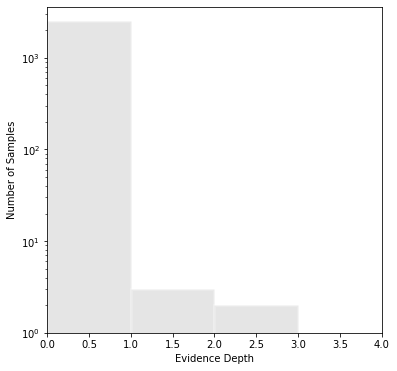

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 384


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


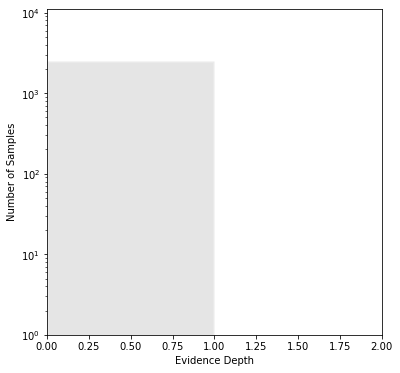

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 385


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


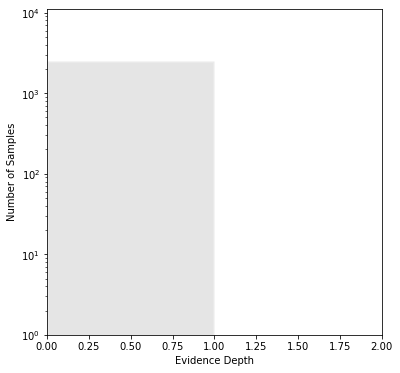

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 386


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


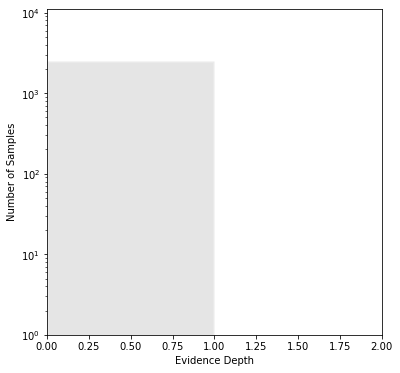

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 387


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


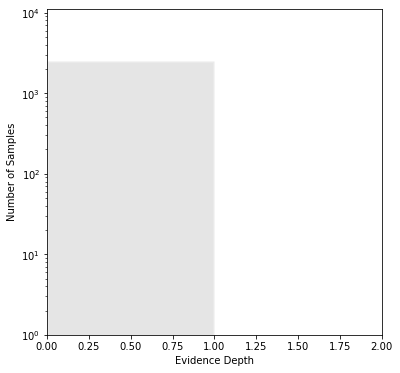

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 388


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


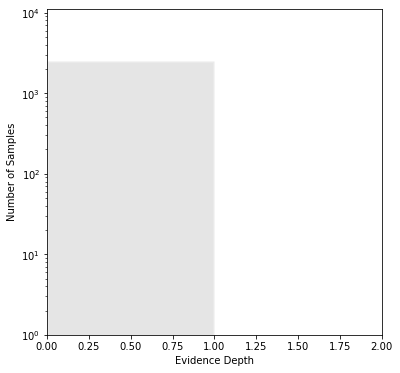

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 389


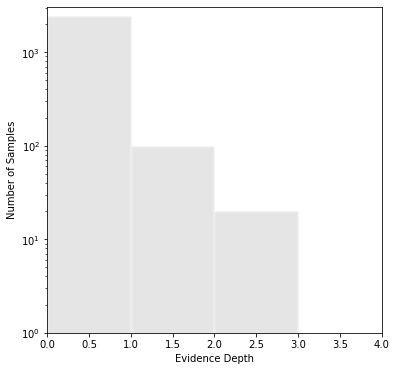

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 390


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


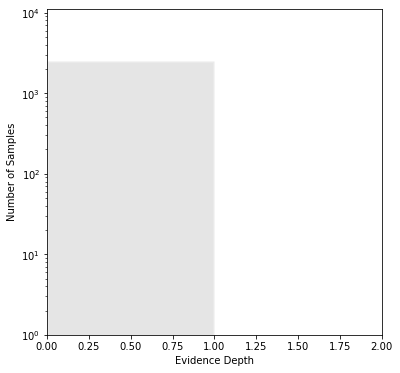

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 391


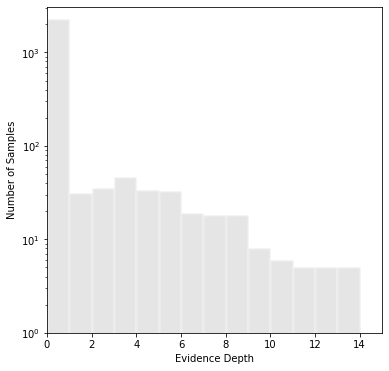

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 392


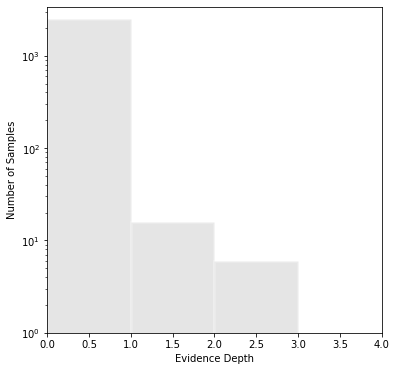

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 393


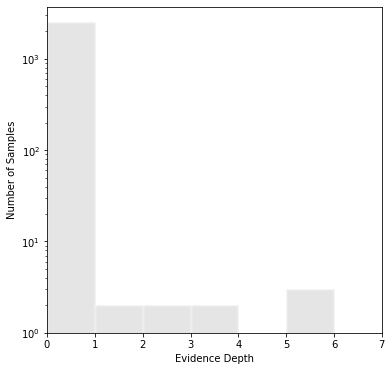

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 394


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


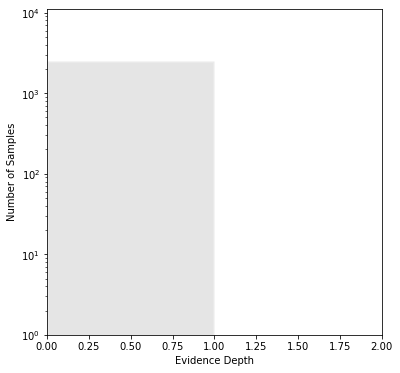

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 395


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


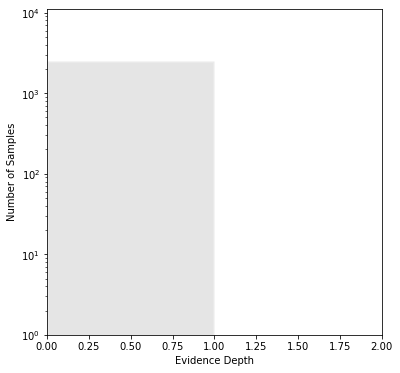

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 396


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


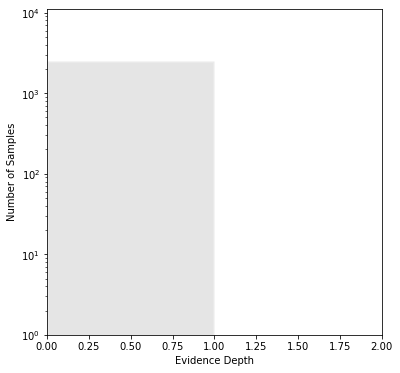

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 397


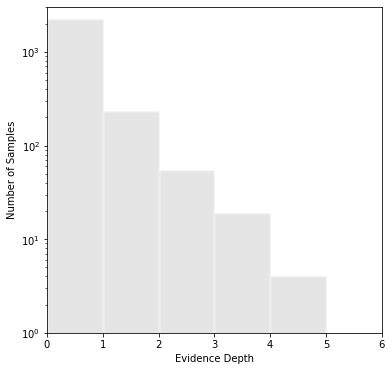

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 398


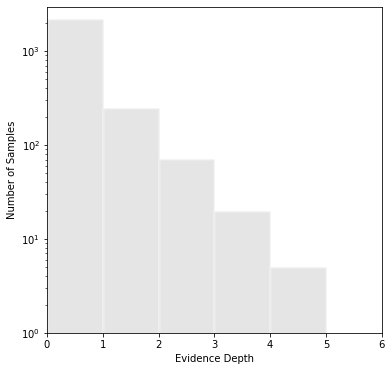

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 399


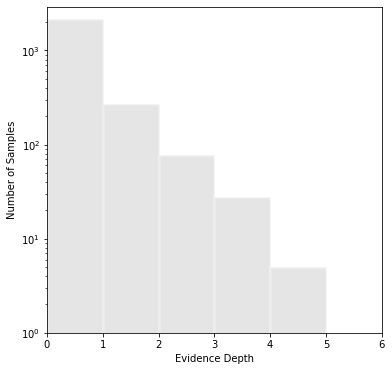

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 400


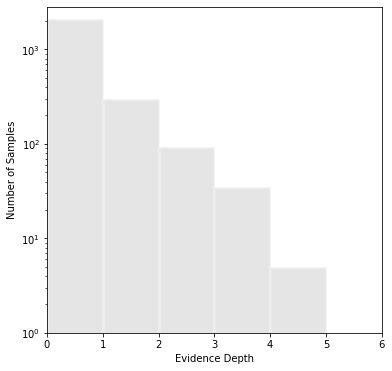

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 401


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


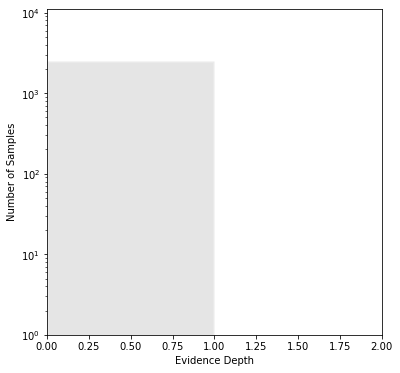

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 402


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


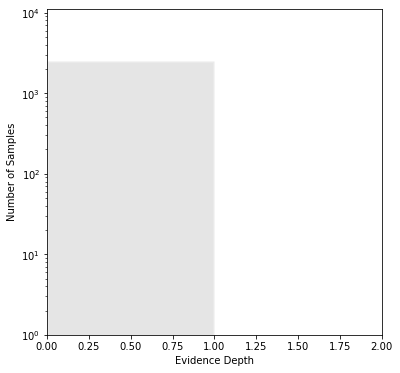

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 403


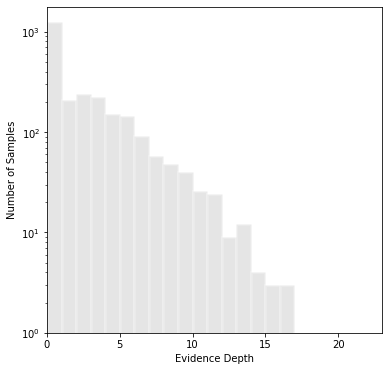

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 404


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


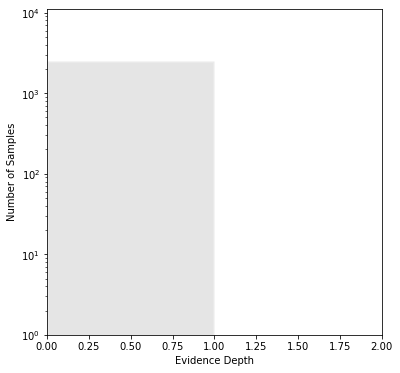

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 405


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


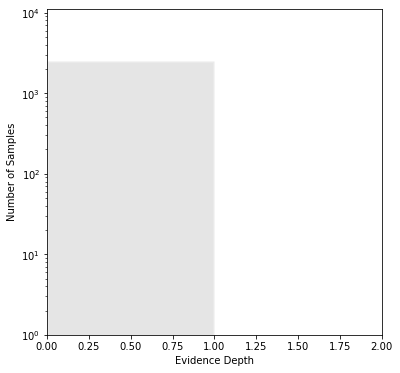

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 406


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


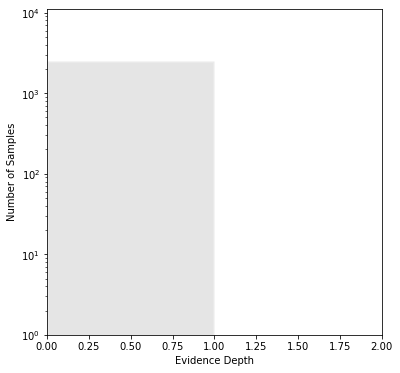

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 407


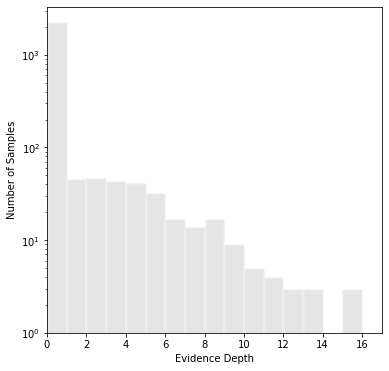

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 408


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


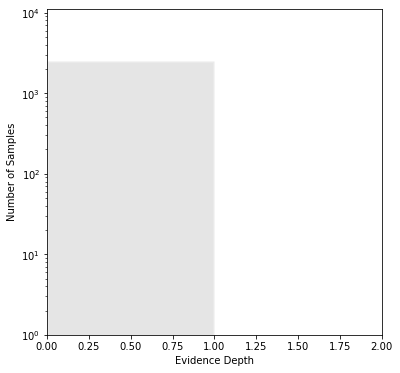

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 409


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


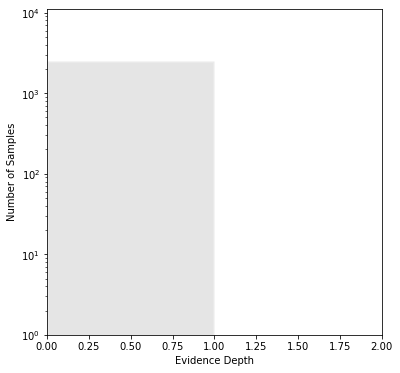

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 410


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


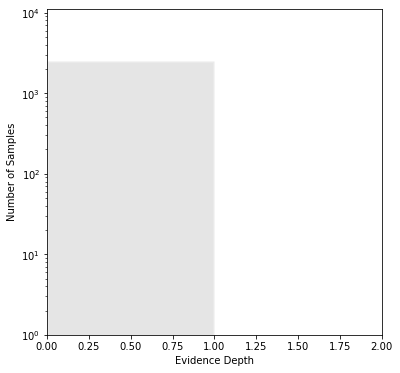

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 411


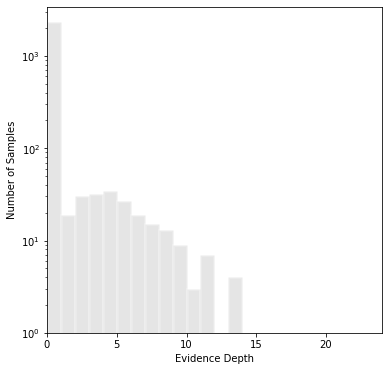

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 412


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


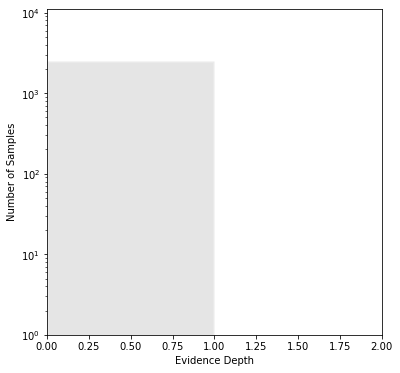

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 413


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


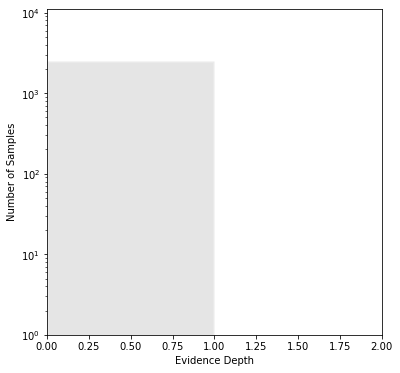

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 414


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


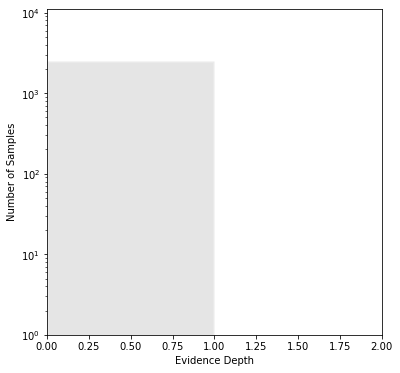

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 415


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


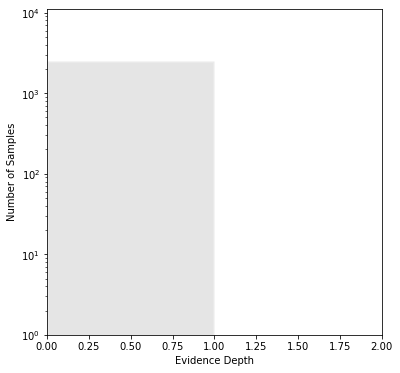

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 416


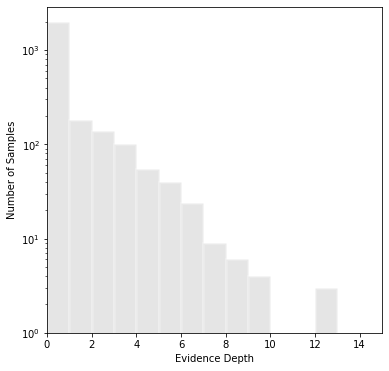

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 417


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


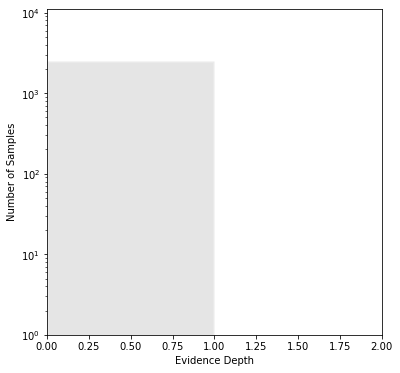

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 418


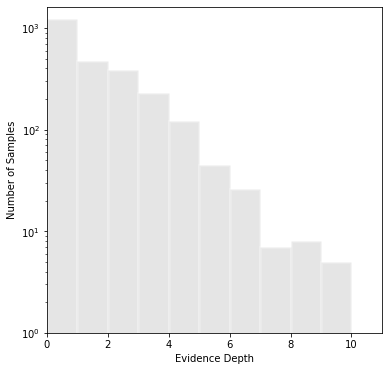

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 419


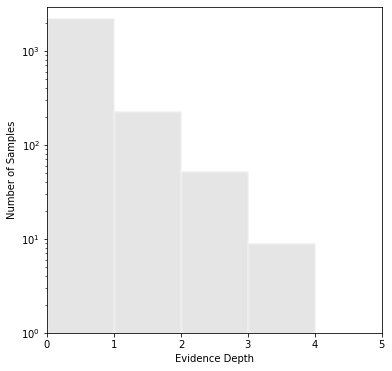

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 420


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


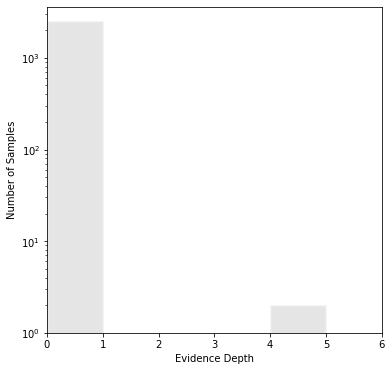

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 421


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


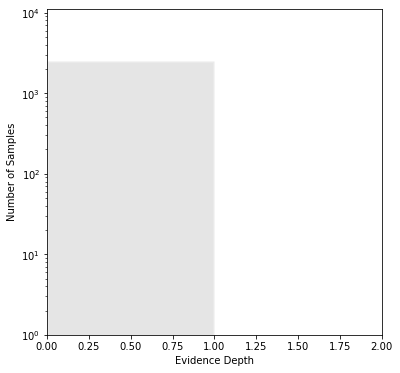

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 422


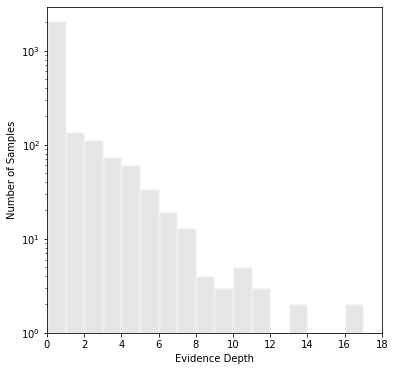

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 423


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


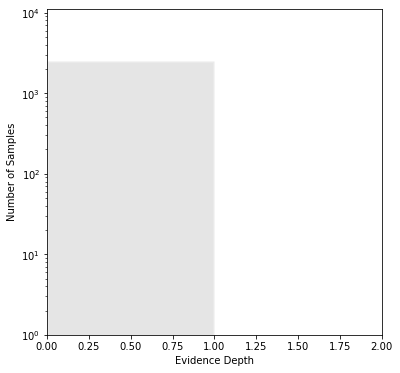

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 424


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


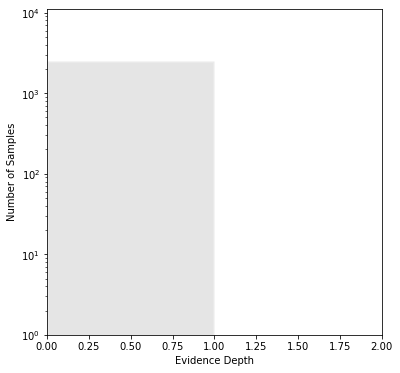

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 425


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


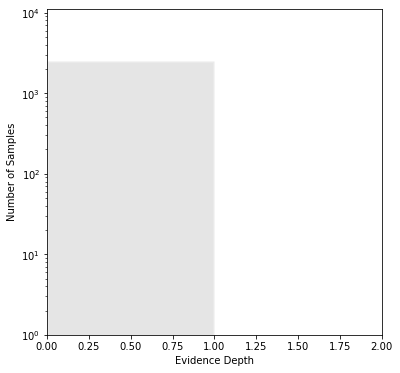

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 426


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


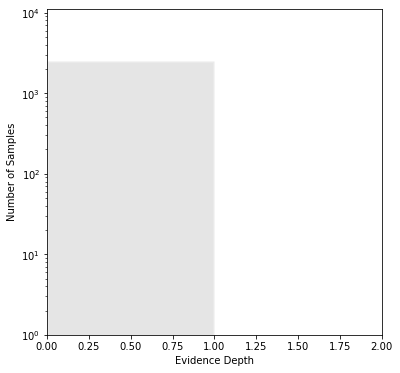

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 427


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


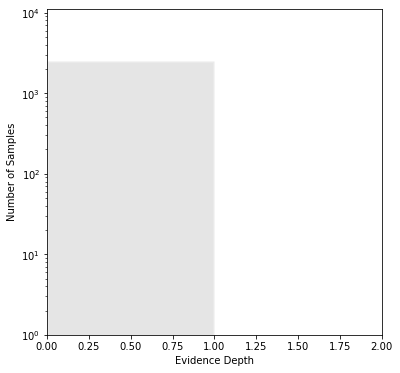

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 428


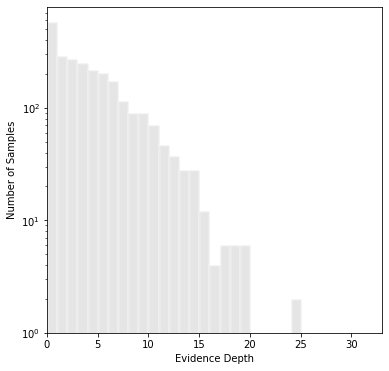

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 429


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


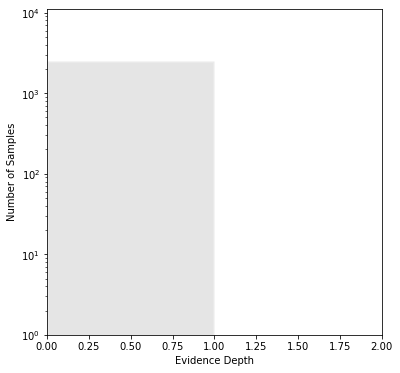

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 430


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


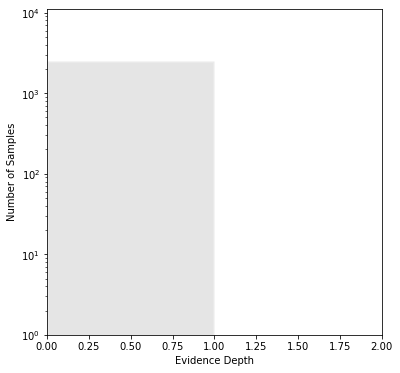

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 431


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


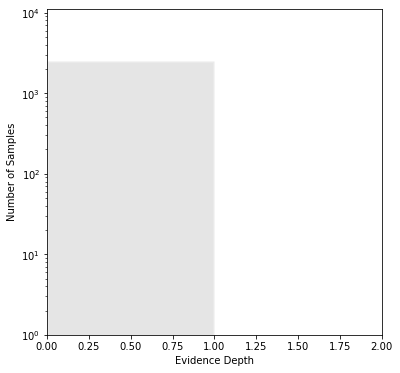

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 432


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


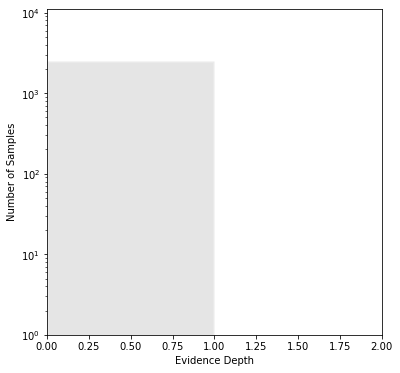

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 433


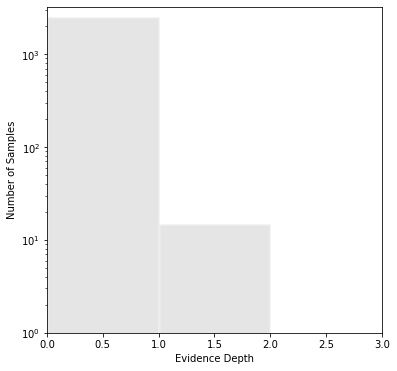

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 434


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


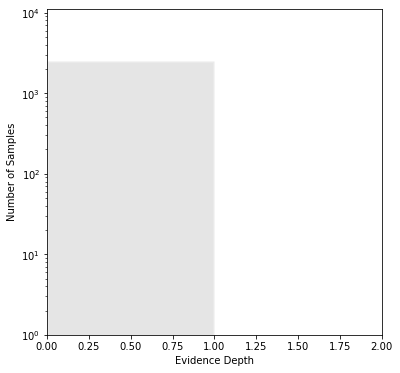

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 435


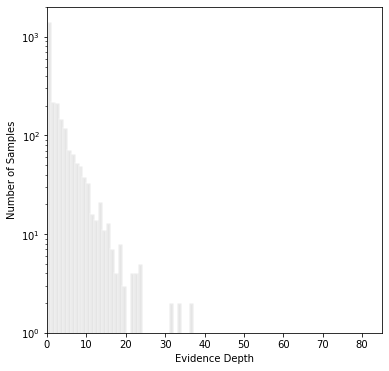

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 436


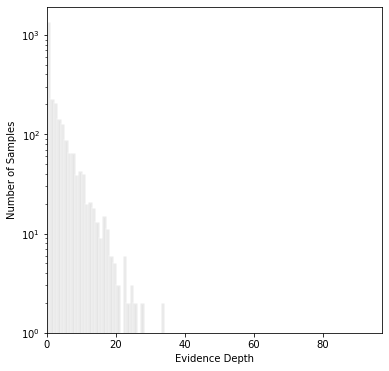

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 437


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


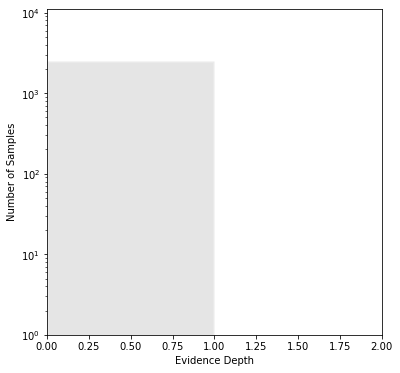

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 438


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


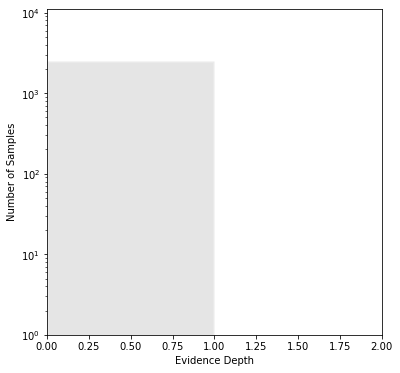

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 439


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


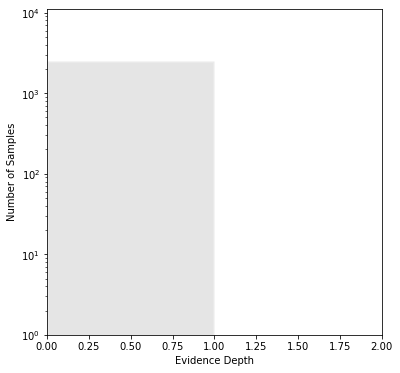

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 440


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


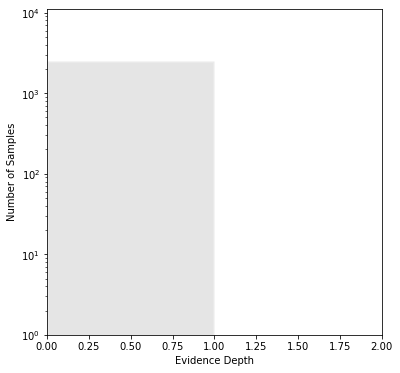

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 441


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


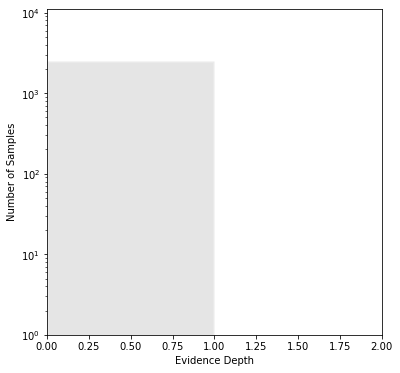

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 442


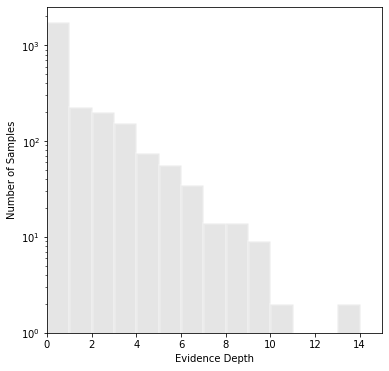

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 443


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


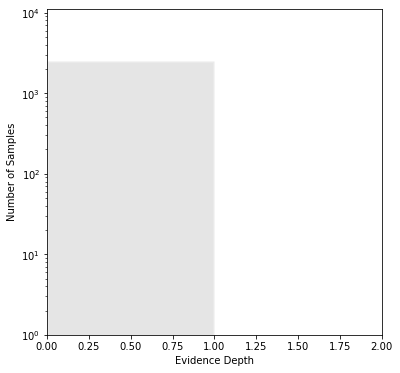

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 444


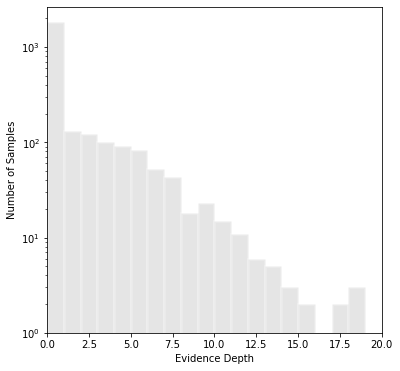

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 445


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


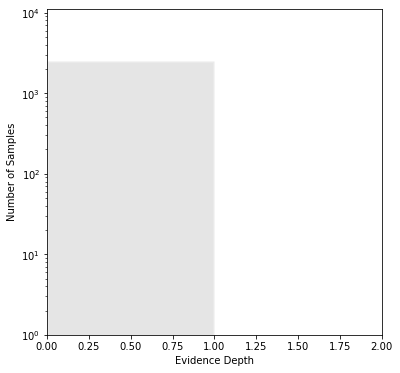

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 446


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


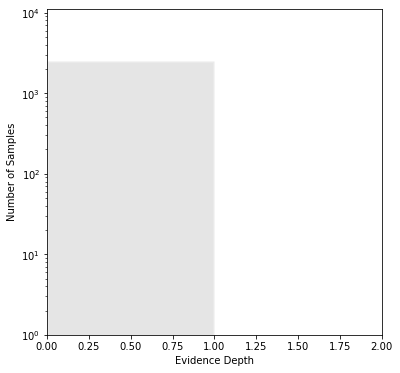

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 447


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


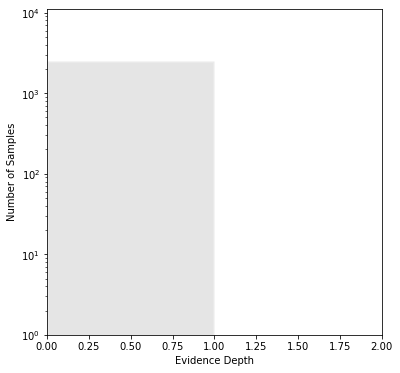

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 448


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


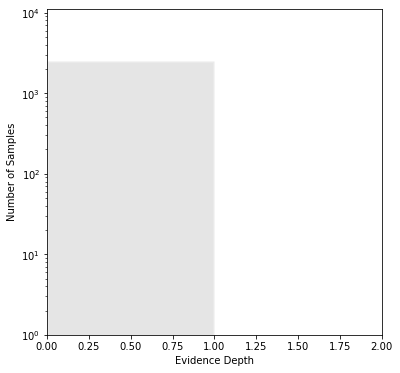

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 449


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


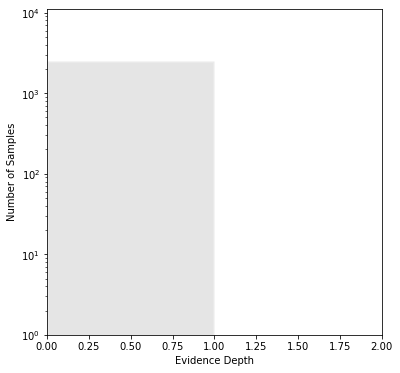

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 450


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


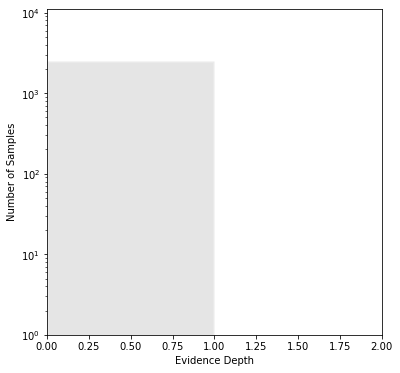

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 451


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


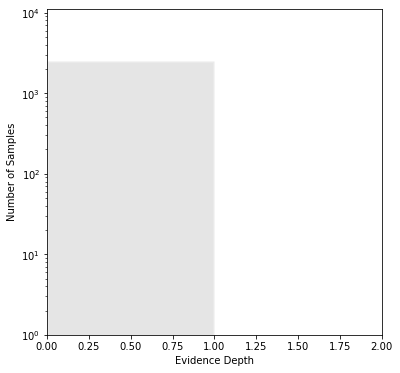

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 452


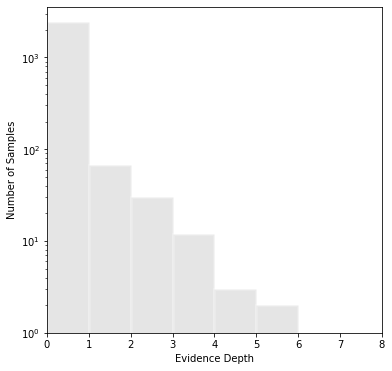

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 453


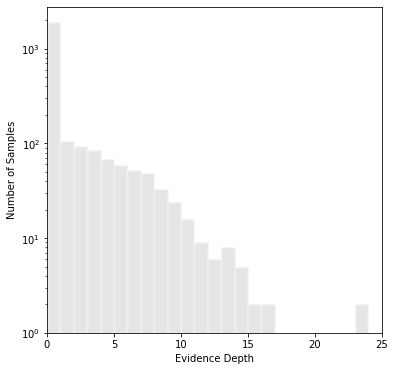

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 454


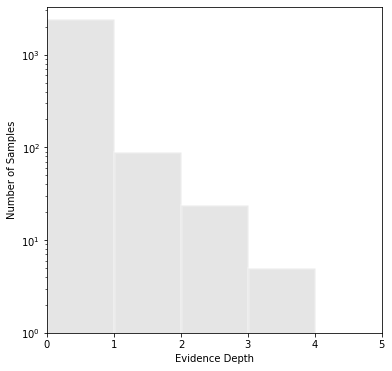

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 455


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


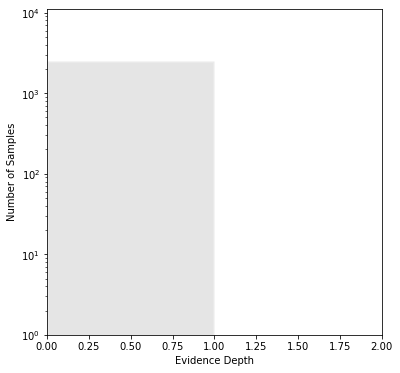

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 456


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


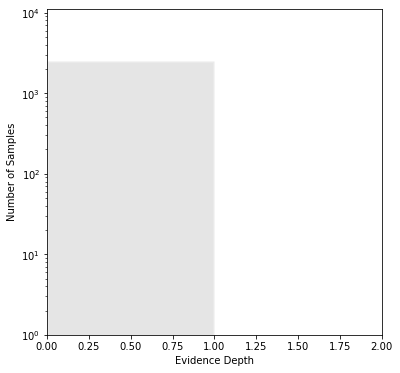

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 457


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


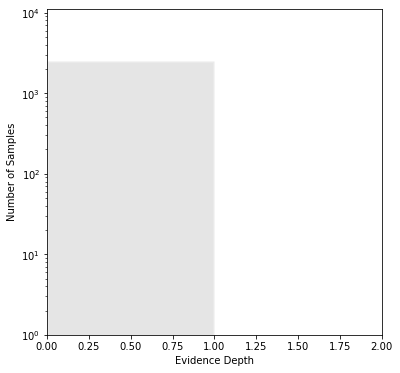

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 458


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


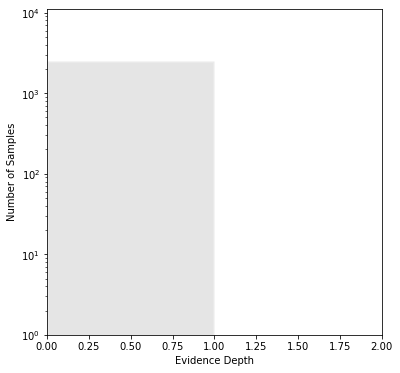

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 459


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


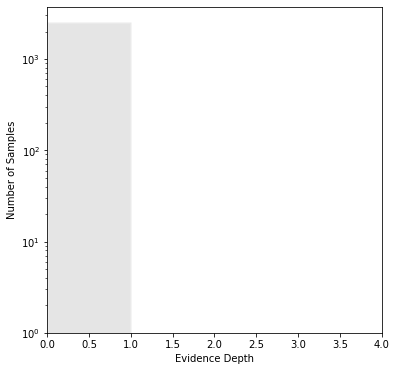

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 460


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


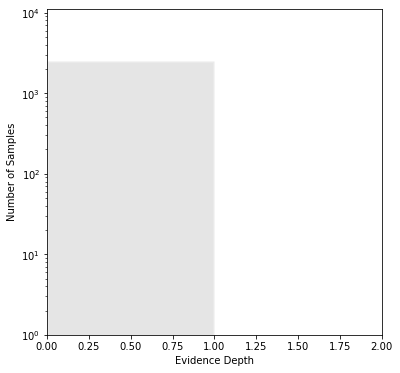

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 461


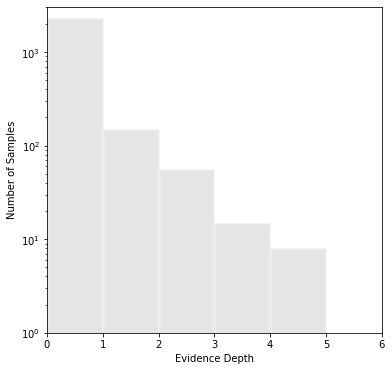

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 462


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


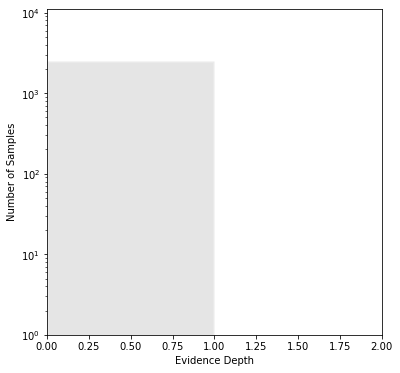

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 463


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


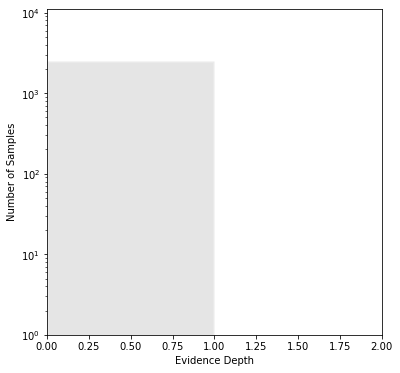

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 464


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


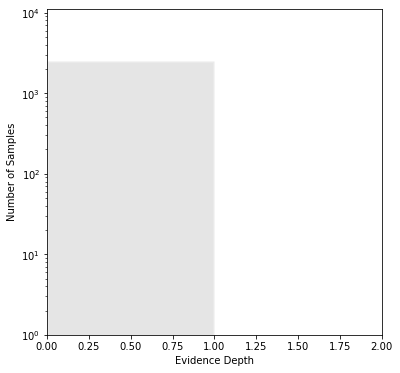

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 465


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


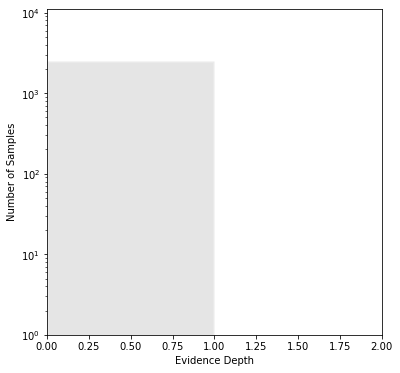

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 466


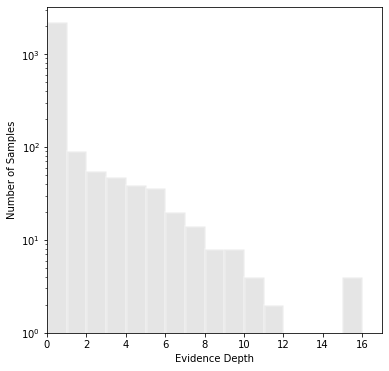

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 467


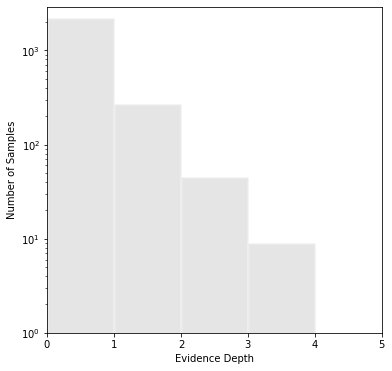

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 468


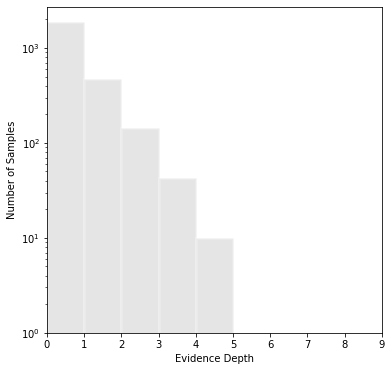

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 469


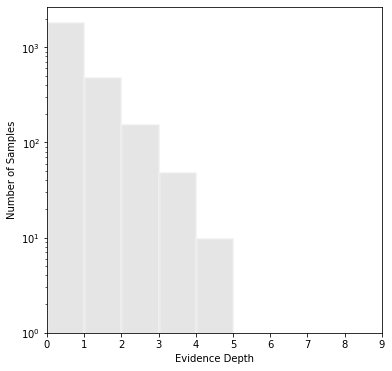

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 470


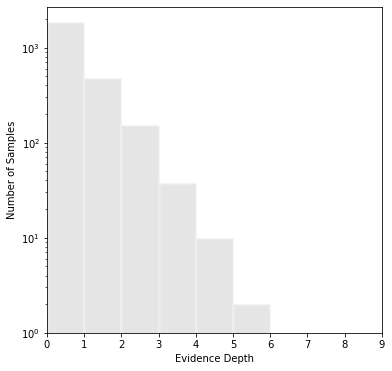

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 471


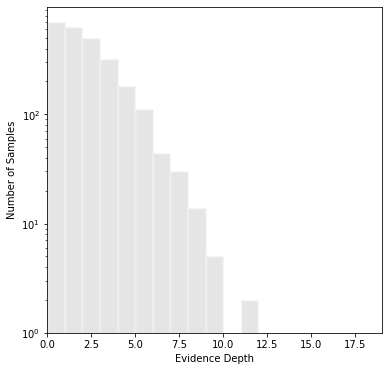

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 472


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


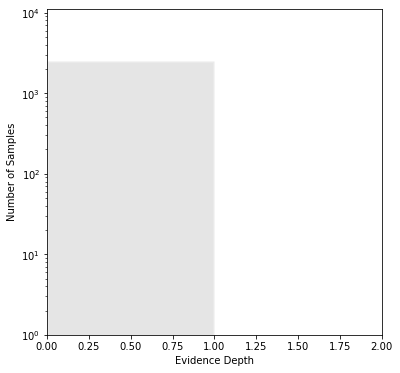

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 473


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


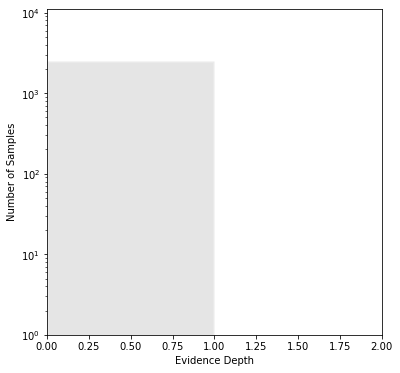

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 474


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


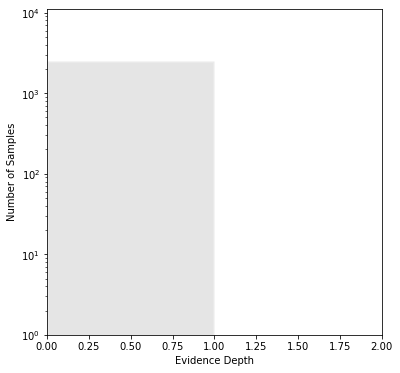

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 475


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


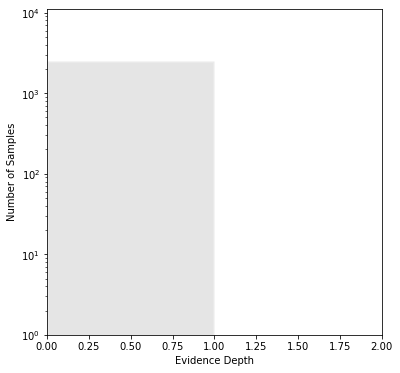

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 476


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


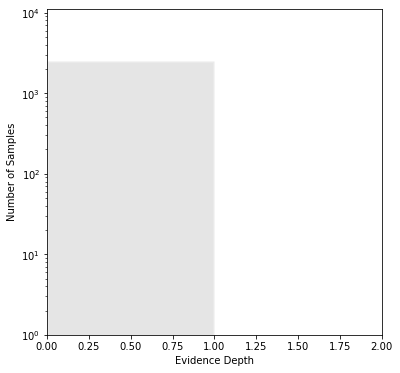

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 477


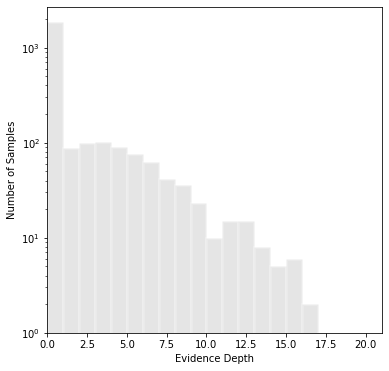

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 478


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


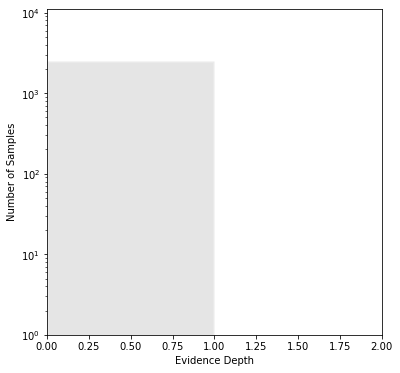

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 479


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


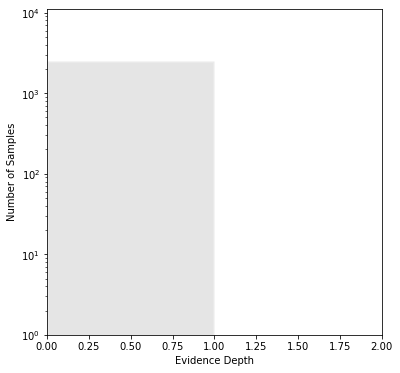

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 480


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


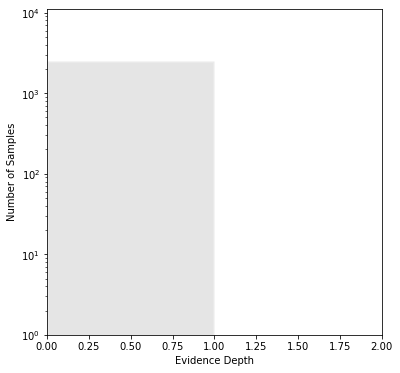

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 481


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


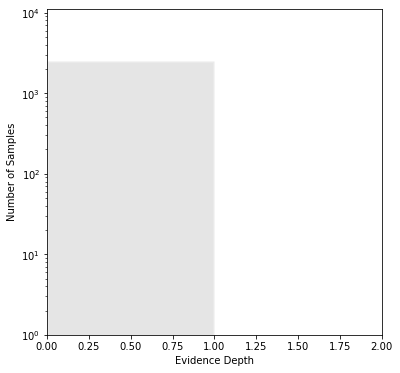

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 482


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


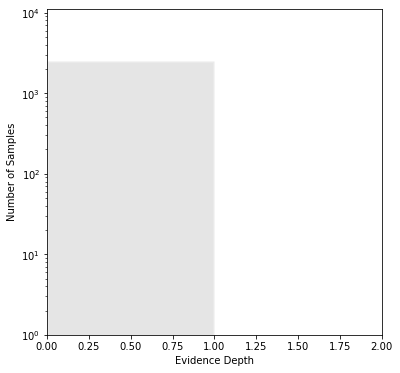

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 483


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


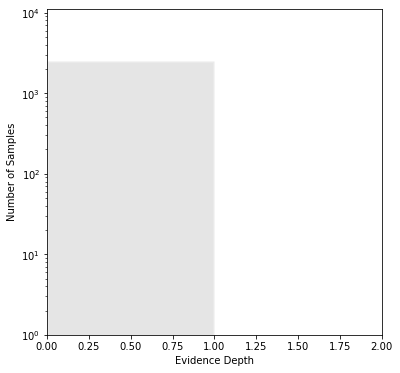

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 484


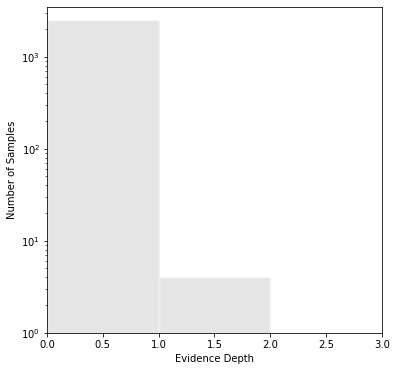

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]
index 485


/Users/behzod/Downloads/research/mod_nb/testing/optimized_full_SVMM.py:39: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(f)


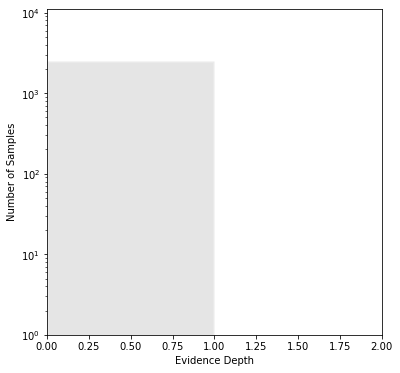

pi: [nan nan nan]
alpha: nan
lambda: nan
mu: [nan nan]
sigma: [nan, nan]


KeyboardInterrupt: 

In [21]:
import time
for index in diff_rows.index:
    print('index', index)
    sample_nonzero = depths_nonzero.iloc[index]
    pi, alpha, lambda_, mu, sigma = SVMM(sample_nonzero, True, False)

    print('pi:', pi)
    print('alpha:', alpha)
    print('lambda:', lambda_)
    print('mu:', mu)
    print('sigma:', sigma)
    time.sleep(1)
# run all the tests again after constructing the hw model and the non equilibrium model
# - synthetic data testing (properly get modes in edge cases)
# - mu_2_hat vs mu_2
# - likelihood comparison (AIC) (run on synthetic first) 